# Design CTP-14, mouse, long-5kb-multiplex-tracing library

by Pu Zheng

2022.12.12


# Table of contents


> 0. [Minimum required packages and settings](#0)
>>
>> 0.1: [import required packages](#0.1)
>
> 1. [Extract region sequences](#1)

<a id='0'></a>
# 0 Minimum required packages and settings

<a id='0.1'></a>
## 0.1 load required packages

In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
from ImageAnalysis3 import library_tools
print(os.getpid())

9948


<a id='1'></a>
# 1 Extract region sequences

In [2]:
## Some folders
# human genome
reference_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\mouse\GRCm38_ensembl'
genome_folder = os.path.join(reference_folder, 'Genome')
# Library directories
pool_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain'
if not os.path.exists(pool_folder):
    print(f"Create pool_folder: {pool_folder}")
    os.makedirs(pool_folder)
else:
    print(f"Use pool_folder: {pool_folder}")

Use pool_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain


In [3]:
# folder for sub-pool
library_folder = os.path.join(pool_folder, f'mouse_long_5kb')
if not os.path.exists(library_folder):
    print(f"create library folder: {library_folder}")
    os.makedirs(library_folder)
# folder for fasta sequences
sequence_folder = os.path.join(library_folder, 'sequences')
if not os.path.exists(sequence_folder):
    print(f"create sequence folder: {sequence_folder}")
    os.makedirs(sequence_folder)
# folder to save result probes
report_folder = os.path.join(library_folder, 'reports')
if not os.path.exists(report_folder):
    print(f"create report folder: {report_folder}")
    os.makedirs(report_folder)
    
print(f"-- library_folder: {library_folder}")
print(f"-- sequence_folder: {sequence_folder}")
print(f"-- report_folder: {report_folder}")

create library folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb
create sequence folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences
create report folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\reports
-- library_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb
-- sequence_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences
-- report_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\reports


<a id='1.1'></a>
## 1.1 select regions

In [113]:
from tqdm.notebook import tqdm

In [135]:
# prepare sequence reader
reload(ia.library_tools.sequences)
resolution = 5000
flanking = 0

seq_rd = ia.library_tools.sequences.sequence_reader(genome_folder, resolution=resolution, flanking=flanking)
seq_rd.load_ref_sequences() # load genomic sequences

-- load sequence: 1, size=195471971
-- load sequence: 2, size=182113224
-- load sequence: 3, size=160039680
-- load sequence: 4, size=156508116
-- load sequence: 5, size=151834684
-- load sequence: 6, size=149736546
-- load sequence: 7, size=145441459
-- load sequence: 8, size=129401213
-- load sequence: 9, size=124595110
-- load sequence: 10, size=130694993
-- load sequence: 11, size=122082543
-- load sequence: 12, size=120129022
-- load sequence: 13, size=120421639
-- load sequence: 14, size=124902244
-- load sequence: 15, size=104043685
-- load sequence: 16, size=98207768
-- load sequence: 17, size=94987271
-- load sequence: 18, size=90702639
-- load sequence: 19, size=61431566
-- load sequence: MT, size=16299
-- load sequence: X, size=171031299
-- load sequence: Y, size=91744698
-- load sequence: JH584299.1, size=953012
-- load sequence: GL456233.1, size=336933
-- load sequence: JH584301.1, size=259875
-- load sequence: GL456211.1, size=241735
-- load sequence: GL456350.1, size=227

<a id='1.2'></a>
## 1.2 manually input region information

In [136]:
region_dicts = [
    {
        'Chr': '7',
        'Start':'44000001',
        'End':'49000000',
        'Region':f"7:44000000-50000000",
        'Strand':'+',
        'Gene': f"Chr7-6Mb",
    }
]

In [137]:
seqs = seq_rd.find_sequence_for_region(region_dicts)

-- searching among 1 references
-- a match found in record: 7.


In [138]:
seq_rd.seq_dict

{'Chr7-6Mb': [SeqRecord(seq=Seq('GGTGGGGTTGAAACAAATGCAGACAAAAGGCTCAGACAAACTCAGGAATGCTCG...AGC'), id='7:43999999-44004999_strand_+_gene_Chr7-6Mb-seg-1', name='', description='', dbxrefs=[]),
  SeqRecord(seq=Seq('CCAAGCCCTGAATCATGGACTTGCCTAATCCCACACTACTGTCATTGGCTGTCT...GTA'), id='7:44004999-44009999_strand_+_gene_Chr7-6Mb-seg-2', name='', description='', dbxrefs=[]),
  SeqRecord(seq=Seq('CTCCAGCAGCTGGGGAGGAGTGTCTTTACAAATCCTGGATGAGCAGTTTAGAGA...ACT'), id='7:44009999-44014999_strand_+_gene_Chr7-6Mb-seg-3', name='', description='', dbxrefs=[]),
  SeqRecord(seq=Seq('GAAGGACAGTGGGGTGGGACTGGCTGAAAGTCTACCCATGGCCTCCTGGACTCT...CTC'), id='7:44014999-44019999_strand_+_gene_Chr7-6Mb-seg-4', name='', description='', dbxrefs=[]),
  SeqRecord(seq=Seq('CCCTGGAATAGTCTGAATTTTCATACTTTTGAATAAAAGAGTGATCAAGCCATG...TTG'), id='7:44019999-44024999_strand_+_gene_Chr7-6Mb-seg-5', name='', description='', dbxrefs=[]),
  SeqRecord(seq=Seq('GATTCTGGAGACAACACATCCCTCACTTGGGTGTGTTACTTAGGCCTATTTACC...GCC'), id='7:4402499

In [139]:
seq_rd.save_sequences(save_folder=sequence_folder)

-- saving sequences into folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-0.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-2.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-3.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-4.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-5.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Librarie

-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-144.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-145.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-146.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-147.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-148.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-149.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-150.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2

-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-292.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-293.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-294.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-295.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-296.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-297.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-298.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2

-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-439.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-440.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-441.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-442.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-443.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-444.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-445.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2

-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-588.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-589.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-590.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-591.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-592.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-593.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-594.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2

-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-736.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-737.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-738.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-739.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-740.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-741.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-742.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2

-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-804.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-805.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-806.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-807.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-808.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-809.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-810.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2

-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-875.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-876.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-877.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-878.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-879.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-880.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-881.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2

-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-944.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-945.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-946.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-947.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-948.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-949.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-950.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2

-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-1006.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-1007.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-1008.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-1009.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-1010.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-1011.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-1012.fasta
-- save to file: \\10.245.74.212\Chromati

-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-1076.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-1077.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-1078.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-1079.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-1080.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-1081.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-1082.fasta
-- save to file: \\10.245.74.212\Chromati

-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-1145.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-1146.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-1147.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-1148.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-1149.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-1150.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb-seg-1151.fasta
-- save to file: \\10.245.74.212\Chromati

<a id='2'></a>
# 2. Design probe targeting sequences by probe_designer

run probe_designer, remeber to clear the memory usage because each table should take ~32GB

<a id='2.1'></a>
## 2.1 Construct count table with all the 17-mers in the genome

Only do this if you don't have pre-built 17-mer

However you can do almost the same thing for your own library during quality check

This library requires mm10 genome

In [10]:
overwrite_table = False
from ImageAnalysis3 import library_tools

### construct map for whole genome

In [140]:
reload(library_tools.design)
 
genome_table_file = os.path.join(reference_folder, 'GRCm38_genome_17w.npy')

if not os.path.exists(genome_table_file) or overwrite_table:
    # genome
    _genome_filenames = [os.path.join(genome_folder, _fl) 
         for _fl in os.listdir(genome_folder) 
         if _fl.split(os.extsep)[-1]=='fasta' or _fl.split(os.extsep)[-1]=='fa']
    print(len(_genome_filenames))

    ct = library_tools.design.countTable(word=17,save_file=genome_table_file, 
                       sparse=False)
    ct.verbose=True

    ct.read(_genome_filenames) # read sequences from fasta files

    ct.consume_loaded(num_threads=24) # convert sequences into integers

    ct.complete(verbose=True)

    ct.save()

    # clear RAM if contructed countable 
    del(ct)
else:
    print(f"reference table: {genome_table_file} already exist, skip.")

reference table: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\mouse\GRCm38_ensembl\GRCm38_genome_17w.npy already exist, skip.


### construct map for transcriptome

In [141]:
from tqdm import tqdm
# transcriptome
transcriptome_folder = os.path.join(reference_folder, 'Transcriptome')

transcriptome_table_file = os.path.join(reference_folder, 'GRCm38_transcriptome_17w.npy')

if not os.path.exists(transcriptome_table_file) or overwrite_table:
    # transcriptome
    _transcriptome_filenames = [os.path.join(transcriptome_folder, _fl) 
         for _fl in os.listdir(transcriptome_folder) 
         if _fl.split(os.extsep)[-1]=='fasta' or _fl.split(os.extsep)[-1]=='fa']
    print(len(_transcriptome_filenames))
    
    ct = library_tools.design.countTable(word=17,save_file=transcriptome_table_file, 
                       sparse=False)
    ct.verbose=True

    ct.read(_transcriptome_filenames) # read sequences from fasta files

    ct.consume_loaded(num_threads=24) # convert sequences into integers

    ct.complete(verbose=True)

    ct.save()
    
    # clear RAM if contructed countable 
    del(ct)
else:
    print(f"reference table: {transcriptome_table_file} already exist, skip.")

reference table: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\mouse\GRCm38_ensembl\GRCm38_transcriptome_17w.npy already exist, skip.


### construct map for repeats from RepBase

In [142]:
from tqdm import tqdm
# repeat
repeat_folder = r'\\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\Repbase'

repeat_table_file = os.path.join(reference_folder, 'Repbase_v2603_repeat_17w.npy')

if not os.path.exists(repeat_table_file) or overwrite_table:
    # repeat
    _repeat_filenames = [os.path.join(repeat_folder, _fl) 
         for _fl in os.listdir(repeat_folder) 
         if _fl.split(os.extsep)[-1]=='fasta' or _fl.split(os.extsep)[-1]=='fa']
    print(len(_repeat_filenames))
    
    ct = library_tools.design.countTable(word=17,save_file=repeat_table_file, 
                       sparse=False)
    ct.verbose=True

    ct.read(_repeat_filenames) # read sequences from fasta files

    ct.consume_loaded(num_threads=24) # convert sequences into integers

    ct.complete(verbose=True)

    ct.save()
    
    # clear RAM if contructed countable 
    del(ct)
else:
    print(f"reference table: {repeat_table_file} already exist, skip.")

reference table: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\mouse\GRCm38_ensembl\Repbase_v2603_repeat_17w.npy already exist, skip.


<a id='2.2'></a>
## 2.2 Design probes

In [144]:
# requires pre_defined genome_folder and library_folder
# Indices
genome_index = os.path.join(reference_folder, 'GRCm38_genome_17w.npy')
#transcriptome_index = os.path.join(reference_folder, 'GRCm38_transcriptome_17w.npy') 
repeat_index = os.path.join(reference_folder, 'Repbase_v2603_repeat_17w.npy')
#ref_merfish_index = os.path.join(reference_folder, 'M1_meng_MERFISH_17w.npy') # merfish designed by Meng
# get input files 
input_files = [os.path.join(sequence_folder, _fl) for _fl in os.listdir(sequence_folder) if '.fasta' in _fl]

print(f"{len(input_files)} regions loaded to design probes.")

if not os.path.exists(report_folder):
    os.makedirs(report_folder)
    
# filename to save probe reports
probe_savefile = os.path.join(report_folder, f'mouse_5Mb_5kb.pbr')
print(probe_savefile)

1200 regions loaded to design probes.
\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\reports\mouse_5Mb_5kb.pbr


### create pb_designer class

In [15]:
reload(library_tools)
reload(library_tools.design)

pb_designer = library_tools.design.pb_reports_class(
    sequence_dic={'file':input_files,
                  'rev_com':True, # design two strands
                  'two_stranded':True},
    map_dic={'genome':{'file':genome_index,'rev_com':False,'two_stranded':True},
             #'transcriptome':{'file':transcriptome_index,'rev_com':True,'two_stranded':False},
             'rep_genome':{'file':repeat_index,'rev_com':False,'two_stranded':True},
             'self_sequences':{'file':input_files,'force_list':True,'rev_com':False,'two_stranded':True},
             #'ref_merfish':{'file':ref_merfish_index,'rev_com':False,'two_stranded':True},
             },
        save_file=probe_savefile,
    params_dic={'word_size':17,'pb_len':42,'buffer_len':0,'max_count':2**16-1,
                'check_on_go': False, # whether automatically check probes
                'auto': False, # whether automatically convert reference maps
               },
    check_dic={('genome','self_sequences'): 50, # 25
               'rep_genome': 0,
               #'transcriptome': 25, # 14
               #'ref_merfish': 14,
               'gc':[0.25,0.85],'tm': 37+0.62*50+5,
               }
    )
print(pb_designer)
pb_designer.load_from_file(load_probes_only=True)


Probe designer derived from Bogdan Bintu:
https://github.com/BogdanBintu/ChromatinImaging/blob/master/LibraryDesign/LibraryDesigner.py
by Pu Zheng, 2020.11

Major changes:
    1. allow design of two strands
    2. separate reverse_complement (rev_com) and from two strands (two_stranded) as 
    two different inputs for map_dic and sequence_dic
    3. replace 'local_genome' with 'self_sequences' to be more explicit, and only 
    exclude the counts for the corresponding self_sequence within each input. 

Key information:
    - number of input_sequence(s): 1200
    - save_file location: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\reports\mouse_5Mb_5kb.pbr

- Fail to load from savefile: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\reports\mouse_5Mb_5kb.pbr, file doesn't exist.


False

### calculate probe reports

In [16]:
%%time
pb_designer.computeOTmaps() # load the tables 
pb_designer.compute_pb_report() # design candidate probes

-- setting attribute: map_genome
--- finish map_genome in 61.312s.
-- setting attribute: map_rep_genome
--- finish map_rep_genome in 62.570s.
Time(s): 123.88362693786621
- Designing targeting sequence for 1200 regions
-- designing region: 7:43999999-44004999_strand_+_gene_Chr7-6Mb_reg_1 -- region: 0, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_0.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.189s.
- Designed 9918 candidate probes in 2.392s.
-- designing region: 7:44004999-44009999_strand_+_gene_Chr7-6Mb_reg_2 -- region: 1, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.185s.
- Designed 9918 candidate probes in 2.715s.
-- designing region: 7:44009999-44014999_strand_+_gene

- Designed 9918 candidate probes in 2.860s.
-- designing region: 7:44109999-44114999_strand_+_gene_Chr7-6Mb_reg_23 -- region: 22, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_22.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.189s.
- Designed 9918 candidate probes in 2.749s.
-- designing region: 7:44114999-44119999_strand_+_gene_Chr7-6Mb_reg_24 -- region: 23, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_23.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.188s.
- Designed 9918 candidate probes in 2.763s.
-- designing region: 7:44119999-44124999_strand_+_gene_Chr7-6Mb_reg_25 -- region: 24, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_24.fasta
-- set

- Designed 9918 candidate probes in 2.588s.
-- designing region: 7:44224999-44229999_strand_+_gene_Chr7-6Mb_reg_46 -- region: 45, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_45.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.187s.
- Designed 9918 candidate probes in 2.764s.
-- designing region: 7:44229999-44234999_strand_+_gene_Chr7-6Mb_reg_47 -- region: 46, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_46.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.186s.
- Designed 9918 candidate probes in 3.025s.
-- designing region: 7:44234999-44239999_strand_+_gene_Chr7-6Mb_reg_48 -- region: 47, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_47.fasta
-- set

- Designed 9918 candidate probes in 2.766s.
-- designing region: 7:44339999-44344999_strand_+_gene_Chr7-6Mb_reg_69 -- region: 68, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_68.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.183s.
- Designed 9918 candidate probes in 2.759s.
-- designing region: 7:44344999-44349999_strand_+_gene_Chr7-6Mb_reg_70 -- region: 69, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_69.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.187s.
- Designed 9918 candidate probes in 2.600s.
-- designing region: 7:44349999-44354999_strand_+_gene_Chr7-6Mb_reg_71 -- region: 70, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_70.fasta
-- set

- Designed 9918 candidate probes in 2.749s.
-- designing region: 7:44454999-44459999_strand_+_gene_Chr7-6Mb_reg_92 -- region: 91, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_91.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.188s.
- Designed 9918 candidate probes in 2.759s.
-- designing region: 7:44459999-44464999_strand_+_gene_Chr7-6Mb_reg_93 -- region: 92, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_92.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.181s.
- Designed 9918 candidate probes in 2.597s.
-- designing region: 7:44464999-44469999_strand_+_gene_Chr7-6Mb_reg_94 -- region: 93, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_93.fasta
-- set

- Designed 9918 candidate probes in 2.772s.
-- designing region: 7:44569999-44574999_strand_+_gene_Chr7-6Mb_reg_115 -- region: 114, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_114.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.182s.
- Designed 9918 candidate probes in 2.758s.
-- designing region: 7:44574999-44579999_strand_+_gene_Chr7-6Mb_reg_116 -- region: 115, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_115.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.177s.
- Designed 9918 candidate probes in 2.746s.
-- designing region: 7:44579999-44584999_strand_+_gene_Chr7-6Mb_reg_117 -- region: 116, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_116.fas

- Designed 9918 candidate probes in 2.764s.
-- designing region: 7:44684999-44689999_strand_+_gene_Chr7-6Mb_reg_138 -- region: 137, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_137.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.192s.
- Designed 9918 candidate probes in 2.614s.
-- designing region: 7:44689999-44694999_strand_+_gene_Chr7-6Mb_reg_139 -- region: 138, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_138.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.186s.
- Designed 9918 candidate probes in 2.722s.
-- designing region: 7:44694999-44699999_strand_+_gene_Chr7-6Mb_reg_140 -- region: 139, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_139.fas

- Designed 9918 candidate probes in 2.770s.
-- designing region: 7:44799999-44804999_strand_+_gene_Chr7-6Mb_reg_161 -- region: 160, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_160.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.189s.
- Designed 9918 candidate probes in 2.777s.
-- designing region: 7:44804999-44809999_strand_+_gene_Chr7-6Mb_reg_162 -- region: 161, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_161.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.189s.
- Designed 9918 candidate probes in 2.786s.
-- designing region: 7:44809999-44814999_strand_+_gene_Chr7-6Mb_reg_163 -- region: 162, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_162.fas

- Designed 9918 candidate probes in 2.787s.
-- designing region: 7:44914999-44919999_strand_+_gene_Chr7-6Mb_reg_184 -- region: 183, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_183.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.187s.
- Designed 9918 candidate probes in 2.782s.
-- designing region: 7:44919999-44924999_strand_+_gene_Chr7-6Mb_reg_185 -- region: 184, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_184.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.104s.
- Designed 9918 candidate probes in 2.690s.
-- designing region: 7:44924999-44929999_strand_+_gene_Chr7-6Mb_reg_186 -- region: 185, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_185.fas

- Designed 9918 candidate probes in 2.725s.
-- designing region: 7:45029999-45034999_strand_+_gene_Chr7-6Mb_reg_207 -- region: 206, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_206.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.179s.
- Designed 9918 candidate probes in 2.778s.
-- designing region: 7:45034999-45039999_strand_+_gene_Chr7-6Mb_reg_208 -- region: 207, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_207.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.189s.
- Designed 9918 candidate probes in 2.784s.
-- designing region: 7:45039999-45044999_strand_+_gene_Chr7-6Mb_reg_209 -- region: 208, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_208.fas

- Designed 9918 candidate probes in 2.732s.
-- designing region: 7:45144999-45149999_strand_+_gene_Chr7-6Mb_reg_230 -- region: 229, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_229.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.185s.
- Designed 9918 candidate probes in 3.782s.
-- designing region: 7:45149999-45154999_strand_+_gene_Chr7-6Mb_reg_231 -- region: 230, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_230.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.187s.
- Designed 9918 candidate probes in 2.783s.
-- designing region: 7:45154999-45159999_strand_+_gene_Chr7-6Mb_reg_232 -- region: 231, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_231.fas

- Designed 9918 candidate probes in 2.769s.
-- designing region: 7:45259999-45264999_strand_+_gene_Chr7-6Mb_reg_253 -- region: 252, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_252.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.150s.
- Designed 9918 candidate probes in 2.745s.
-- designing region: 7:45264999-45269999_strand_+_gene_Chr7-6Mb_reg_254 -- region: 253, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_253.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.183s.
- Designed 9918 candidate probes in 2.689s.
-- designing region: 7:45269999-45274999_strand_+_gene_Chr7-6Mb_reg_255 -- region: 254, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_254.fas

- Designed 9918 candidate probes in 2.779s.
-- designing region: 7:45374999-45379999_strand_+_gene_Chr7-6Mb_reg_276 -- region: 275, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_275.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.188s.
- Designed 9918 candidate probes in 2.777s.
-- designing region: 7:45379999-45384999_strand_+_gene_Chr7-6Mb_reg_277 -- region: 276, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_276.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.169s.
- Designed 9918 candidate probes in 2.761s.
-- designing region: 7:45384999-45389999_strand_+_gene_Chr7-6Mb_reg_278 -- region: 277, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_277.fas

- Designed 9918 candidate probes in 2.688s.
-- designing region: 7:45489999-45494999_strand_+_gene_Chr7-6Mb_reg_299 -- region: 298, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_298.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.180s.
- Designed 9918 candidate probes in 2.673s.
-- designing region: 7:45494999-45499999_strand_+_gene_Chr7-6Mb_reg_300 -- region: 299, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_299.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.190s.
- Designed 9918 candidate probes in 2.791s.
-- designing region: 7:45499999-45504999_strand_+_gene_Chr7-6Mb_reg_301 -- region: 300, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_300.fas

- Designed 9918 candidate probes in 2.701s.
-- designing region: 7:45604999-45609999_strand_+_gene_Chr7-6Mb_reg_322 -- region: 321, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_321.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.187s.
- Designed 9918 candidate probes in 2.660s.
-- designing region: 7:45609999-45614999_strand_+_gene_Chr7-6Mb_reg_323 -- region: 322, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_322.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.192s.
- Designed 9918 candidate probes in 2.789s.
-- designing region: 7:45614999-45619999_strand_+_gene_Chr7-6Mb_reg_324 -- region: 323, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_323.fas

- Designed 9918 candidate probes in 2.800s.
-- designing region: 7:45719999-45724999_strand_+_gene_Chr7-6Mb_reg_345 -- region: 344, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_344.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.211s.
- Designed 9918 candidate probes in 2.841s.
-- designing region: 7:45724999-45729999_strand_+_gene_Chr7-6Mb_reg_346 -- region: 345, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_345.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.183s.
- Designed 9918 candidate probes in 2.800s.
-- designing region: 7:45729999-45734999_strand_+_gene_Chr7-6Mb_reg_347 -- region: 346, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_346.fas

- Designed 9918 candidate probes in 2.799s.
-- designing region: 7:45834999-45839999_strand_+_gene_Chr7-6Mb_reg_368 -- region: 367, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_367.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.193s.
- Designed 9918 candidate probes in 2.666s.
-- designing region: 7:45839999-45844999_strand_+_gene_Chr7-6Mb_reg_369 -- region: 368, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_368.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.208s.
- Designed 9918 candidate probes in 4.523s.
-- designing region: 7:45844999-45849999_strand_+_gene_Chr7-6Mb_reg_370 -- region: 369, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_369.fas

- Designed 9918 candidate probes in 2.812s.
-- designing region: 7:45949999-45954999_strand_+_gene_Chr7-6Mb_reg_391 -- region: 390, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_390.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.109s.
- Designed 9918 candidate probes in 2.725s.
-- designing region: 7:45954999-45959999_strand_+_gene_Chr7-6Mb_reg_392 -- region: 391, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_391.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.194s.
- Designed 9918 candidate probes in 2.691s.
-- designing region: 7:45959999-45964999_strand_+_gene_Chr7-6Mb_reg_393 -- region: 392, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_392.fas

- Designed 9918 candidate probes in 2.750s.
-- designing region: 7:46064999-46069999_strand_+_gene_Chr7-6Mb_reg_414 -- region: 413, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_413.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.190s.
- Designed 9918 candidate probes in 2.683s.
-- designing region: 7:46069999-46074999_strand_+_gene_Chr7-6Mb_reg_415 -- region: 414, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_414.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.189s.
- Designed 9918 candidate probes in 2.811s.
-- designing region: 7:46074999-46079999_strand_+_gene_Chr7-6Mb_reg_416 -- region: 415, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_415.fas

- Designed 9918 candidate probes in 2.729s.
-- designing region: 7:46179999-46184999_strand_+_gene_Chr7-6Mb_reg_437 -- region: 436, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_436.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.186s.
- Designed 9918 candidate probes in 2.804s.
-- designing region: 7:46184999-46189999_strand_+_gene_Chr7-6Mb_reg_438 -- region: 437, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_437.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.190s.
- Designed 9918 candidate probes in 2.802s.
-- designing region: 7:46189999-46194999_strand_+_gene_Chr7-6Mb_reg_439 -- region: 438, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_438.fas

- Designed 9918 candidate probes in 2.801s.
-- designing region: 7:46294999-46299999_strand_+_gene_Chr7-6Mb_reg_460 -- region: 459, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_459.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.189s.
- Designed 9918 candidate probes in 2.810s.
-- designing region: 7:46299999-46304999_strand_+_gene_Chr7-6Mb_reg_461 -- region: 460, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_460.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.108s.
- Designed 9918 candidate probes in 2.724s.
-- designing region: 7:46304999-46309999_strand_+_gene_Chr7-6Mb_reg_462 -- region: 461, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_461.fas

- Designed 9918 candidate probes in 2.784s.
-- designing region: 7:46409999-46414999_strand_+_gene_Chr7-6Mb_reg_483 -- region: 482, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_482.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.186s.
- Designed 9918 candidate probes in 2.788s.
-- designing region: 7:46414999-46419999_strand_+_gene_Chr7-6Mb_reg_484 -- region: 483, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_483.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.191s.
- Designed 9918 candidate probes in 2.740s.
-- designing region: 7:46419999-46424999_strand_+_gene_Chr7-6Mb_reg_485 -- region: 484, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_484.fas

- Designed 9918 candidate probes in 2.791s.
-- designing region: 7:46524999-46529999_strand_+_gene_Chr7-6Mb_reg_506 -- region: 505, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_505.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.181s.
- Designed 9918 candidate probes in 2.785s.
-- designing region: 7:46529999-46534999_strand_+_gene_Chr7-6Mb_reg_507 -- region: 506, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_506.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.128s.
- Designed 9918 candidate probes in 2.730s.
-- designing region: 7:46534999-46539999_strand_+_gene_Chr7-6Mb_reg_508 -- region: 507, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_507.fas

- Designed 9918 candidate probes in 2.704s.
-- designing region: 7:46639999-46644999_strand_+_gene_Chr7-6Mb_reg_529 -- region: 528, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_528.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.191s.
- Designed 9918 candidate probes in 2.794s.
-- designing region: 7:46644999-46649999_strand_+_gene_Chr7-6Mb_reg_530 -- region: 529, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_529.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.186s.
- Designed 9918 candidate probes in 2.786s.
-- designing region: 7:46649999-46654999_strand_+_gene_Chr7-6Mb_reg_531 -- region: 530, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_530.fas

- Designed 9918 candidate probes in 2.740s.
-- designing region: 7:46754999-46759999_strand_+_gene_Chr7-6Mb_reg_552 -- region: 551, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_551.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.187s.
- Designed 9918 candidate probes in 2.706s.
-- designing region: 7:46759999-46764999_strand_+_gene_Chr7-6Mb_reg_553 -- region: 552, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_552.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.186s.
- Designed 9918 candidate probes in 2.784s.
-- designing region: 7:46764999-46769999_strand_+_gene_Chr7-6Mb_reg_554 -- region: 553, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_553.fas

- Designed 9918 candidate probes in 3.216s.
-- designing region: 7:46869999-46874999_strand_+_gene_Chr7-6Mb_reg_575 -- region: 574, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_574.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.187s.
- Designed 9918 candidate probes in 2.784s.
-- designing region: 7:46874999-46879999_strand_+_gene_Chr7-6Mb_reg_576 -- region: 575, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_575.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.187s.
- Designed 9918 candidate probes in 2.777s.
-- designing region: 7:46879999-46884999_strand_+_gene_Chr7-6Mb_reg_577 -- region: 576, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_576.fas

- Designed 9918 candidate probes in 2.777s.
-- designing region: 7:46984999-46989999_strand_+_gene_Chr7-6Mb_reg_598 -- region: 597, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_597.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.188s.
- Designed 9918 candidate probes in 2.815s.
-- designing region: 7:46989999-46994999_strand_+_gene_Chr7-6Mb_reg_599 -- region: 598, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_598.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.140s.
- Designed 9918 candidate probes in 2.708s.
-- designing region: 7:46994999-46999999_strand_+_gene_Chr7-6Mb_reg_600 -- region: 599, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_599.fas

- Designed 9918 candidate probes in 2.683s.
-- designing region: 7:47099999-47104999_strand_+_gene_Chr7-6Mb_reg_621 -- region: 620, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_620.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.193s.
- Designed 9918 candidate probes in 2.787s.
-- designing region: 7:47104999-47109999_strand_+_gene_Chr7-6Mb_reg_622 -- region: 621, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_621.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.188s.
- Designed 9918 candidate probes in 2.786s.
-- designing region: 7:47109999-47114999_strand_+_gene_Chr7-6Mb_reg_623 -- region: 622, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_622.fas

- Designed 9918 candidate probes in 2.741s.
-- designing region: 7:47214999-47219999_strand_+_gene_Chr7-6Mb_reg_644 -- region: 643, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_643.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.186s.
- Designed 9918 candidate probes in 2.696s.
-- designing region: 7:47219999-47224999_strand_+_gene_Chr7-6Mb_reg_645 -- region: 644, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_644.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.190s.
- Designed 9918 candidate probes in 2.779s.
-- designing region: 7:47224999-47229999_strand_+_gene_Chr7-6Mb_reg_646 -- region: 645, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_645.fas

- Designed 9918 candidate probes in 2.744s.
-- designing region: 7:47329999-47334999_strand_+_gene_Chr7-6Mb_reg_667 -- region: 666, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_666.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.180s.
- Designed 9918 candidate probes in 2.769s.
-- designing region: 7:47334999-47339999_strand_+_gene_Chr7-6Mb_reg_668 -- region: 667, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_667.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.187s.
- Designed 9918 candidate probes in 2.711s.
-- designing region: 7:47339999-47344999_strand_+_gene_Chr7-6Mb_reg_669 -- region: 668, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_668.fas

- Designed 9918 candidate probes in 2.693s.
-- designing region: 7:47444999-47449999_strand_+_gene_Chr7-6Mb_reg_690 -- region: 689, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_689.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.185s.
- Designed 9918 candidate probes in 2.676s.
-- designing region: 7:47449999-47454999_strand_+_gene_Chr7-6Mb_reg_691 -- region: 690, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_690.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.187s.
- Designed 9918 candidate probes in 2.764s.
-- designing region: 7:47454999-47459999_strand_+_gene_Chr7-6Mb_reg_692 -- region: 691, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_691.fas

- Designed 9918 candidate probes in 2.675s.
-- designing region: 7:47559999-47564999_strand_+_gene_Chr7-6Mb_reg_713 -- region: 712, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_712.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.187s.
- Designed 9918 candidate probes in 2.772s.
-- designing region: 7:47564999-47569999_strand_+_gene_Chr7-6Mb_reg_714 -- region: 713, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_713.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.187s.
- Designed 9918 candidate probes in 2.769s.
-- designing region: 7:47569999-47574999_strand_+_gene_Chr7-6Mb_reg_715 -- region: 714, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_714.fas

- Designed 9918 candidate probes in 6.059s.
-- designing region: 7:47674999-47679999_strand_+_gene_Chr7-6Mb_reg_736 -- region: 735, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_735.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.188s.
- Designed 9918 candidate probes in 2.772s.
-- designing region: 7:47679999-47684999_strand_+_gene_Chr7-6Mb_reg_737 -- region: 736, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_736.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.183s.
- Designed 9918 candidate probes in 2.767s.
-- designing region: 7:47684999-47689999_strand_+_gene_Chr7-6Mb_reg_738 -- region: 737, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_737.fas

- Designed 9918 candidate probes in 2.685s.
-- designing region: 7:47789999-47794999_strand_+_gene_Chr7-6Mb_reg_759 -- region: 758, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_758.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.187s.
- Designed 9918 candidate probes in 2.797s.
-- designing region: 7:47794999-47799999_strand_+_gene_Chr7-6Mb_reg_760 -- region: 759, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_759.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.185s.
- Designed 9918 candidate probes in 2.793s.
-- designing region: 7:47799999-47804999_strand_+_gene_Chr7-6Mb_reg_761 -- region: 760, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_760.fas

- Designed 9918 candidate probes in 2.793s.
-- designing region: 7:47904999-47909999_strand_+_gene_Chr7-6Mb_reg_782 -- region: 781, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_781.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.122s.
- Designed 9918 candidate probes in 2.732s.
-- designing region: 7:47909999-47914999_strand_+_gene_Chr7-6Mb_reg_783 -- region: 782, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_782.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.189s.
- Designed 9918 candidate probes in 2.680s.
-- designing region: 7:47914999-47919999_strand_+_gene_Chr7-6Mb_reg_784 -- region: 783, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_783.fas

- Designed 9918 candidate probes in 2.708s.
-- designing region: 7:48019999-48024999_strand_+_gene_Chr7-6Mb_reg_805 -- region: 804, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_804.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.192s.
- Designed 9918 candidate probes in 6.814s.
-- designing region: 7:48024999-48029999_strand_+_gene_Chr7-6Mb_reg_806 -- region: 805, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_805.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.191s.
- Designed 9918 candidate probes in 2.808s.
-- designing region: 7:48029999-48034999_strand_+_gene_Chr7-6Mb_reg_807 -- region: 806, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_806.fas

- Designed 9918 candidate probes in 2.631s.
-- designing region: 7:48134999-48139999_strand_+_gene_Chr7-6Mb_reg_828 -- region: 827, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_827.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.184s.
- Designed 9918 candidate probes in 2.780s.
-- designing region: 7:48139999-48144999_strand_+_gene_Chr7-6Mb_reg_829 -- region: 828, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_828.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.189s.
- Designed 9918 candidate probes in 2.790s.
-- designing region: 7:48144999-48149999_strand_+_gene_Chr7-6Mb_reg_830 -- region: 829, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_829.fas

- Designed 9918 candidate probes in 2.763s.
-- designing region: 7:48249999-48254999_strand_+_gene_Chr7-6Mb_reg_851 -- region: 850, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_850.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.191s.
- Designed 9918 candidate probes in 2.696s.
-- designing region: 7:48254999-48259999_strand_+_gene_Chr7-6Mb_reg_852 -- region: 851, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_851.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.189s.
- Designed 9918 candidate probes in 2.782s.
-- designing region: 7:48259999-48264999_strand_+_gene_Chr7-6Mb_reg_853 -- region: 852, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_852.fas

- Designed 9918 candidate probes in 2.697s.
-- designing region: 7:48364999-48369999_strand_+_gene_Chr7-6Mb_reg_874 -- region: 873, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_873.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.189s.
- Designed 9918 candidate probes in 2.674s.
-- designing region: 7:48369999-48374999_strand_+_gene_Chr7-6Mb_reg_875 -- region: 874, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_874.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.183s.
- Designed 9918 candidate probes in 2.771s.
-- designing region: 7:48374999-48379999_strand_+_gene_Chr7-6Mb_reg_876 -- region: 875, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_875.fas

- Designed 9918 candidate probes in 2.587s.
-- designing region: 7:48479999-48484999_strand_+_gene_Chr7-6Mb_reg_897 -- region: 896, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_896.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.191s.
- Designed 9918 candidate probes in 2.765s.
-- designing region: 7:48484999-48489999_strand_+_gene_Chr7-6Mb_reg_898 -- region: 897, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_897.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.189s.
- Designed 9918 candidate probes in 2.769s.
-- designing region: 7:48489999-48494999_strand_+_gene_Chr7-6Mb_reg_899 -- region: 898, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_898.fas

- Designed 9918 candidate probes in 2.748s.
-- designing region: 7:48594999-48599999_strand_+_gene_Chr7-6Mb_reg_920 -- region: 919, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_919.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.190s.
- Designed 9918 candidate probes in 2.765s.
-- designing region: 7:48599999-48604999_strand_+_gene_Chr7-6Mb_reg_921 -- region: 920, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_920.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.099s.
- Designed 9918 candidate probes in 2.692s.
-- designing region: 7:48604999-48609999_strand_+_gene_Chr7-6Mb_reg_922 -- region: 921, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_921.fas

- Designed 9918 candidate probes in 2.778s.
-- designing region: 7:48709999-48714999_strand_+_gene_Chr7-6Mb_reg_943 -- region: 942, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_942.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.188s.
- Designed 9918 candidate probes in 2.767s.
-- designing region: 7:48714999-48719999_strand_+_gene_Chr7-6Mb_reg_944 -- region: 943, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_943.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.168s.
- Designed 9918 candidate probes in 2.595s.
-- designing region: 7:48719999-48724999_strand_+_gene_Chr7-6Mb_reg_945 -- region: 944, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_944.fas

- Designed 9918 candidate probes in 2.778s.
-- designing region: 7:48824999-48829999_strand_+_gene_Chr7-6Mb_reg_966 -- region: 965, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_965.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.101s.
- Designed 9918 candidate probes in 2.687s.
-- designing region: 7:48829999-48834999_strand_+_gene_Chr7-6Mb_reg_967 -- region: 966, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_966.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.191s.
- Designed 9918 candidate probes in 2.690s.
-- designing region: 7:48834999-48839999_strand_+_gene_Chr7-6Mb_reg_968 -- region: 967, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_967.fas

- Designed 9918 candidate probes in 2.777s.
-- designing region: 7:48939999-48944999_strand_+_gene_Chr7-6Mb_reg_989 -- region: 988, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_988.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.183s.
- Designed 9918 candidate probes in 2.771s.
-- designing region: 7:48944999-48949999_strand_+_gene_Chr7-6Mb_reg_990 -- region: 989, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_989.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.157s.
- Designed 9918 candidate probes in 2.753s.
-- designing region: 7:48949999-48954999_strand_+_gene_Chr7-6Mb_reg_991 -- region: 990, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_990.fas

- Designed 9918 candidate probes in 2.776s.
-- designing region: 7:49054999-49059999_strand_+_gene_Chr7-6Mb_reg_1012 -- region: 1011, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_1011.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.184s.
- Designed 9918 candidate probes in 2.773s.
-- designing region: 7:49059999-49064999_strand_+_gene_Chr7-6Mb_reg_1013 -- region: 1012, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_1012.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.188s.
- Designed 9918 candidate probes in 2.775s.
-- designing region: 7:49064999-49069999_strand_+_gene_Chr7-6Mb_reg_1014 -- region: 1013, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg

- Designed 9918 candidate probes in 2.763s.
-- designing region: 7:49164999-49169999_strand_+_gene_Chr7-6Mb_reg_1034 -- region: 1033, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_1033.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.186s.
- Designed 9918 candidate probes in 2.711s.
-- designing region: 7:49169999-49174999_strand_+_gene_Chr7-6Mb_reg_1035 -- region: 1034, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_1034.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.183s.
- Designed 9918 candidate probes in 2.773s.
-- designing region: 7:49174999-49179999_strand_+_gene_Chr7-6Mb_reg_1036 -- region: 1035, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg

- Designed 9918 candidate probes in 2.782s.
-- designing region: 7:49274999-49279999_strand_+_gene_Chr7-6Mb_reg_1056 -- region: 1055, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_1055.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.141s.
- Designed 9918 candidate probes in 2.714s.
-- designing region: 7:49279999-49284999_strand_+_gene_Chr7-6Mb_reg_1057 -- region: 1056, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_1056.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.183s.
- Designed 9918 candidate probes in 2.733s.
-- designing region: 7:49284999-49289999_strand_+_gene_Chr7-6Mb_reg_1058 -- region: 1057, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg

- Designed 9918 candidate probes in 2.643s.
-- designing region: 7:49384999-49389999_strand_+_gene_Chr7-6Mb_reg_1078 -- region: 1077, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_1077.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.164s.
- Designed 9918 candidate probes in 2.772s.
-- designing region: 7:49389999-49394999_strand_+_gene_Chr7-6Mb_reg_1079 -- region: 1078, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_1078.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.188s.
- Designed 9918 candidate probes in 2.799s.
-- designing region: 7:49394999-49399999_strand_+_gene_Chr7-6Mb_reg_1080 -- region: 1079, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg

- Designed 9918 candidate probes in 2.754s.
-- designing region: 7:49494999-49499999_strand_+_gene_Chr7-6Mb_reg_1100 -- region: 1099, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_1099.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.193s.
- Designed 9918 candidate probes in 2.803s.
-- designing region: 7:49499999-49504999_strand_+_gene_Chr7-6Mb_reg_1101 -- region: 1100, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_1100.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.187s.
- Designed 9918 candidate probes in 2.803s.
-- designing region: 7:49504999-49509999_strand_+_gene_Chr7-6Mb_reg_1102 -- region: 1101, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg

- Designed 9918 candidate probes in 2.803s.
-- designing region: 7:49604999-49609999_strand_+_gene_Chr7-6Mb_reg_1122 -- region: 1121, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_1121.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.188s.
- Designed 9918 candidate probes in 2.801s.
-- designing region: 7:49609999-49614999_strand_+_gene_Chr7-6Mb_reg_1123 -- region: 1122, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_1122.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.188s.
- Designed 9918 candidate probes in 2.800s.
-- designing region: 7:49614999-49619999_strand_+_gene_Chr7-6Mb_reg_1124 -- region: 1123, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg

- Designed 9918 candidate probes in 2.787s.
-- designing region: 7:49714999-49719999_strand_+_gene_Chr7-6Mb_reg_1144 -- region: 1143, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_1143.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.185s.
- Designed 9918 candidate probes in 2.762s.
-- designing region: 7:49719999-49724999_strand_+_gene_Chr7-6Mb_reg_1145 -- region: 1144, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_1144.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.132s.
- Designed 9918 candidate probes in 2.723s.
-- designing region: 7:49724999-49729999_strand_+_gene_Chr7-6Mb_reg_1146 -- region: 1145, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg

- Designed 9918 candidate probes in 2.681s.
-- designing region: 7:49824999-49829999_strand_+_gene_Chr7-6Mb_reg_1166 -- region: 1165, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_1165.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.183s.
- Designed 9918 candidate probes in 2.777s.
-- designing region: 7:49829999-49834999_strand_+_gene_Chr7-6Mb_reg_1167 -- region: 1166, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_1166.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.189s.
- Designed 9918 candidate probes in 2.784s.
-- designing region: 7:49834999-49839999_strand_+_gene_Chr7-6Mb_reg_1168 -- region: 1167, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg

- Designed 9918 candidate probes in 2.778s.
-- designing region: 7:49934999-49939999_strand_+_gene_Chr7-6Mb_reg_1188 -- region: 1187, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_1187.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.188s.
- Designed 9918 candidate probes in 2.622s.
-- designing region: 7:49939999-49944999_strand_+_gene_Chr7-6Mb_reg_1189 -- region: 1188, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg_1188.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.190s.
- Designed 9918 candidate probes in 2.780s.
-- designing region: 7:49944999-49949999_strand_+_gene_Chr7-6Mb_reg_1190 -- region: 1189, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\sequences\Chr7-6Mb_reg

### check probes

In [17]:
%%time
pbs, pb_scores = pb_designer.check_probes()

-- check region:0 7:43999999-44004999_strand_+_gene_Chr7-6Mb_reg_1, 7920 candidate probes
--- 2978 probes passed check_dic selection.
finish in 0.332s, 52 probes kept.
-- check region:1 7:44004999-44009999_strand_+_gene_Chr7-6Mb_reg_2, 9432 candidate probes
--- 3482 probes passed check_dic selection.
finish in 0.293s, 60 probes kept.
-- check region:2 7:44009999-44014999_strand_+_gene_Chr7-6Mb_reg_3, 7796 candidate probes
--- 2450 probes passed check_dic selection.
finish in 0.212s, 49 probes kept.
-- check region:3 7:44014999-44019999_strand_+_gene_Chr7-6Mb_reg_4, 8486 candidate probes
--- 2820 probes passed check_dic selection.
finish in 0.237s, 52 probes kept.
-- check region:4 7:44019999-44024999_strand_+_gene_Chr7-6Mb_reg_5, 5230 candidate probes
--- 1386 probes passed check_dic selection.
finish in 0.135s, 18 probes kept.
-- check region:5 7:44024999-44029999_strand_+_gene_Chr7-6Mb_reg_6, 6334 candidate probes
--- 1102 probes passed check_dic selection.
finish in 0.142s, 19 probe

finish in 0.316s, 67 probes kept.
-- check region:49 7:44244999-44249999_strand_+_gene_Chr7-6Mb_reg_50, 9910 candidate probes
--- 7232 probes passed check_dic selection.
finish in 0.407s, 84 probes kept.
-- check region:50 7:44249999-44254999_strand_+_gene_Chr7-6Mb_reg_51, 9918 candidate probes
--- 7132 probes passed check_dic selection.
finish in 0.412s, 81 probes kept.
-- check region:51 7:44254999-44259999_strand_+_gene_Chr7-6Mb_reg_52, 9918 candidate probes
--- 6728 probes passed check_dic selection.
finish in 0.392s, 79 probes kept.
-- check region:52 7:44259999-44264999_strand_+_gene_Chr7-6Mb_reg_53, 9742 candidate probes
--- 6234 probes passed check_dic selection.
finish in 0.372s, 74 probes kept.
-- check region:53 7:44264999-44269999_strand_+_gene_Chr7-6Mb_reg_54, 9600 candidate probes
--- 6036 probes passed check_dic selection.
finish in 0.363s, 70 probes kept.
-- check region:54 7:44269999-44274999_strand_+_gene_Chr7-6Mb_reg_55, 9908 candidate probes
--- 5836 probes passed c

-- check region:97 7:44484999-44489999_strand_+_gene_Chr7-6Mb_reg_98, 9804 candidate probes
--- 6822 probes passed check_dic selection.
finish in 0.395s, 78 probes kept.
-- check region:98 7:44489999-44494999_strand_+_gene_Chr7-6Mb_reg_99, 9918 candidate probes
--- 7550 probes passed check_dic selection.
finish in 0.419s, 85 probes kept.
-- check region:99 7:44494999-44499999_strand_+_gene_Chr7-6Mb_reg_100, 9870 candidate probes
--- 6658 probes passed check_dic selection.
finish in 0.389s, 80 probes kept.
-- check region:100 7:44499999-44504999_strand_+_gene_Chr7-6Mb_reg_101, 9860 candidate probes
--- 6208 probes passed check_dic selection.
finish in 0.373s, 75 probes kept.
-- check region:101 7:44504999-44509999_strand_+_gene_Chr7-6Mb_reg_102, 9896 candidate probes
--- 7914 probes passed check_dic selection.
finish in 0.434s, 82 probes kept.
-- check region:102 7:44509999-44514999_strand_+_gene_Chr7-6Mb_reg_103, 9810 candidate probes
--- 5604 probes passed check_dic selection.
finish 

finish in 0.356s, 69 probes kept.
-- check region:145 7:44724999-44729999_strand_+_gene_Chr7-6Mb_reg_146, 9868 candidate probes
--- 4670 probes passed check_dic selection.
finish in 0.319s, 61 probes kept.
-- check region:146 7:44729999-44734999_strand_+_gene_Chr7-6Mb_reg_147, 9664 candidate probes
--- 6834 probes passed check_dic selection.
finish in 0.389s, 73 probes kept.
-- check region:147 7:44734999-44739999_strand_+_gene_Chr7-6Mb_reg_148, 9318 candidate probes
--- 5822 probes passed check_dic selection.
finish in 0.350s, 72 probes kept.
-- check region:148 7:44739999-44744999_strand_+_gene_Chr7-6Mb_reg_149, 9726 candidate probes
--- 3982 probes passed check_dic selection.
finish in 0.292s, 59 probes kept.
-- check region:149 7:44744999-44749999_strand_+_gene_Chr7-6Mb_reg_150, 9904 candidate probes
--- 5094 probes passed check_dic selection.
finish in 0.330s, 63 probes kept.
-- check region:150 7:44749999-44754999_strand_+_gene_Chr7-6Mb_reg_151, 9880 candidate probes
--- 4416 pro

--- 6292 probes passed check_dic selection.
finish in 0.370s, 71 probes kept.
-- check region:193 7:44964999-44969999_strand_+_gene_Chr7-6Mb_reg_194, 9196 candidate probes
--- 4796 probes passed check_dic selection.
finish in 0.314s, 60 probes kept.
-- check region:194 7:44969999-44974999_strand_+_gene_Chr7-6Mb_reg_195, 9902 candidate probes
--- 7272 probes passed check_dic selection.
finish in 0.409s, 75 probes kept.
-- check region:195 7:44974999-44979999_strand_+_gene_Chr7-6Mb_reg_196, 9818 candidate probes
--- 7308 probes passed check_dic selection.
finish in 0.411s, 73 probes kept.
-- check region:196 7:44979999-44984999_strand_+_gene_Chr7-6Mb_reg_197, 9540 candidate probes
--- 6292 probes passed check_dic selection.
finish in 0.369s, 74 probes kept.
-- check region:197 7:44984999-44989999_strand_+_gene_Chr7-6Mb_reg_198, 9698 candidate probes
--- 6068 probes passed check_dic selection.
finish in 0.362s, 67 probes kept.
-- check region:198 7:44989999-44994999_strand_+_gene_Chr7-6Mb

--- 5918 probes passed check_dic selection.
finish in 0.359s, 69 probes kept.
-- check region:241 7:45204999-45209999_strand_+_gene_Chr7-6Mb_reg_242, 9798 candidate probes
--- 4368 probes passed check_dic selection.
finish in 0.309s, 58 probes kept.
-- check region:242 7:45209999-45214999_strand_+_gene_Chr7-6Mb_reg_243, 9578 candidate probes
--- 5824 probes passed check_dic selection.
finish in 0.357s, 71 probes kept.
-- check region:243 7:45214999-45219999_strand_+_gene_Chr7-6Mb_reg_244, 9864 candidate probes
--- 6256 probes passed check_dic selection.
finish in 0.373s, 71 probes kept.
-- check region:244 7:45219999-45224999_strand_+_gene_Chr7-6Mb_reg_245, 9816 candidate probes
--- 6128 probes passed check_dic selection.
finish in 0.368s, 74 probes kept.
-- check region:245 7:45224999-45229999_strand_+_gene_Chr7-6Mb_reg_246, 9816 candidate probes
--- 6210 probes passed check_dic selection.
finish in 0.370s, 69 probes kept.
-- check region:246 7:45229999-45234999_strand_+_gene_Chr7-6Mb

finish in 0.359s, 69 probes kept.
-- check region:289 7:45444999-45449999_strand_+_gene_Chr7-6Mb_reg_290, 9752 candidate probes
--- 4534 probes passed check_dic selection.
finish in 0.313s, 60 probes kept.
-- check region:290 7:45449999-45454999_strand_+_gene_Chr7-6Mb_reg_291, 9402 candidate probes
--- 3268 probes passed check_dic selection.
finish in 0.263s, 46 probes kept.
-- check region:291 7:45454999-45459999_strand_+_gene_Chr7-6Mb_reg_292, 9918 candidate probes
--- 6352 probes passed check_dic selection.
finish in 0.380s, 71 probes kept.
-- check region:292 7:45459999-45464999_strand_+_gene_Chr7-6Mb_reg_293, 9782 candidate probes
--- 5916 probes passed check_dic selection.
finish in 0.359s, 72 probes kept.
-- check region:293 7:45464999-45469999_strand_+_gene_Chr7-6Mb_reg_294, 9670 candidate probes
--- 5802 probes passed check_dic selection.
finish in 0.355s, 70 probes kept.
-- check region:294 7:45469999-45474999_strand_+_gene_Chr7-6Mb_reg_295, 9462 candidate probes
--- 2892 pro

--- 7490 probes passed check_dic selection.
finish in 0.414s, 80 probes kept.
-- check region:337 7:45684999-45689999_strand_+_gene_Chr7-6Mb_reg_338, 9854 candidate probes
--- 6154 probes passed check_dic selection.
finish in 0.370s, 66 probes kept.
-- check region:338 7:45689999-45694999_strand_+_gene_Chr7-6Mb_reg_339, 9918 candidate probes
--- 7976 probes passed check_dic selection.
finish in 0.438s, 91 probes kept.
-- check region:339 7:45694999-45699999_strand_+_gene_Chr7-6Mb_reg_340, 9312 candidate probes
--- 4176 probes passed check_dic selection.
finish in 0.295s, 55 probes kept.
-- check region:340 7:45699999-45704999_strand_+_gene_Chr7-6Mb_reg_341, 9832 candidate probes
--- 7976 probes passed check_dic selection.
finish in 0.431s, 88 probes kept.
-- check region:341 7:45704999-45709999_strand_+_gene_Chr7-6Mb_reg_342, 9918 candidate probes
--- 8648 probes passed check_dic selection.
finish in 0.458s, 89 probes kept.
-- check region:342 7:45709999-45714999_strand_+_gene_Chr7-6Mb

finish in 0.441s, 86 probes kept.
-- check region:385 7:45924999-45929999_strand_+_gene_Chr7-6Mb_reg_386, 9874 candidate probes
--- 2740 probes passed check_dic selection.
finish in 0.255s, 42 probes kept.
-- check region:386 7:45929999-45934999_strand_+_gene_Chr7-6Mb_reg_387, 9284 candidate probes
--- 2518 probes passed check_dic selection.
finish in 0.237s, 42 probes kept.
-- check region:387 7:45934999-45939999_strand_+_gene_Chr7-6Mb_reg_388, 9890 candidate probes
--- 6494 probes passed check_dic selection.
finish in 0.384s, 75 probes kept.
-- check region:388 7:45939999-45944999_strand_+_gene_Chr7-6Mb_reg_389, 9768 candidate probes
--- 5578 probes passed check_dic selection.
finish in 0.348s, 64 probes kept.
-- check region:389 7:45944999-45949999_strand_+_gene_Chr7-6Mb_reg_390, 9918 candidate probes
--- 6662 probes passed check_dic selection.
finish in 0.388s, 76 probes kept.
-- check region:390 7:45949999-45954999_strand_+_gene_Chr7-6Mb_reg_391, 9378 candidate probes
--- 3118 pro

finish in 0.377s, 73 probes kept.
-- check region:433 7:46164999-46169999_strand_+_gene_Chr7-6Mb_reg_434, 9892 candidate probes
--- 6288 probes passed check_dic selection.
finish in 0.378s, 73 probes kept.
-- check region:434 7:46169999-46174999_strand_+_gene_Chr7-6Mb_reg_435, 9882 candidate probes
--- 6632 probes passed check_dic selection.
finish in 0.386s, 72 probes kept.
-- check region:435 7:46174999-46179999_strand_+_gene_Chr7-6Mb_reg_436, 9918 candidate probes
--- 8168 probes passed check_dic selection.
finish in 0.440s, 86 probes kept.
-- check region:436 7:46179999-46184999_strand_+_gene_Chr7-6Mb_reg_437, 9712 candidate probes
--- 6162 probes passed check_dic selection.
finish in 0.367s, 76 probes kept.
-- check region:437 7:46184999-46189999_strand_+_gene_Chr7-6Mb_reg_438, 9780 candidate probes
--- 5716 probes passed check_dic selection.
finish in 0.353s, 66 probes kept.
-- check region:438 7:46189999-46194999_strand_+_gene_Chr7-6Mb_reg_439, 9867 candidate probes
--- 5742 pro

finish in 0.415s, 82 probes kept.
-- check region:481 7:46404999-46409999_strand_+_gene_Chr7-6Mb_reg_482, 9918 candidate probes
--- 7846 probes passed check_dic selection.
finish in 0.432s, 86 probes kept.
-- check region:482 7:46409999-46414999_strand_+_gene_Chr7-6Mb_reg_483, 9918 candidate probes
--- 7602 probes passed check_dic selection.
finish in 0.431s, 86 probes kept.
-- check region:483 7:46414999-46419999_strand_+_gene_Chr7-6Mb_reg_484, 9878 candidate probes
--- 8056 probes passed check_dic selection.
finish in 0.435s, 83 probes kept.
-- check region:484 7:46419999-46424999_strand_+_gene_Chr7-6Mb_reg_485, 9868 candidate probes
--- 7138 probes passed check_dic selection.
finish in 0.400s, 84 probes kept.
-- check region:485 7:46424999-46429999_strand_+_gene_Chr7-6Mb_reg_486, 9918 candidate probes
--- 8044 probes passed check_dic selection.
finish in 0.438s, 85 probes kept.
-- check region:486 7:46429999-46434999_strand_+_gene_Chr7-6Mb_reg_487, 9834 candidate probes
--- 7936 pro

--- 5496 probes passed check_dic selection.
finish in 0.349s, 68 probes kept.
-- check region:529 7:46644999-46649999_strand_+_gene_Chr7-6Mb_reg_530, 9340 candidate probes
--- 5354 probes passed check_dic selection.
finish in 0.334s, 68 probes kept.
-- check region:530 7:46649999-46654999_strand_+_gene_Chr7-6Mb_reg_531, 9714 candidate probes
--- 5278 probes passed check_dic selection.
finish in 0.335s, 65 probes kept.
-- check region:531 7:46654999-46659999_strand_+_gene_Chr7-6Mb_reg_532, 9918 candidate probes
--- 5956 probes passed check_dic selection.
finish in 0.363s, 73 probes kept.
-- check region:532 7:46659999-46664999_strand_+_gene_Chr7-6Mb_reg_533, 9634 candidate probes
--- 5192 probes passed check_dic selection.
finish in 0.331s, 74 probes kept.
-- check region:533 7:46664999-46669999_strand_+_gene_Chr7-6Mb_reg_534, 9820 candidate probes
--- 6836 probes passed check_dic selection.
finish in 0.392s, 79 probes kept.
-- check region:534 7:46669999-46674999_strand_+_gene_Chr7-6Mb

--- 3612 probes passed check_dic selection.
finish in 0.272s, 52 probes kept.
-- check region:577 7:46884999-46889999_strand_+_gene_Chr7-6Mb_reg_578, 9704 candidate probes
--- 3082 probes passed check_dic selection.
finish in 0.260s, 48 probes kept.
-- check region:578 7:46889999-46894999_strand_+_gene_Chr7-6Mb_reg_579, 9660 candidate probes
--- 4906 probes passed check_dic selection.
finish in 0.321s, 65 probes kept.
-- check region:579 7:46894999-46899999_strand_+_gene_Chr7-6Mb_reg_580, 9902 candidate probes
--- 3934 probes passed check_dic selection.
finish in 0.291s, 61 probes kept.
-- check region:580 7:46899999-46904999_strand_+_gene_Chr7-6Mb_reg_581, 9878 candidate probes
--- 4038 probes passed check_dic selection.
finish in 0.296s, 57 probes kept.
-- check region:581 7:46904999-46909999_strand_+_gene_Chr7-6Mb_reg_582, 9918 candidate probes
--- 5054 probes passed check_dic selection.
finish in 0.331s, 67 probes kept.
-- check region:582 7:46909999-46914999_strand_+_gene_Chr7-6Mb

-- check region:625 7:47124999-47129999_strand_+_gene_Chr7-6Mb_reg_626, 9794 candidate probes
--- 6142 probes passed check_dic selection.
finish in 0.366s, 74 probes kept.
-- check region:626 7:47129999-47134999_strand_+_gene_Chr7-6Mb_reg_627, 9918 candidate probes
--- 8432 probes passed check_dic selection.
finish in 0.448s, 85 probes kept.
-- check region:627 7:47134999-47139999_strand_+_gene_Chr7-6Mb_reg_628, 9792 candidate probes
--- 4248 probes passed check_dic selection.
finish in 0.302s, 54 probes kept.
-- check region:628 7:47139999-47144999_strand_+_gene_Chr7-6Mb_reg_629, 9728 candidate probes
--- 6312 probes passed check_dic selection.
finish in 0.372s, 74 probes kept.
-- check region:629 7:47144999-47149999_strand_+_gene_Chr7-6Mb_reg_630, 9700 candidate probes
--- 5562 probes passed check_dic selection.
finish in 0.347s, 68 probes kept.
-- check region:630 7:47149999-47154999_strand_+_gene_Chr7-6Mb_reg_631, 9782 candidate probes
--- 5842 probes passed check_dic selection.
fi

-- check region:673 7:47364999-47369999_strand_+_gene_Chr7-6Mb_reg_674, 9492 candidate probes
--- 1262 probes passed check_dic selection.
finish in 0.199s, 32 probes kept.
-- check region:674 7:47369999-47374999_strand_+_gene_Chr7-6Mb_reg_675, 9880 candidate probes
--- 3354 probes passed check_dic selection.
finish in 0.269s, 48 probes kept.
-- check region:675 7:47374999-47379999_strand_+_gene_Chr7-6Mb_reg_676, 9234 candidate probes
--- 1882 probes passed check_dic selection.
finish in 0.212s, 38 probes kept.
-- check region:676 7:47379999-47384999_strand_+_gene_Chr7-6Mb_reg_677, 8786 candidate probes
--- 2152 probes passed check_dic selection.
finish in 0.213s, 36 probes kept.
-- check region:677 7:47384999-47389999_strand_+_gene_Chr7-6Mb_reg_678, 6966 candidate probes
--- 124 probes passed check_dic selection.
finish in 0.116s, 4 probes kept.
-- check region:678 7:47389999-47394999_strand_+_gene_Chr7-6Mb_reg_679, 9080 candidate probes
--- 3082 probes passed check_dic selection.
fini

-- check region:721 7:47604999-47609999_strand_+_gene_Chr7-6Mb_reg_722, 9658 candidate probes
--- 2846 probes passed check_dic selection.
finish in 0.252s, 52 probes kept.
-- check region:722 7:47609999-47614999_strand_+_gene_Chr7-6Mb_reg_723, 9350 candidate probes
--- 1242 probes passed check_dic selection.
finish in 0.192s, 32 probes kept.
-- check region:723 7:47614999-47619999_strand_+_gene_Chr7-6Mb_reg_724, 9020 candidate probes
--- 86 probes passed check_dic selection.
finish in 0.151s, 6 probes kept.
-- check region:724 7:47619999-47624999_strand_+_gene_Chr7-6Mb_reg_725, 8982 candidate probes
--- 528 probes passed check_dic selection.
finish in 0.166s, 13 probes kept.
-- check region:725 7:47624999-47629999_strand_+_gene_Chr7-6Mb_reg_726, 8900 candidate probes
--- 1526 probes passed check_dic selection.
finish in 0.192s, 39 probes kept.
-- check region:726 7:47629999-47634999_strand_+_gene_Chr7-6Mb_reg_727, 8714 candidate probes
--- 1662 probes passed check_dic selection.
finish

-- check region:769 7:47844999-47849999_strand_+_gene_Chr7-6Mb_reg_770, 9882 candidate probes
--- 794 probes passed check_dic selection.
finish in 0.184s, 21 probes kept.
-- check region:770 7:47849999-47854999_strand_+_gene_Chr7-6Mb_reg_771, 9918 candidate probes
--- 866 probes passed check_dic selection.
finish in 0.182s, 28 probes kept.
-- check region:771 7:47854999-47859999_strand_+_gene_Chr7-6Mb_reg_772, 9842 candidate probes
--- 2008 probes passed check_dic selection.
finish in 0.223s, 47 probes kept.
-- check region:772 7:47859999-47864999_strand_+_gene_Chr7-6Mb_reg_773, 9700 candidate probes
--- 1310 probes passed check_dic selection.
finish in 0.199s, 29 probes kept.
-- check region:773 7:47864999-47869999_strand_+_gene_Chr7-6Mb_reg_774, 9016 candidate probes
--- 146 probes passed check_dic selection.
finish in 0.149s, 6 probes kept.
-- check region:774 7:47869999-47874999_strand_+_gene_Chr7-6Mb_reg_775, 9340 candidate probes
--- 1676 probes passed check_dic selection.
finish

finish in 0.335s, 67 probes kept.
-- check region:817 7:48084999-48089999_strand_+_gene_Chr7-6Mb_reg_818, 9862 candidate probes
--- 2156 probes passed check_dic selection.
finish in 0.232s, 46 probes kept.
-- check region:818 7:48089999-48094999_strand_+_gene_Chr7-6Mb_reg_819, 9800 candidate probes
--- 4328 probes passed check_dic selection.
finish in 0.302s, 68 probes kept.
-- check region:819 7:48094999-48099999_strand_+_gene_Chr7-6Mb_reg_820, 9810 candidate probes
--- 4268 probes passed check_dic selection.
finish in 0.301s, 62 probes kept.
-- check region:820 7:48099999-48104999_strand_+_gene_Chr7-6Mb_reg_821, 8932 candidate probes
--- 2072 probes passed check_dic selection.
finish in 0.213s, 30 probes kept.
-- check region:821 7:48104999-48109999_strand_+_gene_Chr7-6Mb_reg_822, 8720 candidate probes
--- 3558 probes passed check_dic selection.
finish in 0.259s, 49 probes kept.
-- check region:822 7:48109999-48114999_strand_+_gene_Chr7-6Mb_reg_823, 9434 candidate probes
--- 2506 pro

-- check region:865 7:48324999-48329999_strand_+_gene_Chr7-6Mb_reg_866, 9110 candidate probes
--- 2110 probes passed check_dic selection.
finish in 0.217s, 35 probes kept.
-- check region:866 7:48329999-48334999_strand_+_gene_Chr7-6Mb_reg_867, 8798 candidate probes
--- 306 probes passed check_dic selection.
finish in 0.151s, 11 probes kept.
-- check region:867 7:48334999-48339999_strand_+_gene_Chr7-6Mb_reg_868, 9408 candidate probes
--- 2100 probes passed check_dic selection.
finish in 0.218s, 43 probes kept.
-- check region:868 7:48339999-48344999_strand_+_gene_Chr7-6Mb_reg_869, 9860 candidate probes
--- 1460 probes passed check_dic selection.
finish in 0.208s, 37 probes kept.
-- check region:869 7:48344999-48349999_strand_+_gene_Chr7-6Mb_reg_870, 9884 candidate probes
--- 3786 probes passed check_dic selection.
finish in 0.289s, 62 probes kept.
-- check region:870 7:48349999-48354999_strand_+_gene_Chr7-6Mb_reg_871, 8872 candidate probes
--- 296 probes passed check_dic selection.
fini

-- check region:913 7:48564999-48569999_strand_+_gene_Chr7-6Mb_reg_914, 8600 candidate probes
--- 196 probes passed check_dic selection.
finish in 0.144s, 7 probes kept.
-- check region:914 7:48569999-48574999_strand_+_gene_Chr7-6Mb_reg_915, 8342 candidate probes
--- 32 probes passed check_dic selection.
finish in 0.136s, 1 probes kept.
-- check region:915 7:48574999-48579999_strand_+_gene_Chr7-6Mb_reg_916, 9864 candidate probes
--- 1712 probes passed check_dic selection.
finish in 0.210s, 32 probes kept.
-- check region:916 7:48579999-48584999_strand_+_gene_Chr7-6Mb_reg_917, 8944 candidate probes
--- 3170 probes passed check_dic selection.
finish in 0.247s, 48 probes kept.
-- check region:917 7:48584999-48589999_strand_+_gene_Chr7-6Mb_reg_918, 9914 candidate probes
--- 1746 probes passed check_dic selection.
finish in 0.215s, 36 probes kept.
-- check region:918 7:48589999-48594999_strand_+_gene_Chr7-6Mb_reg_919, 9908 candidate probes
--- 2314 probes passed check_dic selection.
finish 

-- check region:961 7:48804999-48809999_strand_+_gene_Chr7-6Mb_reg_962, 9908 candidate probes
--- 5208 probes passed check_dic selection.
finish in 0.333s, 69 probes kept.
-- check region:962 7:48809999-48814999_strand_+_gene_Chr7-6Mb_reg_963, 9908 candidate probes
--- 3546 probes passed check_dic selection.
finish in 0.277s, 56 probes kept.
-- check region:963 7:48814999-48819999_strand_+_gene_Chr7-6Mb_reg_964, 9918 candidate probes
--- 6230 probes passed check_dic selection.
finish in 0.371s, 74 probes kept.
-- check region:964 7:48819999-48824999_strand_+_gene_Chr7-6Mb_reg_965, 9876 candidate probes
--- 6064 probes passed check_dic selection.
finish in 0.362s, 73 probes kept.
-- check region:965 7:48824999-48829999_strand_+_gene_Chr7-6Mb_reg_966, 9918 candidate probes
--- 6180 probes passed check_dic selection.
finish in 0.371s, 73 probes kept.
-- check region:966 7:48829999-48834999_strand_+_gene_Chr7-6Mb_reg_967, 9896 candidate probes
--- 6992 probes passed check_dic selection.
fi

finish in 0.426s, 81 probes kept.
-- check region:1009 7:49044999-49049999_strand_+_gene_Chr7-6Mb_reg_1010, 9918 candidate probes
--- 8192 probes passed check_dic selection.
finish in 0.439s, 90 probes kept.
-- check region:1010 7:49049999-49054999_strand_+_gene_Chr7-6Mb_reg_1011, 9852 candidate probes
--- 6780 probes passed check_dic selection.
finish in 0.389s, 80 probes kept.
-- check region:1011 7:49054999-49059999_strand_+_gene_Chr7-6Mb_reg_1012, 9918 candidate probes
--- 6632 probes passed check_dic selection.
finish in 0.386s, 79 probes kept.
-- check region:1012 7:49059999-49064999_strand_+_gene_Chr7-6Mb_reg_1013, 9882 candidate probes
--- 6878 probes passed check_dic selection.
finish in 0.396s, 78 probes kept.
-- check region:1013 7:49064999-49069999_strand_+_gene_Chr7-6Mb_reg_1014, 9888 candidate probes
--- 7392 probes passed check_dic selection.
finish in 0.413s, 84 probes kept.
-- check region:1014 7:49069999-49074999_strand_+_gene_Chr7-6Mb_reg_1015, 9918 candidate probes


-- check region:1056 7:49279999-49284999_strand_+_gene_Chr7-6Mb_reg_1057, 9804 candidate probes
--- 7228 probes passed check_dic selection.
finish in 0.405s, 79 probes kept.
-- check region:1057 7:49284999-49289999_strand_+_gene_Chr7-6Mb_reg_1058, 9896 candidate probes
--- 6420 probes passed check_dic selection.
finish in 0.378s, 82 probes kept.
-- check region:1058 7:49289999-49294999_strand_+_gene_Chr7-6Mb_reg_1059, 9872 candidate probes
--- 7268 probes passed check_dic selection.
finish in 0.407s, 79 probes kept.
-- check region:1059 7:49294999-49299999_strand_+_gene_Chr7-6Mb_reg_1060, 9870 candidate probes
--- 7194 probes passed check_dic selection.
finish in 0.405s, 80 probes kept.
-- check region:1060 7:49299999-49304999_strand_+_gene_Chr7-6Mb_reg_1061, 9850 candidate probes
--- 7596 probes passed check_dic selection.
finish in 0.420s, 83 probes kept.
-- check region:1061 7:49304999-49309999_strand_+_gene_Chr7-6Mb_reg_1062, 9490 candidate probes
--- 6320 probes passed check_dic s

finish in 0.377s, 80 probes kept.
-- check region:1104 7:49519999-49524999_strand_+_gene_Chr7-6Mb_reg_1105, 9848 candidate probes
--- 6560 probes passed check_dic selection.
finish in 0.383s, 73 probes kept.
-- check region:1105 7:49524999-49529999_strand_+_gene_Chr7-6Mb_reg_1106, 9904 candidate probes
--- 6344 probes passed check_dic selection.
finish in 0.377s, 75 probes kept.
-- check region:1106 7:49529999-49534999_strand_+_gene_Chr7-6Mb_reg_1107, 9824 candidate probes
--- 4814 probes passed check_dic selection.
finish in 0.325s, 63 probes kept.
-- check region:1107 7:49534999-49539999_strand_+_gene_Chr7-6Mb_reg_1108, 9832 candidate probes
--- 6388 probes passed check_dic selection.
finish in 0.378s, 73 probes kept.
-- check region:1108 7:49539999-49544999_strand_+_gene_Chr7-6Mb_reg_1109, 9910 candidate probes
--- 7206 probes passed check_dic selection.
finish in 0.405s, 78 probes kept.
-- check region:1109 7:49544999-49549999_strand_+_gene_Chr7-6Mb_reg_1110, 9754 candidate probes


-- check region:1151 7:49754999-49759999_strand_+_gene_Chr7-6Mb_reg_1152, 9908 candidate probes
--- 6934 probes passed check_dic selection.
finish in 0.396s, 77 probes kept.
-- check region:1152 7:49759999-49764999_strand_+_gene_Chr7-6Mb_reg_1153, 9918 candidate probes
--- 6228 probes passed check_dic selection.
finish in 0.375s, 76 probes kept.
-- check region:1153 7:49764999-49769999_strand_+_gene_Chr7-6Mb_reg_1154, 9918 candidate probes
--- 5974 probes passed check_dic selection.
finish in 0.363s, 77 probes kept.
-- check region:1154 7:49769999-49774999_strand_+_gene_Chr7-6Mb_reg_1155, 9918 candidate probes
--- 6852 probes passed check_dic selection.
finish in 0.399s, 81 probes kept.
-- check region:1155 7:49774999-49779999_strand_+_gene_Chr7-6Mb_reg_1156, 9918 candidate probes
--- 6466 probes passed check_dic selection.
finish in 0.382s, 77 probes kept.
-- check region:1156 7:49779999-49784999_strand_+_gene_Chr7-6Mb_reg_1157, 9916 candidate probes
--- 5160 probes passed check_dic s

--- 3370 probes passed check_dic selection.
finish in 0.274s, 51 probes kept.
-- check region:1199 7:49994999-49999999_strand_+_gene_Chr7-6Mb_reg_1200, 9918 candidate probes
--- 4212 probes passed check_dic selection.
finish in 0.301s, 63 probes kept.


### save probes

In [18]:
overwrite_savefile = True 
if not os.path.exists(pb_designer.save_file) or overwrite_savefile:
    #pb_designer.plots()
    #pb_designer.save_csv()
    pb_designer.save_to_file()
print(f"-- number of probes kept: {len(pb_designer.kept_probes)}")

- Save reports into file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\reports\mouse_5Mb_5kb.pbr
-- number of probes kept: 72574


In [ ]:
del(pb_designer)

## Reload from here:

In [19]:
from ImageAnalysis3 import library_tools
reload(library_tools)
reload(library_tools.design)

if 'probe_savefile' not in locals():
    probe_savefile = os.path.join(report_folder, f'mouse_5Mb_5kb.pbr')
    print(probe_savefile)

# Parse segemented list
if 'pb_designer' not in locals():
    pb_designer = library_tools.design.pb_reports_class()
    pb_designer.load_from_file(probe_savefile)
else:
    print("pb_designer already exists in RAM, skip.")

pb_designer already exists in RAM, skip.


In [147]:
for _seq, _info in pb_designer.kept_probes.items():
    # replace bad name if applicable:
    if 'Chr7-6Mb_reg_' in _info['name']:
        _info['name'] = _info['name'].replace('Chr7-6Mb_reg_', 'Chr7-6Mb-seg-')
        _info['reg_name'] = _info['reg_name'].replace('Chr7-6Mb_reg_', 'Chr7-6Mb-seg-')
    #print(_info)
    #break

In [290]:
overwrite_pb_dict = False
verbose = True
pb_dict_filename = os.path.join(report_folder, 'pb_dict.pkl')

cand_prob_nums = []
pb_dict = {}

if not os.path.exists(pb_dict_filename) or overwrite_pb_dict:
    # get genes
    print("Sort genes")
    gene_names = np.unique([_v['reg_name'].split('gene_')[1] for _s, _v in pb_designer.kept_probes.items()])
    #region_inds = np.unique()
    print(f"- {len(gene_names)} genes")
    for _gene_name in sorted(gene_names, key=lambda v:int(v.split('seg-')[1])):
        _sel_pbs = {_s:_v for _s, _v in pb_designer.kept_probes.items() if _v['reg_name'].split('gene_')[1]==_gene_name}

        if len(_sel_pbs) > 0:
            cand_prob_nums.append(len(_sel_pbs))
            if verbose:
                print(f"-- appending region:{_gene_name} with {len(_sel_pbs)} probes")
            _splitted_pbde = library_tools.design.pb_reports_class()
            _splitted_pbde.kept_probes = _sel_pbs
            pb_dict[_gene_name] = _splitted_pbde
    # sazve
    print(f"Saving pb_dict into file: {pb_dict_filename}")
    pickle.dump(pb_dict, open(pb_dict_filename, 'wb'))
else:
    print(f"Loading pb_dict from file: {pb_dict_filename}")
    pb_dict = pickle.load(open(pb_dict_filename, 'rb'))


Loading pb_dict from file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\reports\pb_dict.pkl


<IPython.core.display.Javascript object>


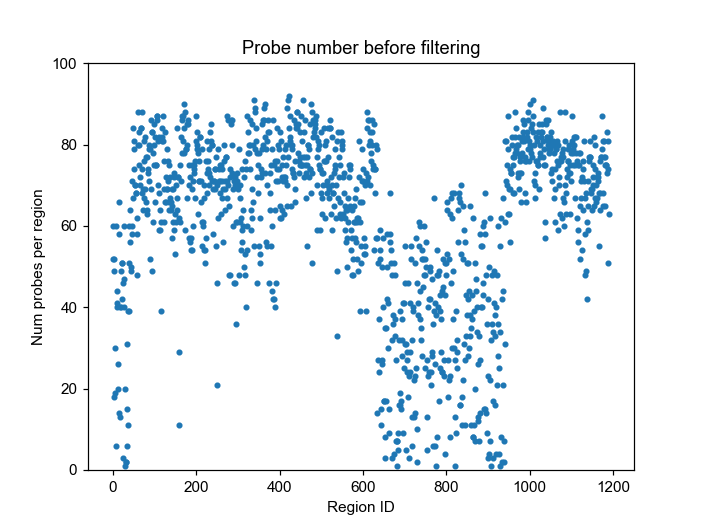

In [165]:
# number of probes histogram
fig, ax = plt.subplots()
ax.plot(cand_prob_nums, '.')
ax.set_ylabel("Num probes per region")
ax.set_xlabel("Region ID")
ax.set_title("Probe number before filtering")
ax.set_ylim([0,100])
plt.show()

In [162]:
# filter by genome counts
reload(library_tools.quality_check)

num_probes_kept = 80 # max num of probes kept for each region
filtered_pb_dict = library_tools.quality_check.Screen_probe_by_hit(library_folder, pb_dict, num_probes_kept,
                                                                  hit_type='genome')

## filter by minimum number of probes in each region
min_num_probes = 21
removed_regions = []
for _rid, _pb_class in filtered_pb_dict.items():
    if len(_pb_class.kept_probes) < min_num_probes:
        print(f"region: {_rid} removed with {len(_pb_class.kept_probes)} probes")
        removed_regions.append(_rid)
for _rid in removed_regions:
    del(filtered_pb_dict[_rid])

- Screen probes by genome counts.
-- filtering region:Chr7-6Mb-seg-1, directly append 52 probes
-- filtering region:Chr7-6Mb-seg-2, directly append 60 probes
-- filtering region:Chr7-6Mb-seg-3, directly append 49 probes
-- filtering region:Chr7-6Mb-seg-4, directly append 52 probes
-- filtering region:Chr7-6Mb-seg-5, directly append 18 probes
-- filtering region:Chr7-6Mb-seg-6, directly append 19 probes
-- filtering region:Chr7-6Mb-seg-7, directly append 30 probes
-- filtering region:Chr7-6Mb-seg-8, directly append 6 probes
-- filtering region:Chr7-6Mb-seg-9, directly append 60 probes
-- filtering region:Chr7-6Mb-seg-10, directly append 41 probes
-- filtering region:Chr7-6Mb-seg-11, directly append 44 probes
-- filtering region:Chr7-6Mb-seg-12, directly append 40 probes
-- filtering region:Chr7-6Mb-seg-13, directly append 20 probes
-- filtering region:Chr7-6Mb-seg-14, directly append 26 probes
-- filtering region:Chr7-6Mb-seg-15, directly append 66 probes
-- filtering region:Chr7-6Mb-se

In [163]:
len(pb_dict), len(filtered_pb_dict)

(1191, 1097)

<IPython.core.display.Javascript object>


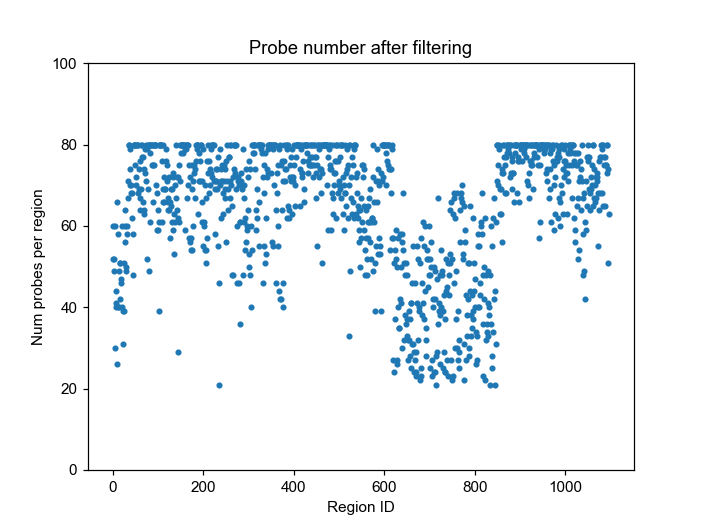

In [166]:
pb_num_dict = {_k:len(_v.kept_probes) for _k,_v in filtered_pb_dict.items()}

pb_nums = np.array(list(pb_num_dict.values()))
# number of probes histogram
fig, ax = plt.subplots()
ax.plot(pb_nums, '.')
ax.set_ylabel("Num probes per region")
ax.set_xlabel("Region ID")
ax.set_title("Probe number after filtering")
ax.set_ylim([0,100])
plt.show()

In [167]:
chr_2_region_savefile = os.path.join(library_folder, 'chr_2_final_region_num.pkl')
overwrite = True

filtered_reg_names = {}
for _reg, _pbde in filtered_pb_dict.items():
    if len(_pbde.kept_probes) > 0:
        filtered_reg_names[_reg] = list(_pbde.kept_probes.values())[0]['reg_name']

if not os.path.exists(chr_2_region_savefile) or overwrite:
    chr_2_region_num = {}
    for _reg, _info in filtered_reg_names.items():
        _chr = _info.split('_')[0].split(':')[0]
        if _chr not in chr_2_region_num:
            chr_2_region_num[_chr] = 1
        else:
            chr_2_region_num[_chr] += 1
    print(f"Saving into file: {chr_2_region_savefile}")

    pickle.dump(chr_2_region_num, open(chr_2_region_savefile, 'wb'))
else:
    print(f"loading from file: {chr_2_region_savefile}")
    chr_2_region_num = pickle.load(open(chr_2_region_savefile, 'rb'))

Saving into file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\chr_2_final_region_num.pkl


In [168]:
chr_2_region_num

{'7': 1097}

In [170]:
# 
reg_2_start = {}

for _name, _info in filtered_reg_names.items():
    _locus = _info.split('_')[0]
    _start,_end = _locus.split(':')[1].split('-')
    reg_2_start[_name] = int(_start)
#    
chr_2_region_names = {}

for _reg, _info in filtered_reg_names.items():
    _chr = _info.split('_')[0].split(':')[0]
    if _chr not in chr_2_region_names:
        chr_2_region_names[_chr] = [_reg]
    else:
        chr_2_region_names[_chr].append(_reg)
# sort
for _chr, _regs in chr_2_region_names.items():
    _sorted_regs = sorted(_regs, key=lambda _r: reg_2_start[_r])
    chr_2_region_names[_chr] = _sorted_regs
    
overwrite_region_names = True
chr_2_region_name_savefile = os.path.join(library_folder, 'chr_2_region_names.pkl')

if not os.path.exists(chr_2_region_name_savefile) or overwrite_region_names:
    print(f"Saving region names into file: {chr_2_region_name_savefile}")
    pickle.dump(chr_2_region_names, open(chr_2_region_name_savefile, 'wb'))

Saving region names into file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\chr_2_region_names.pkl


<a id='3'></a>
# 3. Load and asssemble probes

<a id='3.1'></a>
## 3.1 design readout mapping dict (region_to_readout)

load directly from http://localhost:8889/notebooks/Library_design/CTP-14-human_brain_genome/Design-codebook_long_sequential.ipynb

In [180]:
# summarize total readout usage
region_2_readout_dict = pickle.load(open(os.path.join(library_folder, 'region_2_readout.pkl'), 'rb'))
region_2_readout_dict = {str(_r):_bs for _r,_bs in region_2_readout_dict.items()}
len(region_2_readout_dict)

1097

In [181]:
region_2_readout_dict

{'Chr7-6Mb-seg-1': ['c11', 'c13', 'c16'],
 'Chr7-6Mb-seg-2': ['c30', 'c32', 'c35'],
 'Chr7-6Mb-seg-3': ['c49', 'c51', 'c54'],
 'Chr7-6Mb-seg-4': ['c68', 'c70', 'c73'],
 'Chr7-6Mb-seg-7': ['c87', 'c89', 'c92'],
 'Chr7-6Mb-seg-9': ['c106', 'c108', 'c111'],
 'Chr7-6Mb-seg-10': ['c125', 'c127', 'c130'],
 'Chr7-6Mb-seg-11': ['c144', 'c146', 'c149'],
 'Chr7-6Mb-seg-12': ['c163', 'c165', 'c168'],
 'Chr7-6Mb-seg-14': ['c179', 'c185', 'c186'],
 'Chr7-6Mb-seg-15': ['c0', 'c2', 'c18'],
 'Chr7-6Mb-seg-16': ['c19', 'c21', 'c37'],
 'Chr7-6Mb-seg-19': ['c38', 'c40', 'c56'],
 'Chr7-6Mb-seg-20': ['c57', 'c59', 'c75'],
 'Chr7-6Mb-seg-21': ['c76', 'c78', 'c94'],
 'Chr7-6Mb-seg-22': ['c95', 'c97', 'c113'],
 'Chr7-6Mb-seg-23': ['c114', 'c116', 'c132'],
 'Chr7-6Mb-seg-24': ['c133', 'c135', 'c151'],
 'Chr7-6Mb-seg-25': ['c152', 'c154', 'c170'],
 'Chr7-6Mb-seg-27': ['c174', 'c175', 'c187'],
 'Chr7-6Mb-seg-28': ['c3', 'c5', 'c6'],
 'Chr7-6Mb-seg-29': ['c22', 'c24', 'c25'],
 'Chr7-6Mb-seg-36': ['c41', 'c43', 'c

<a id='3.2'></a>
## 3.2 loading components

### primers
pick primer set 20,21

In [172]:
from ImageAnalysis3 import library_tools
primer_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Primers'
primers = library_tools.assemble.load_primers([20, 21], _primer_folder=primer_folder)

- Picked primer: ID: W1B09_primer_20
Name: W1B09_primer_20
Description: W1B09_primer_20
Number of features: 0
Seq('TAGGCGTGTCGGCCAACCAG')
- Picked primer: ID: W1B10_primer_21
Name: W1B10_primer_21
Description: W1B10_primer_21
Number of features: 0
Seq('TAATACGACTCACTATAGGGCGGGTCGATCATCGGCTTTG')


### readouts

In [173]:
# collect types from region_2_readout_dict
readout_usage_by_type = {}
for _region, _infos in region_2_readout_dict.items():
    for _info in _infos:
        if _info[0] not in readout_usage_by_type:
            readout_usage_by_type[_info[0]] = []
        if int(_info[1:]) not in readout_usage_by_type[_info[0]]:
            readout_usage_by_type[_info[0]].append(int(_info[1:]))

readout_usage_dict = {_type:len(_v) for _type,_v in readout_usage_by_type.items()}

In [174]:
from ImageAnalysis3.classes import _allowed_kwds
reload(ia.library_tools.assemble)
readout_dict ={}
overwrite_readout_usage = True
readout_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Readouts\selected_NDB_sets'

# combo
readout_type = 'combo'
# 
_type_char = _allowed_kwds[readout_type]
_readout_start = 0
_num_color = 3

readout_dict[_type_char] = library_tools.assemble.load_readouts(readout_usage_dict[_type_char], 
                                                       _type='highest_snr', 
                                                       _readout_folder=readout_folder, 
                                                       _num_colors=_num_color, # 750,647,561
                                                       _start_id=_readout_start,
                                                       )

\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Readouts\selected_NDB_sets\highest_snr_750.fasta
\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Readouts\selected_NDB_sets\highest_snr_647.fasta
\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Readouts\selected_NDB_sets\highest_snr_561.fasta
[127, 127, 127]


In [179]:
# save
readout_usage_file = os.path.join(library_folder, 'readout_usage.pkl')
if not os.path.isfile(readout_usage_file) or overwrite_readout_usage:
    print('save readout usage dict')
    pickle.dump(readout_dict, open(readout_usage_file, 'wb'))

save readout usage dict


<a id='3.3'></a>
## 3.3 assemble probes

In [188]:
reload(library_tools.assemble)
from ImageAnalysis3.library_tools.assemble import Assemble_probes

# params
assemble_params = {
    'primer_len':20,
    'num_readout_per_probe':4, 
}

In [189]:
# run assembly
cand_probes, readout_summary = Assemble_probes(library_folder, filtered_pb_dict, 
                                               region_2_readout_dict, readout_dict, primers, 
                                               primer_len=assemble_params['primer_len'], 
                                               num_readout_per_probe=assemble_params['num_readout_per_probe'], 
                                               unique_readout_per_probe=True,
                                               rc_targets=False, overwrite=True)

- Assemble probes by given target sequences, readouts and primers.
-- included readout types: ['c']
--- assemblying 52 probes in region: Chr7-6Mb-seg-1
--- assemblying 60 probes in region: Chr7-6Mb-seg-2
--- assemblying 49 probes in region: Chr7-6Mb-seg-3
--- assemblying 52 probes in region: Chr7-6Mb-seg-4
--- assemblying 30 probes in region: Chr7-6Mb-seg-7
--- assemblying 60 probes in region: Chr7-6Mb-seg-9
--- assemblying 41 probes in region: Chr7-6Mb-seg-10
--- assemblying 44 probes in region: Chr7-6Mb-seg-11
--- assemblying 40 probes in region: Chr7-6Mb-seg-12
--- assemblying 26 probes in region: Chr7-6Mb-seg-14
--- assemblying 66 probes in region: Chr7-6Mb-seg-15
--- assemblying 58 probes in region: Chr7-6Mb-seg-16
--- assemblying 40 probes in region: Chr7-6Mb-seg-19
--- assemblying 49 probes in region: Chr7-6Mb-seg-20
--- assemblying 40 probes in region: Chr7-6Mb-seg-21
--- assemblying 51 probes in region: Chr7-6Mb-seg-22
--- assemblying 42 probes in region: Chr7-6Mb-seg-23
--- a

--- assemblying 80 probes in region: Chr7-6Mb-seg-169
--- assemblying 80 probes in region: Chr7-6Mb-seg-170
--- assemblying 80 probes in region: Chr7-6Mb-seg-171
--- assemblying 78 probes in region: Chr7-6Mb-seg-172
--- assemblying 80 probes in region: Chr7-6Mb-seg-173
--- assemblying 80 probes in region: Chr7-6Mb-seg-174
--- assemblying 59 probes in region: Chr7-6Mb-seg-175
--- assemblying 79 probes in region: Chr7-6Mb-seg-176
--- assemblying 79 probes in region: Chr7-6Mb-seg-177
--- assemblying 80 probes in region: Chr7-6Mb-seg-178
--- assemblying 67 probes in region: Chr7-6Mb-seg-179
--- assemblying 80 probes in region: Chr7-6Mb-seg-180
--- assemblying 80 probes in region: Chr7-6Mb-seg-181
--- assemblying 80 probes in region: Chr7-6Mb-seg-182
--- assemblying 70 probes in region: Chr7-6Mb-seg-183
--- assemblying 75 probes in region: Chr7-6Mb-seg-184
--- assemblying 57 probes in region: Chr7-6Mb-seg-185
--- assemblying 72 probes in region: Chr7-6Mb-seg-186
--- assemblying 56 probes in

--- assemblying 80 probes in region: Chr7-6Mb-seg-324
--- assemblying 78 probes in region: Chr7-6Mb-seg-325
--- assemblying 80 probes in region: Chr7-6Mb-seg-326
--- assemblying 78 probes in region: Chr7-6Mb-seg-327
--- assemblying 80 probes in region: Chr7-6Mb-seg-328
--- assemblying 80 probes in region: Chr7-6Mb-seg-329
--- assemblying 80 probes in region: Chr7-6Mb-seg-330
--- assemblying 74 probes in region: Chr7-6Mb-seg-331
--- assemblying 59 probes in region: Chr7-6Mb-seg-332
--- assemblying 64 probes in region: Chr7-6Mb-seg-333
--- assemblying 69 probes in region: Chr7-6Mb-seg-334
--- assemblying 62 probes in region: Chr7-6Mb-seg-335
--- assemblying 80 probes in region: Chr7-6Mb-seg-336
--- assemblying 80 probes in region: Chr7-6Mb-seg-337
--- assemblying 66 probes in region: Chr7-6Mb-seg-338
--- assemblying 80 probes in region: Chr7-6Mb-seg-339
--- assemblying 55 probes in region: Chr7-6Mb-seg-340
--- assemblying 80 probes in region: Chr7-6Mb-seg-341
--- assemblying 80 probes in

--- assemblying 80 probes in region: Chr7-6Mb-seg-484
--- assemblying 80 probes in region: Chr7-6Mb-seg-485
--- assemblying 80 probes in region: Chr7-6Mb-seg-486
--- assemblying 80 probes in region: Chr7-6Mb-seg-487
--- assemblying 80 probes in region: Chr7-6Mb-seg-488
--- assemblying 80 probes in region: Chr7-6Mb-seg-489
--- assemblying 70 probes in region: Chr7-6Mb-seg-490
--- assemblying 59 probes in region: Chr7-6Mb-seg-491
--- assemblying 77 probes in region: Chr7-6Mb-seg-492
--- assemblying 79 probes in region: Chr7-6Mb-seg-493
--- assemblying 80 probes in region: Chr7-6Mb-seg-494
--- assemblying 75 probes in region: Chr7-6Mb-seg-495
--- assemblying 80 probes in region: Chr7-6Mb-seg-496
--- assemblying 74 probes in region: Chr7-6Mb-seg-497
--- assemblying 59 probes in region: Chr7-6Mb-seg-498
--- assemblying 74 probes in region: Chr7-6Mb-seg-499
--- assemblying 68 probes in region: Chr7-6Mb-seg-500
--- assemblying 80 probes in region: Chr7-6Mb-seg-501
--- assemblying 67 probes in

--- assemblying 54 probes in region: Chr7-6Mb-seg-642
--- assemblying 59 probes in region: Chr7-6Mb-seg-643
--- assemblying 52 probes in region: Chr7-6Mb-seg-644
--- assemblying 27 probes in region: Chr7-6Mb-seg-647
--- assemblying 50 probes in region: Chr7-6Mb-seg-648
--- assemblying 26 probes in region: Chr7-6Mb-seg-649
--- assemblying 40 probes in region: Chr7-6Mb-seg-650
--- assemblying 57 probes in region: Chr7-6Mb-seg-651
--- assemblying 35 probes in region: Chr7-6Mb-seg-655
--- assemblying 35 probes in region: Chr7-6Mb-seg-660
--- assemblying 42 probes in region: Chr7-6Mb-seg-661
--- assemblying 58 probes in region: Chr7-6Mb-seg-662
--- assemblying 50 probes in region: Chr7-6Mb-seg-663
--- assemblying 41 probes in region: Chr7-6Mb-seg-664
--- assemblying 30 probes in region: Chr7-6Mb-seg-665
--- assemblying 58 probes in region: Chr7-6Mb-seg-668
--- assemblying 56 probes in region: Chr7-6Mb-seg-669
--- assemblying 68 probes in region: Chr7-6Mb-seg-670
--- assemblying 54 probes in

--- assemblying 58 probes in region: Chr7-6Mb-seg-889
--- assemblying 55 probes in region: Chr7-6Mb-seg-890
--- assemblying 40 probes in region: Chr7-6Mb-seg-891
--- assemblying 40 probes in region: Chr7-6Mb-seg-892
--- assemblying 55 probes in region: Chr7-6Mb-seg-893
--- assemblying 43 probes in region: Chr7-6Mb-seg-894
--- assemblying 46 probes in region: Chr7-6Mb-seg-895
--- assemblying 60 probes in region: Chr7-6Mb-seg-896
--- assemblying 61 probes in region: Chr7-6Mb-seg-897
--- assemblying 58 probes in region: Chr7-6Mb-seg-900
--- assemblying 68 probes in region: Chr7-6Mb-seg-901
--- assemblying 48 probes in region: Chr7-6Mb-seg-902
--- assemblying 36 probes in region: Chr7-6Mb-seg-904
--- assemblying 23 probes in region: Chr7-6Mb-seg-906
--- assemblying 42 probes in region: Chr7-6Mb-seg-907
--- assemblying 50 probes in region: Chr7-6Mb-seg-911
--- assemblying 62 probes in region: Chr7-6Mb-seg-912
--- assemblying 22 probes in region: Chr7-6Mb-seg-913
--- assemblying 32 probes in

--- assemblying 80 probes in region: Chr7-6Mb-seg-1067
--- assemblying 67 probes in region: Chr7-6Mb-seg-1068
--- assemblying 78 probes in region: Chr7-6Mb-seg-1069
--- assemblying 74 probes in region: Chr7-6Mb-seg-1070
--- assemblying 69 probes in region: Chr7-6Mb-seg-1071
--- assemblying 61 probes in region: Chr7-6Mb-seg-1072
--- assemblying 79 probes in region: Chr7-6Mb-seg-1073
--- assemblying 79 probes in region: Chr7-6Mb-seg-1074
--- assemblying 80 probes in region: Chr7-6Mb-seg-1075
--- assemblying 76 probes in region: Chr7-6Mb-seg-1076
--- assemblying 80 probes in region: Chr7-6Mb-seg-1077
--- assemblying 59 probes in region: Chr7-6Mb-seg-1078
--- assemblying 75 probes in region: Chr7-6Mb-seg-1079
--- assemblying 70 probes in region: Chr7-6Mb-seg-1080
--- assemblying 72 probes in region: Chr7-6Mb-seg-1081
--- assemblying 63 probes in region: Chr7-6Mb-seg-1082
--- assemblying 80 probes in region: Chr7-6Mb-seg-1083
--- assemblying 76 probes in region: Chr7-6Mb-seg-1084
--- assemb

# 4.Check quality


## 4.1 Load probes

Checking procedures could restart from here

In [190]:
# folder for this library
# biopython imports
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

# candidate full-length probe filename
candidate_basename = 'candidate_probes.fasta' # old version
# load full probes
full_records = []
with open(os.path.join(library_folder, candidate_basename), 'r') as handle:
    for record in SeqIO.parse(handle, "fasta"):
        full_records.append(record)

print(f"Total probe loaded: {len(full_records)}")

Total probe loaded: 70833


### Manually input the following info to double check!

In [185]:
num_readout_per_probe = 4
primer_len=20
target_len=42
min_num_probes = 21
# merfish related
num_on_bits = 3

### 4.1.1 check primer usage

In [186]:
import ImageAnalysis3.library_tools.quality_check as check
reload(check)
primer_check = check._check_primer_usage(full_records, primers[0], primers[1], primer_len=primer_len)
print(primer_check)

-- Checking primer usage, total probes: 70833
True


### 4.1.2 check region probe number

In [194]:
reload(check)
reg_size_dic, len_check = check._check_region_size(full_records, 
                                                   species_marker = 'gene_',
                                                   min_size=min_num_probes)
print(len_check)

gene: Chr7-6Mb-seg-1 -> 52
gene: Chr7-6Mb-seg-2 -> 60
gene: Chr7-6Mb-seg-3 -> 49
gene: Chr7-6Mb-seg-4 -> 52
gene: Chr7-6Mb-seg-7 -> 30
gene: Chr7-6Mb-seg-9 -> 60
gene: Chr7-6Mb-seg-10 -> 41
gene: Chr7-6Mb-seg-11 -> 44
gene: Chr7-6Mb-seg-12 -> 40
gene: Chr7-6Mb-seg-14 -> 26
gene: Chr7-6Mb-seg-15 -> 66
gene: Chr7-6Mb-seg-16 -> 58
gene: Chr7-6Mb-seg-19 -> 40
gene: Chr7-6Mb-seg-20 -> 49
gene: Chr7-6Mb-seg-21 -> 40
gene: Chr7-6Mb-seg-22 -> 51
gene: Chr7-6Mb-seg-23 -> 42
gene: Chr7-6Mb-seg-24 -> 51
gene: Chr7-6Mb-seg-25 -> 46
gene: Chr7-6Mb-seg-27 -> 47
gene: Chr7-6Mb-seg-28 -> 60
gene: Chr7-6Mb-seg-29 -> 40
gene: Chr7-6Mb-seg-36 -> 31
gene: Chr7-6Mb-seg-38 -> 39
gene: Chr7-6Mb-seg-39 -> 39
gene: Chr7-6Mb-seg-40 -> 51
gene: Chr7-6Mb-seg-41 -> 60
gene: Chr7-6Mb-seg-42 -> 56
gene: Chr7-6Mb-seg-43 -> 64
gene: Chr7-6Mb-seg-44 -> 49
gene: Chr7-6Mb-seg-45 -> 50
gene: Chr7-6Mb-seg-46 -> 60
gene: Chr7-6Mb-seg-47 -> 58
gene: Chr7-6Mb-seg-48 -> 71
gene: Chr7-6Mb-seg-49 -> 67
gene: Chr7-6Mb-seg-50 -> 8

<IPython.core.display.Javascript object>


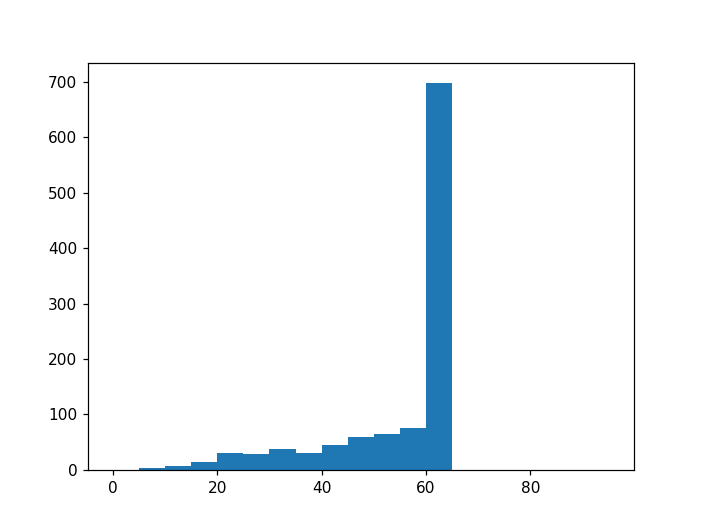

In [224]:
plt.figure()
plt.hist(list(reg_size_dic.values()), bins=np.arange(0,100,5))
plt.show()

### 4.1.3 check readout usage for each gene

In [198]:
reload(check)
check_readout_dict = pickle.load(open(os.path.join(library_folder, 'readout_usage.pkl'), 'rb'))

reg_readout_dic, reg2readout_check = check._check_region_to_readouts(full_records, check_readout_dict, 
                                                                     total_readout_num=num_on_bits)
print(reg2readout_check)

Chr7-6Mb-seg-1 -> ['NDB_801', 'NDB_725', 'NDB_710']
Chr7-6Mb-seg-2 -> ['NDB_400', 'NDB_750', 'NDB_825']
Chr7-6Mb-seg-3 -> ['NDB_458', 'NDB_466', 'NDB_511']
Chr7-6Mb-seg-4 -> ['NDB_786', 'NDB_860', 'NDB_680']
Chr7-6Mb-seg-7 -> ['NDB_754', 'NDB_1020', 'NDB_681']
Chr7-6Mb-seg-9 -> ['NDB_461', 'NDB_631', 'NDB_532']
Chr7-6Mb-seg-10 -> ['NDB_921', 'NDB_887', 'NDB_506']
Chr7-6Mb-seg-11 -> ['NDB_835', 'NDB_846', 'NDB_864']
Chr7-6Mb-seg-12 -> ['NDB_941', 'NDB_385', 'NDB_838']
Chr7-6Mb-seg-14 -> ['NDB_396', 'NDB_660', 'NDB_706']
Chr7-6Mb-seg-15 -> ['NDB_784', 'NDB_759', 'NDB_718']
Chr7-6Mb-seg-16 -> ['NDB_971', 'NDB_847', 'NDB_431']
Chr7-6Mb-seg-19 -> ['NDB_768', 'NDB_554', 'NDB_621']
Chr7-6Mb-seg-20 -> ['NDB_901', 'NDB_375', 'NDB_529']
Chr7-6Mb-seg-21 -> ['NDB_443', 'NDB_508', 'NDB_878']
Chr7-6Mb-seg-22 -> ['NDB_438', 'NDB_332', 'NDB_741']
Chr7-6Mb-seg-23 -> ['NDB_616', 'NDB_444', 'NDB_805']
Chr7-6Mb-seg-24 -> ['NDB_347', 'NDB_730', 'NDB_896']
Chr7-6Mb-seg-25 -> ['NDB_813', 'NDB_989', 'NDB_687'

### 4.1.4 check readout usage in the library

In [199]:
reload(check)
readout_reg_dic, readout2reg_check = check._check_readout_to_region(reg_readout_dic, full_records, 
                                                                    check_readout_dict, primer_len=primer_len, 
                                                                    target_len=target_len,
                                                                    probe_readout_num=num_readout_per_probe)
print(readout2reg_check)

-- extracting probes from >region:Chr7-6Mb-seg-1, region:Chr7-6Mb-seg-2, region:Chr7-6Mb-seg-3, region:Chr7-6Mb-seg-4, region:Chr7-6Mb-seg-7, region:Chr7-6Mb-seg-9, region:Chr7-6Mb-seg-10, region:Chr7-6Mb-seg-11, region:Chr7-6Mb-seg-12, region:Chr7-6Mb-seg-14, region:Chr7-6Mb-seg-15, region:Chr7-6Mb-seg-16, region:Chr7-6Mb-seg-19, region:Chr7-6Mb-seg-20, region:Chr7-6Mb-seg-21, region:Chr7-6Mb-seg-22, region:Chr7-6Mb-seg-23, region:Chr7-6Mb-seg-24, region:Chr7-6Mb-seg-25, region:Chr7-6Mb-seg-27, region:Chr7-6Mb-seg-28, region:Chr7-6Mb-seg-29, region:Chr7-6Mb-seg-36, region:Chr7-6Mb-seg-38, region:Chr7-6Mb-seg-39, region:Chr7-6Mb-seg-40, region:Chr7-6Mb-seg-41, region:Chr7-6Mb-seg-42, region:Chr7-6Mb-seg-43, region:Chr7-6Mb-seg-44, region:Chr7-6Mb-seg-45, region:Chr7-6Mb-seg-46, region:Chr7-6Mb-seg-47, region:Chr7-6Mb-seg-48, region:Chr7-6Mb-seg-49, region:Chr7-6Mb-seg-50, region:Chr7-6Mb-seg-51, region:Chr7-6Mb-seg-52, region:Chr7-6Mb-seg-53, region:Chr7-6Mb-seg-54, region:Chr7-6Mb-seg

region:Chr7-6Mb-seg-384, region:Chr7-6Mb-seg-385, region:Chr7-6Mb-seg-386, region:Chr7-6Mb-seg-387, region:Chr7-6Mb-seg-388, region:Chr7-6Mb-seg-389, region:Chr7-6Mb-seg-390, region:Chr7-6Mb-seg-391, region:Chr7-6Mb-seg-392, region:Chr7-6Mb-seg-393, region:Chr7-6Mb-seg-394, region:Chr7-6Mb-seg-395, region:Chr7-6Mb-seg-396, region:Chr7-6Mb-seg-397, region:Chr7-6Mb-seg-398, region:Chr7-6Mb-seg-399, region:Chr7-6Mb-seg-400, region:Chr7-6Mb-seg-401, region:Chr7-6Mb-seg-402, region:Chr7-6Mb-seg-403, region:Chr7-6Mb-seg-404, region:Chr7-6Mb-seg-405, region:Chr7-6Mb-seg-406, region:Chr7-6Mb-seg-407, region:Chr7-6Mb-seg-408, region:Chr7-6Mb-seg-409, region:Chr7-6Mb-seg-410, region:Chr7-6Mb-seg-411, region:Chr7-6Mb-seg-412, region:Chr7-6Mb-seg-413, region:Chr7-6Mb-seg-414, region:Chr7-6Mb-seg-415, region:Chr7-6Mb-seg-416, region:Chr7-6Mb-seg-417, region:Chr7-6Mb-seg-418, region:Chr7-6Mb-seg-419, region:Chr7-6Mb-seg-420, region:Chr7-6Mb-seg-421, region:Chr7-6Mb-seg-422, region:Chr7-6Mb-seg-423, 

region:Chr7-6Mb-seg-906, region:Chr7-6Mb-seg-907, region:Chr7-6Mb-seg-911, region:Chr7-6Mb-seg-912, region:Chr7-6Mb-seg-913, region:Chr7-6Mb-seg-916, region:Chr7-6Mb-seg-917, region:Chr7-6Mb-seg-918, region:Chr7-6Mb-seg-919, region:Chr7-6Mb-seg-922, region:Chr7-6Mb-seg-923, region:Chr7-6Mb-seg-924, region:Chr7-6Mb-seg-926, region:Chr7-6Mb-seg-929, region:Chr7-6Mb-seg-931, region:Chr7-6Mb-seg-932, region:Chr7-6Mb-seg-933, region:Chr7-6Mb-seg-934, region:Chr7-6Mb-seg-935, region:Chr7-6Mb-seg-937, region:Chr7-6Mb-seg-938, region:Chr7-6Mb-seg-939, region:Chr7-6Mb-seg-942, region:Chr7-6Mb-seg-944, region:Chr7-6Mb-seg-945, region:Chr7-6Mb-seg-946, region:Chr7-6Mb-seg-947, region:Chr7-6Mb-seg-950, region:Chr7-6Mb-seg-951, region:Chr7-6Mb-seg-952, region:Chr7-6Mb-seg-953, region:Chr7-6Mb-seg-954, region:Chr7-6Mb-seg-955, region:Chr7-6Mb-seg-956, region:Chr7-6Mb-seg-957, region:Chr7-6Mb-seg-958, region:Chr7-6Mb-seg-959, region:Chr7-6Mb-seg-960, region:Chr7-6Mb-seg-961, region:Chr7-6Mb-seg-962, 

NDB_1013 -> ['Chr7-6Mb-seg-1051', 'Chr7-6Mb-seg-1091', 'Chr7-6Mb-seg-593', 'Chr7-6Mb-seg-623', 'Chr7-6Mb-seg-664', 'Chr7-6Mb-seg-787', 'Chr7-6Mb-seg-873', 'Chr7-6Mb-seg-971']
NDB_1014 -> ['Chr7-6Mb-seg-1043', 'Chr7-6Mb-seg-1153', 'Chr7-6Mb-seg-605', 'Chr7-6Mb-seg-668', 'Chr7-6Mb-seg-717', 'Chr7-6Mb-seg-776', 'Chr7-6Mb-seg-836', 'Chr7-6Mb-seg-892', 'Chr7-6Mb-seg-983']
NDB_1020 -> ['Chr7-6Mb-seg-139', 'Chr7-6Mb-seg-180', 'Chr7-6Mb-seg-270', 'Chr7-6Mb-seg-320', 'Chr7-6Mb-seg-370', 'Chr7-6Mb-seg-460', 'Chr7-6Mb-seg-530', 'Chr7-6Mb-seg-69', 'Chr7-6Mb-seg-7']
NDB_1023 -> ['Chr7-6Mb-seg-114', 'Chr7-6Mb-seg-165', 'Chr7-6Mb-seg-245', 'Chr7-6Mb-seg-305', 'Chr7-6Mb-seg-395', 'Chr7-6Mb-seg-485', 'Chr7-6Mb-seg-54', 'Chr7-6Mb-seg-545']
NDB_1027 -> ['Chr7-6Mb-seg-119', 'Chr7-6Mb-seg-200', 'Chr7-6Mb-seg-270', 'Chr7-6Mb-seg-330', 'Chr7-6Mb-seg-400', 'Chr7-6Mb-seg-480', 'Chr7-6Mb-seg-510', 'Chr7-6Mb-seg-550', 'Chr7-6Mb-seg-59']
NDB_1028 -> ['Chr7-6Mb-seg-1014', 'Chr7-6Mb-seg-1084', 'Chr7-6Mb-seg-1124', 

### 4.1.5 check bewteen probes

In [203]:
# construct internal map
reload(check)
int_map = check._construct_internal_map(full_records, library_folder, save=False) 

In [204]:
# internal check probes
readout_count_dic, readout_count_check = check._check_readout_in_probes(readout_reg_dic, reg_size_dic, int_map, readout_dict)
print(readout_count_check)

True


In [205]:
# check between probes
kept_records, removed_count = check._check_between_probes(full_records, int_map, 
                                                          primer_len=primer_len, 
                                                          target_len=target_len)

--- Sequence:loc_7:44014999-44019999_gene_Chr7-6Mb-seg-4_pb_5_pos_438_strand_+_readouts_[NDB_680_c,NDB_680_c,NDB_680_c,NDB_680_c]_primers_[W1B09_primer_20,W1B10_primer_21] got hits:53, dumped
--- Sequence:loc_7:44104999-44109999_gene_Chr7-6Mb-seg-22_pb_0_pos_6_strand_+_readouts_[NDB_438_c,NDB_438_c,NDB_438_c,NDB_438_c]_primers_[W1B09_primer_20,W1B10_primer_21] got hits:57, dumped
--- Sequence:loc_7:44174999-44179999_gene_Chr7-6Mb-seg-36_pb_29_pos_4234_strand_+_readouts_[NDB_762_c,NDB_762_c,NDB_762_c,NDB_762_c]_primers_[W1B09_primer_20,W1B10_primer_21] got hits:197, dumped
--- Sequence:loc_7:44189999-44194999_gene_Chr7-6Mb-seg-39_pb_30_pos_3533_strand_+_readouts_[NDB_455_c,NDB_455_c,NDB_455_c,NDB_455_c]_primers_[W1B09_primer_20,W1B10_primer_21] got hits:51, dumped
--- Sequence:loc_7:44209999-44214999_gene_Chr7-6Mb-seg-43_pb_1_pos_252_strand_+_readouts_[NDB_641_c,NDB_641_c,NDB_641_c,NDB_641_c]_primers_[W1B09_primer_20,W1B10_primer_21] got hits:55, dumped
--- Sequence:loc_7:44239999-44244

--- Sequence:loc_7:44859999-44864999_gene_Chr7-6Mb-seg-173_pb_23_pos_1836_strand_+_readouts_[NDB_835_c,NDB_835_c,NDB_835_c,NDB_835_c]_primers_[W1B09_primer_20,W1B10_primer_21] got hits:85, dumped
--- Sequence:loc_7:44859999-44864999_gene_Chr7-6Mb-seg-173_pb_24_pos_1878_strand_+_readouts_[NDB_347_c,NDB_347_c,NDB_347_c,NDB_347_c]_primers_[W1B09_primer_20,W1B10_primer_21] got hits:65, dumped
--- Sequence:loc_7:44859999-44864999_gene_Chr7-6Mb-seg-173_pb_26_pos_1993_strand_-_readouts_[NDB_835_c,NDB_835_c,NDB_835_c,NDB_835_c]_primers_[W1B09_primer_20,W1B10_primer_21] got hits:109, dumped
--- Sequence:loc_7:44859999-44864999_gene_Chr7-6Mb-seg-173_pb_27_pos_2054_strand_+_readouts_[NDB_347_c,NDB_347_c,NDB_347_c,NDB_347_c]_primers_[W1B09_primer_20,W1B10_primer_21] got hits:83, dumped
--- Sequence:loc_7:44859999-44864999_gene_Chr7-6Mb-seg-173_pb_28_pos_2096_strand_+_readouts_[NDB_1047_c,NDB_1047_c,NDB_1047_c,NDB_1047_c]_primers_[W1B09_primer_20,W1B10_primer_21] got hits:113, dumped
--- Sequence:l

--- Sequence:loc_7:46179999-46184999_gene_Chr7-6Mb-seg-437_pb_17_pos_1188_strand_+_readouts_[NDB_456_c,NDB_456_c,NDB_456_c,NDB_456_c]_primers_[W1B09_primer_20,W1B10_primer_21] got hits:55, dumped
--- Sequence:loc_7:46319999-46324999_gene_Chr7-6Mb-seg-465_pb_21_pos_1492_strand_+_readouts_[NDB_1066_c,NDB_1066_c,NDB_1066_c,NDB_1066_c]_primers_[W1B09_primer_20,W1B10_primer_21] got hits:54, dumped
--- Sequence:loc_7:47269999-47274999_gene_Chr7-6Mb-seg-655_pb_14_pos_1888_strand_+_readouts_[NDB_365_c,NDB_365_c,NDB_365_c,NDB_365_c]_primers_[W1B09_primer_20,W1B10_primer_21] got hits:66, dumped
--- Sequence:loc_7:47319999-47324999_gene_Chr7-6Mb-seg-665_pb_29_pos_4721_strand_+_readouts_[NDB_740_c,NDB_740_c,NDB_740_c,NDB_740_c]_primers_[W1B09_primer_20,W1B10_primer_21] got hits:60, dumped
--- Sequence:loc_7:47374999-47379999_gene_Chr7-6Mb-seg-676_pb_13_pos_1306_strand_+_readouts_[NDB_423_c,NDB_423_c,NDB_423_c,NDB_423_c]_primers_[W1B09_primer_20,W1B10_primer_21] got hits:53, dumped
--- Sequence:loc

In [206]:
# clear memory
del(int_map)

### 4.1.6 finish checking, save

In [207]:
print(len(kept_records), len(cand_probes))

70719 70833


In [208]:
# save kept records
with open(os.path.join(library_folder, 'filtered_full_probes.fasta'), 'w') as output_handle:
    SeqIO.write(kept_records, output_handle, "fasta")

## 4.2 BLAST screening of probes

create the local blast database by:
```bash
makeblastdb -in C:\Users\puzheng\Documents\Tools\lowercase_masked\Mus_musculus.GRCm38.dna_sm.merged.fa -dbtype nucl -parse_seqids -out GRCm38_ensembl -title "Mouse chromosomes soft masked" -blastdb_version 4![image.png](attachment:image.png)
```

The outputs are:
```bash
Building a new DB, current time: 03/30/2021 21:49:18
New DB name:   C:\Users\puzheng\Documents\Tools\GRCm38_ensembl
New DB title:  Mouse chromosomes soft masked
Sequence type: Nucleotide
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 66 sequences in 42.2668 seconds.
```

In [209]:
import ImageAnalysis3.library_tools.quality_check as check
reload(check)

<module 'ImageAnalysis3.library_tools.quality_check' from 'E:\\Users\\puzheng_new\\Documents\\Chromatin_Analysis_Scripts\\Library_design\\CTP-14-human_brain_genome\\..\\..\\..\\..\\Documents\\ImageAnalysis3\\library_tools\\quality_check.py'>

In [210]:
if 'kept_records' not in locals() or len(kept_records) == 0:
    kept_records = []
    with open(os.path.join(library_folder, 'filtered_full_probes.fasta'), 'r') as handle:
        for record in SeqIO.parse(handle, "fasta"):
            kept_records.append(record)
print(len(kept_records))

70719


In [212]:
blast_database = os.path.join(reference_folder, 'blast_database', 'GRCm38_ensembl')

check.Blast_probes(kept_records, library_folder, num_threads=44, 
                   blast_db=blast_database, blast_evalue=100, overwrite=True)

- Blast probe against \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\mouse\GRCm38_ensembl\blast_database\GRCm38_ensembl
-- number of probes loaded: 70719
-- processing region: Chr7-6Mb-seg-1 with 52 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-1.fasta
--- *blasting region: Chr7-6Mb-seg-1
--- total time for blast Chr7-6Mb-seg-1: 5.539s.
-- processing region: Chr7-6Mb-seg-10 with 41 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-10.fasta
--- *blasting region: Chr7-6Mb-seg-10
--- total time for blast Chr7-6Mb-seg-10: 2.867s.
-- processing region: Chr7-6Mb-seg-100 with 80 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-100.fasta
--- *blasting region: Chr7-6Mb-seg-100
--- total time for blast Chr7

--- total time for blast Chr7-6Mb-seg-1022: 5.469s.
-- processing region: Chr7-6Mb-seg-1023 with 67 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-1023.fasta
--- *blasting region: Chr7-6Mb-seg-1023
--- total time for blast Chr7-6Mb-seg-1023: 6.708s.
-- processing region: Chr7-6Mb-seg-1024 with 73 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-1024.fasta
--- *blasting region: Chr7-6Mb-seg-1024
--- total time for blast Chr7-6Mb-seg-1024: 3.872s.
-- processing region: Chr7-6Mb-seg-1025 with 76 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-1025.fasta
--- *blasting region: Chr7-6Mb-seg-1025
--- total time for blast Chr7-6Mb-seg-1025: 3.520s.
-- processing region: Chr7-6Mb-seg-1026 with 80 probes
--- *writing f

--- total time for blast Chr7-6Mb-seg-1048: 3.315s.
-- processing region: Chr7-6Mb-seg-1049 with 80 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-1049.fasta
--- *blasting region: Chr7-6Mb-seg-1049
--- total time for blast Chr7-6Mb-seg-1049: 4.195s.
-- processing region: Chr7-6Mb-seg-105 with 75 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-105.fasta
--- *blasting region: Chr7-6Mb-seg-105
--- total time for blast Chr7-6Mb-seg-105: 3.838s.
-- processing region: Chr7-6Mb-seg-1050 with 80 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-1050.fasta
--- *blasting region: Chr7-6Mb-seg-1050
--- total time for blast Chr7-6Mb-seg-1050: 3.612s.
-- processing region: Chr7-6Mb-seg-1051 with 80 probes
--- *writing file:

--- total time for blast Chr7-6Mb-seg-1073: 5.767s.
-- processing region: Chr7-6Mb-seg-1074 with 79 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-1074.fasta
--- *blasting region: Chr7-6Mb-seg-1074
--- total time for blast Chr7-6Mb-seg-1074: 4.024s.
-- processing region: Chr7-6Mb-seg-1075 with 80 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-1075.fasta
--- *blasting region: Chr7-6Mb-seg-1075
--- total time for blast Chr7-6Mb-seg-1075: 4.143s.
-- processing region: Chr7-6Mb-seg-1076 with 76 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-1076.fasta
--- *blasting region: Chr7-6Mb-seg-1076
--- total time for blast Chr7-6Mb-seg-1076: 4.154s.
-- processing region: Chr7-6Mb-seg-1077 with 80 probes
--- *writing f

--- total time for blast Chr7-6Mb-seg-1099: 4.738s.
-- processing region: Chr7-6Mb-seg-11 with 44 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-11.fasta
--- *blasting region: Chr7-6Mb-seg-11
--- total time for blast Chr7-6Mb-seg-11: 3.227s.
-- processing region: Chr7-6Mb-seg-110 with 70 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-110.fasta
--- *blasting region: Chr7-6Mb-seg-110
--- total time for blast Chr7-6Mb-seg-110: 3.714s.
-- processing region: Chr7-6Mb-seg-1100 with 72 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-1100.fasta
--- *blasting region: Chr7-6Mb-seg-1100
--- total time for blast Chr7-6Mb-seg-1100: 6.899s.
-- processing region: Chr7-6Mb-seg-1101 with 79 probes
--- *writing file: \\10.24

--- total time for blast Chr7-6Mb-seg-1124: 3.789s.
-- processing region: Chr7-6Mb-seg-1125 with 59 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-1125.fasta
--- *blasting region: Chr7-6Mb-seg-1125
--- total time for blast Chr7-6Mb-seg-1125: 4.471s.
-- processing region: Chr7-6Mb-seg-1126 with 56 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-1126.fasta
--- *blasting region: Chr7-6Mb-seg-1126
--- total time for blast Chr7-6Mb-seg-1126: 3.380s.
-- processing region: Chr7-6Mb-seg-1127 with 75 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-1127.fasta
--- *blasting region: Chr7-6Mb-seg-1127
--- total time for blast Chr7-6Mb-seg-1127: 5.272s.
-- processing region: Chr7-6Mb-seg-1128 with 78 probes
--- *writing f

--- total time for blast Chr7-6Mb-seg-115: 5.476s.
-- processing region: Chr7-6Mb-seg-1150 with 59 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-1150.fasta
--- *blasting region: Chr7-6Mb-seg-1150
--- total time for blast Chr7-6Mb-seg-1150: 2.938s.
-- processing region: Chr7-6Mb-seg-1151 with 65 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-1151.fasta
--- *blasting region: Chr7-6Mb-seg-1151
--- total time for blast Chr7-6Mb-seg-1151: 3.260s.
-- processing region: Chr7-6Mb-seg-1152 with 77 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-1152.fasta
--- *blasting region: Chr7-6Mb-seg-1152
--- total time for blast Chr7-6Mb-seg-1152: 5.456s.
-- processing region: Chr7-6Mb-seg-1153 with 76 probes
--- *writing fi

--- total time for blast Chr7-6Mb-seg-1175: 5.155s.
-- processing region: Chr7-6Mb-seg-1176 with 68 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-1176.fasta
--- *blasting region: Chr7-6Mb-seg-1176
--- total time for blast Chr7-6Mb-seg-1176: 3.392s.
-- processing region: Chr7-6Mb-seg-1177 with 55 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-1177.fasta
--- *blasting region: Chr7-6Mb-seg-1177
--- total time for blast Chr7-6Mb-seg-1177: 3.949s.
-- processing region: Chr7-6Mb-seg-1178 with 76 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-1178.fasta
--- *blasting region: Chr7-6Mb-seg-1178
--- total time for blast Chr7-6Mb-seg-1178: 3.970s.
-- processing region: Chr7-6Mb-seg-1179 with 64 probes
--- *writing f

--- total time for blast Chr7-6Mb-seg-1200: 4.511s.
-- processing region: Chr7-6Mb-seg-121 with 80 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-121.fasta
--- *blasting region: Chr7-6Mb-seg-121
--- total time for blast Chr7-6Mb-seg-121: 3.522s.
-- processing region: Chr7-6Mb-seg-122 with 80 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-122.fasta
--- *blasting region: Chr7-6Mb-seg-122
--- total time for blast Chr7-6Mb-seg-122: 4.196s.
-- processing region: Chr7-6Mb-seg-123 with 76 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-123.fasta
--- *blasting region: Chr7-6Mb-seg-123
--- total time for blast Chr7-6Mb-seg-123: 3.951s.
-- processing region: Chr7-6Mb-seg-124 with 61 probes
--- *writing file: \\10.245

--- total time for blast Chr7-6Mb-seg-148: 4.026s.
-- processing region: Chr7-6Mb-seg-149 with 59 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-149.fasta
--- *blasting region: Chr7-6Mb-seg-149
--- total time for blast Chr7-6Mb-seg-149: 4.688s.
-- processing region: Chr7-6Mb-seg-15 with 66 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-15.fasta
--- *blasting region: Chr7-6Mb-seg-15
--- total time for blast Chr7-6Mb-seg-15: 4.344s.
-- processing region: Chr7-6Mb-seg-150 with 63 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-150.fasta
--- *blasting region: Chr7-6Mb-seg-150
--- total time for blast Chr7-6Mb-seg-150: 3.975s.
-- processing region: Chr7-6Mb-seg-151 with 53 probes
--- *writing file: \\10.245.74.2

--- total time for blast Chr7-6Mb-seg-176: 3.981s.
-- processing region: Chr7-6Mb-seg-177 with 79 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-177.fasta
--- *blasting region: Chr7-6Mb-seg-177
--- total time for blast Chr7-6Mb-seg-177: 4.030s.
-- processing region: Chr7-6Mb-seg-178 with 80 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-178.fasta
--- *blasting region: Chr7-6Mb-seg-178
--- total time for blast Chr7-6Mb-seg-178: 3.753s.
-- processing region: Chr7-6Mb-seg-179 with 67 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-179.fasta
--- *blasting region: Chr7-6Mb-seg-179
--- total time for blast Chr7-6Mb-seg-179: 3.596s.
-- processing region: Chr7-6Mb-seg-180 with 80 probes
--- *writing file: \\10.245.

--- total time for blast Chr7-6Mb-seg-202: 3.466s.
-- processing region: Chr7-6Mb-seg-203 with 79 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-203.fasta
--- *blasting region: Chr7-6Mb-seg-203
--- total time for blast Chr7-6Mb-seg-203: 3.669s.
-- processing region: Chr7-6Mb-seg-204 with 80 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-204.fasta
--- *blasting region: Chr7-6Mb-seg-204
--- total time for blast Chr7-6Mb-seg-204: 3.355s.
-- processing region: Chr7-6Mb-seg-205 with 63 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-205.fasta
--- *blasting region: Chr7-6Mb-seg-205
--- total time for blast Chr7-6Mb-seg-205: 5.000s.
-- processing region: Chr7-6Mb-seg-206 with 78 probes
--- *writing file: \\10.245.

--- total time for blast Chr7-6Mb-seg-229: 3.654s.
-- processing region: Chr7-6Mb-seg-23 with 42 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-23.fasta
--- *blasting region: Chr7-6Mb-seg-23
--- total time for blast Chr7-6Mb-seg-23: 2.584s.
-- processing region: Chr7-6Mb-seg-230 with 74 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-230.fasta
--- *blasting region: Chr7-6Mb-seg-230
--- total time for blast Chr7-6Mb-seg-230: 3.602s.
-- processing region: Chr7-6Mb-seg-231 with 70 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-231.fasta
--- *blasting region: Chr7-6Mb-seg-231
--- total time for blast Chr7-6Mb-seg-231: 5.829s.
-- processing region: Chr7-6Mb-seg-232 with 79 probes
--- *writing file: \\10.245.74.2

--- total time for blast Chr7-6Mb-seg-255: 4.100s.
-- processing region: Chr7-6Mb-seg-256 with 71 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-256.fasta
--- *blasting region: Chr7-6Mb-seg-256
--- total time for blast Chr7-6Mb-seg-256: 4.997s.
-- processing region: Chr7-6Mb-seg-257 with 71 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-257.fasta
--- *blasting region: Chr7-6Mb-seg-257
--- total time for blast Chr7-6Mb-seg-257: 8.895s.
-- processing region: Chr7-6Mb-seg-258 with 75 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-258.fasta
--- *blasting region: Chr7-6Mb-seg-258
--- total time for blast Chr7-6Mb-seg-258: 4.800s.
-- processing region: Chr7-6Mb-seg-259 with 68 probes
--- *writing file: \\10.245.

--- total time for blast Chr7-6Mb-seg-282: 3.322s.
-- processing region: Chr7-6Mb-seg-283 with 74 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-283.fasta
--- *blasting region: Chr7-6Mb-seg-283
--- total time for blast Chr7-6Mb-seg-283: 3.433s.
-- processing region: Chr7-6Mb-seg-284 with 80 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-284.fasta
--- *blasting region: Chr7-6Mb-seg-284
--- total time for blast Chr7-6Mb-seg-284: 4.095s.
-- processing region: Chr7-6Mb-seg-285 with 80 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-285.fasta
--- *blasting region: Chr7-6Mb-seg-285
--- total time for blast Chr7-6Mb-seg-285: 3.270s.
-- processing region: Chr7-6Mb-seg-286 with 73 probes
--- *writing file: \\10.245.

--- total time for blast Chr7-6Mb-seg-309: 3.607s.
-- processing region: Chr7-6Mb-seg-310 with 56 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-310.fasta
--- *blasting region: Chr7-6Mb-seg-310
--- total time for blast Chr7-6Mb-seg-310: 3.975s.
-- processing region: Chr7-6Mb-seg-311 with 74 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-311.fasta
--- *blasting region: Chr7-6Mb-seg-311
--- total time for blast Chr7-6Mb-seg-311: 4.190s.
-- processing region: Chr7-6Mb-seg-312 with 59 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-312.fasta
--- *blasting region: Chr7-6Mb-seg-312
--- total time for blast Chr7-6Mb-seg-312: 4.746s.
-- processing region: Chr7-6Mb-seg-313 with 60 probes
--- *writing file: \\10.245.

--- total time for blast Chr7-6Mb-seg-338: 4.550s.
-- processing region: Chr7-6Mb-seg-339 with 80 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-339.fasta
--- *blasting region: Chr7-6Mb-seg-339
--- total time for blast Chr7-6Mb-seg-339: 4.935s.
-- processing region: Chr7-6Mb-seg-340 with 55 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-340.fasta
--- *blasting region: Chr7-6Mb-seg-340
--- total time for blast Chr7-6Mb-seg-340: 4.103s.
-- processing region: Chr7-6Mb-seg-341 with 80 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-341.fasta
--- *blasting region: Chr7-6Mb-seg-341
--- total time for blast Chr7-6Mb-seg-341: 4.434s.
-- processing region: Chr7-6Mb-seg-342 with 80 probes
--- *writing file: \\10.245.

--- total time for blast Chr7-6Mb-seg-366: 4.507s.
-- processing region: Chr7-6Mb-seg-367 with 80 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-367.fasta
--- *blasting region: Chr7-6Mb-seg-367
--- total time for blast Chr7-6Mb-seg-367: 3.088s.
-- processing region: Chr7-6Mb-seg-368 with 56 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-368.fasta
--- *blasting region: Chr7-6Mb-seg-368
--- total time for blast Chr7-6Mb-seg-368: 3.217s.
-- processing region: Chr7-6Mb-seg-369 with 79 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-369.fasta
--- *blasting region: Chr7-6Mb-seg-369
--- total time for blast Chr7-6Mb-seg-369: 4.224s.
-- processing region: Chr7-6Mb-seg-370 with 53 probes
--- *writing file: \\10.245.

--- total time for blast Chr7-6Mb-seg-393: 4.877s.
-- processing region: Chr7-6Mb-seg-394 with 80 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-394.fasta
--- *blasting region: Chr7-6Mb-seg-394
--- total time for blast Chr7-6Mb-seg-394: 7.334s.
-- processing region: Chr7-6Mb-seg-395 with 76 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-395.fasta
--- *blasting region: Chr7-6Mb-seg-395
--- total time for blast Chr7-6Mb-seg-395: 4.106s.
-- processing region: Chr7-6Mb-seg-396 with 74 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-396.fasta
--- *blasting region: Chr7-6Mb-seg-396
--- total time for blast Chr7-6Mb-seg-396: 4.142s.
-- processing region: Chr7-6Mb-seg-397 with 71 probes
--- *writing file: \\10.245.

--- total time for blast Chr7-6Mb-seg-419: 4.343s.
-- processing region: Chr7-6Mb-seg-42 with 56 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-42.fasta
--- *blasting region: Chr7-6Mb-seg-42
--- total time for blast Chr7-6Mb-seg-42: 3.680s.
-- processing region: Chr7-6Mb-seg-420 with 80 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-420.fasta
--- *blasting region: Chr7-6Mb-seg-420
--- total time for blast Chr7-6Mb-seg-420: 3.423s.
-- processing region: Chr7-6Mb-seg-421 with 77 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-421.fasta
--- *blasting region: Chr7-6Mb-seg-421
--- total time for blast Chr7-6Mb-seg-421: 3.448s.
-- processing region: Chr7-6Mb-seg-422 with 80 probes
--- *writing file: \\10.245.74.2

--- total time for blast Chr7-6Mb-seg-445: 3.796s.
-- processing region: Chr7-6Mb-seg-446 with 80 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-446.fasta
--- *blasting region: Chr7-6Mb-seg-446
--- total time for blast Chr7-6Mb-seg-446: 3.674s.
-- processing region: Chr7-6Mb-seg-447 with 73 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-447.fasta
--- *blasting region: Chr7-6Mb-seg-447
--- total time for blast Chr7-6Mb-seg-447: 4.207s.
-- processing region: Chr7-6Mb-seg-448 with 76 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-448.fasta
--- *blasting region: Chr7-6Mb-seg-448
--- total time for blast Chr7-6Mb-seg-448: 4.185s.
-- processing region: Chr7-6Mb-seg-449 with 75 probes
--- *writing file: \\10.245.

--- total time for blast Chr7-6Mb-seg-471: 4.959s.
-- processing region: Chr7-6Mb-seg-472 with 72 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-472.fasta
--- *blasting region: Chr7-6Mb-seg-472
--- total time for blast Chr7-6Mb-seg-472: 4.798s.
-- processing region: Chr7-6Mb-seg-473 with 74 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-473.fasta
--- *blasting region: Chr7-6Mb-seg-473
--- total time for blast Chr7-6Mb-seg-473: 3.586s.
-- processing region: Chr7-6Mb-seg-474 with 80 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-474.fasta
--- *blasting region: Chr7-6Mb-seg-474
--- total time for blast Chr7-6Mb-seg-474: 3.935s.
-- processing region: Chr7-6Mb-seg-475 with 74 probes
--- *writing file: \\10.245.

--- total time for blast Chr7-6Mb-seg-498: 3.361s.
-- processing region: Chr7-6Mb-seg-499 with 74 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-499.fasta
--- *blasting region: Chr7-6Mb-seg-499
--- total time for blast Chr7-6Mb-seg-499: 3.591s.
-- processing region: Chr7-6Mb-seg-50 with 80 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-50.fasta
--- *blasting region: Chr7-6Mb-seg-50
--- total time for blast Chr7-6Mb-seg-50: 4.756s.
-- processing region: Chr7-6Mb-seg-500 with 68 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-500.fasta
--- *blasting region: Chr7-6Mb-seg-500
--- total time for blast Chr7-6Mb-seg-500: 3.752s.
-- processing region: Chr7-6Mb-seg-501 with 80 probes
--- *writing file: \\10.245.74.2

--- total time for blast Chr7-6Mb-seg-524: 4.035s.
-- processing region: Chr7-6Mb-seg-525 with 63 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-525.fasta
--- *blasting region: Chr7-6Mb-seg-525
--- total time for blast Chr7-6Mb-seg-525: 3.725s.
-- processing region: Chr7-6Mb-seg-526 with 59 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-526.fasta
--- *blasting region: Chr7-6Mb-seg-526
--- total time for blast Chr7-6Mb-seg-526: 3.575s.
-- processing region: Chr7-6Mb-seg-527 with 70 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-527.fasta
--- *blasting region: Chr7-6Mb-seg-527
--- total time for blast Chr7-6Mb-seg-527: 4.200s.
-- processing region: Chr7-6Mb-seg-528 with 80 probes
--- *writing file: \\10.245.

--- total time for blast Chr7-6Mb-seg-550: 3.425s.
-- processing region: Chr7-6Mb-seg-551 with 80 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-551.fasta
--- *blasting region: Chr7-6Mb-seg-551
--- total time for blast Chr7-6Mb-seg-551: 9.538s.
-- processing region: Chr7-6Mb-seg-552 with 80 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-552.fasta
--- *blasting region: Chr7-6Mb-seg-552
--- total time for blast Chr7-6Mb-seg-552: 5.312s.
-- processing region: Chr7-6Mb-seg-553 with 72 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-553.fasta
--- *blasting region: Chr7-6Mb-seg-553
--- total time for blast Chr7-6Mb-seg-553: 3.970s.
-- processing region: Chr7-6Mb-seg-554 with 63 probes
--- *writing file: \\10.245.

--- total time for blast Chr7-6Mb-seg-577: 4.788s.
-- processing region: Chr7-6Mb-seg-578 with 48 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-578.fasta
--- *blasting region: Chr7-6Mb-seg-578
--- total time for blast Chr7-6Mb-seg-578: 5.767s.
-- processing region: Chr7-6Mb-seg-579 with 65 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-579.fasta
--- *blasting region: Chr7-6Mb-seg-579
--- total time for blast Chr7-6Mb-seg-579: 3.969s.
-- processing region: Chr7-6Mb-seg-58 with 62 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-58.fasta
--- *blasting region: Chr7-6Mb-seg-58
--- total time for blast Chr7-6Mb-seg-58: 4.001s.
-- processing region: Chr7-6Mb-seg-580 with 61 probes
--- *writing file: \\10.245.74.2

--- total time for blast Chr7-6Mb-seg-603: 10.477s.
-- processing region: Chr7-6Mb-seg-604 with 57 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-604.fasta
--- *blasting region: Chr7-6Mb-seg-604
--- total time for blast Chr7-6Mb-seg-604: 4.642s.
-- processing region: Chr7-6Mb-seg-605 with 70 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-605.fasta
--- *blasting region: Chr7-6Mb-seg-605
--- total time for blast Chr7-6Mb-seg-605: 4.527s.
-- processing region: Chr7-6Mb-seg-606 with 55 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-606.fasta
--- *blasting region: Chr7-6Mb-seg-606
--- total time for blast Chr7-6Mb-seg-606: 3.782s.
-- processing region: Chr7-6Mb-seg-607 with 53 probes
--- *writing file: \\10.245

--- total time for blast Chr7-6Mb-seg-63: 3.498s.
-- processing region: Chr7-6Mb-seg-630 with 68 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-630.fasta
--- *blasting region: Chr7-6Mb-seg-630
--- total time for blast Chr7-6Mb-seg-630: 4.055s.
-- processing region: Chr7-6Mb-seg-631 with 74 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-631.fasta
--- *blasting region: Chr7-6Mb-seg-631
--- total time for blast Chr7-6Mb-seg-631: 4.964s.
-- processing region: Chr7-6Mb-seg-632 with 57 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-632.fasta
--- *blasting region: Chr7-6Mb-seg-632
--- total time for blast Chr7-6Mb-seg-632: 3.523s.
-- processing region: Chr7-6Mb-seg-633 with 80 probes
--- *writing file: \\10.245.7

--- total time for blast Chr7-6Mb-seg-668: 4.802s.
-- processing region: Chr7-6Mb-seg-669 with 56 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-669.fasta
--- *blasting region: Chr7-6Mb-seg-669
--- total time for blast Chr7-6Mb-seg-669: 5.374s.
-- processing region: Chr7-6Mb-seg-67 with 72 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-67.fasta
--- *blasting region: Chr7-6Mb-seg-67
--- total time for blast Chr7-6Mb-seg-67: 4.290s.
-- processing region: Chr7-6Mb-seg-670 with 68 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-670.fasta
--- *blasting region: Chr7-6Mb-seg-670
--- total time for blast Chr7-6Mb-seg-670: 4.369s.
-- processing region: Chr7-6Mb-seg-671 with 54 probes
--- *writing file: \\10.245.74.2

--- total time for blast Chr7-6Mb-seg-707: 4.227s.
-- processing region: Chr7-6Mb-seg-708 with 31 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-708.fasta
--- *blasting region: Chr7-6Mb-seg-708
--- total time for blast Chr7-6Mb-seg-708: 6.094s.
-- processing region: Chr7-6Mb-seg-71 with 80 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-71.fasta
--- *blasting region: Chr7-6Mb-seg-71
--- total time for blast Chr7-6Mb-seg-71: 4.907s.
-- processing region: Chr7-6Mb-seg-710 with 29 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-710.fasta
--- *blasting region: Chr7-6Mb-seg-710
--- total time for blast Chr7-6Mb-seg-710: 10.050s.
-- processing region: Chr7-6Mb-seg-711 with 24 probes
--- *writing file: \\10.245.74.

--- total time for blast Chr7-6Mb-seg-742: 4.939s.
-- processing region: Chr7-6Mb-seg-743 with 59 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-743.fasta
--- *blasting region: Chr7-6Mb-seg-743
--- total time for blast Chr7-6Mb-seg-743: 4.230s.
-- processing region: Chr7-6Mb-seg-744 with 44 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-744.fasta
--- *blasting region: Chr7-6Mb-seg-744
--- total time for blast Chr7-6Mb-seg-744: 3.487s.
-- processing region: Chr7-6Mb-seg-745 with 32 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-745.fasta
--- *blasting region: Chr7-6Mb-seg-745
--- total time for blast Chr7-6Mb-seg-745: 7.855s.
-- processing region: Chr7-6Mb-seg-746 with 35 probes
--- *writing file: \\10.245.

--- total time for blast Chr7-6Mb-seg-770: 4.009s.
-- processing region: Chr7-6Mb-seg-771 with 28 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-771.fasta
--- *blasting region: Chr7-6Mb-seg-771
--- total time for blast Chr7-6Mb-seg-771: 3.675s.
-- processing region: Chr7-6Mb-seg-772 with 47 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-772.fasta
--- *blasting region: Chr7-6Mb-seg-772
--- total time for blast Chr7-6Mb-seg-772: 9.362s.
-- processing region: Chr7-6Mb-seg-773 with 29 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-773.fasta
--- *blasting region: Chr7-6Mb-seg-773
--- total time for blast Chr7-6Mb-seg-773: 2.344s.
-- processing region: Chr7-6Mb-seg-775 with 36 probes
--- *writing file: \\10.245.

--- total time for blast Chr7-6Mb-seg-801: 1.898s.
-- processing region: Chr7-6Mb-seg-802 with 51 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-802.fasta
--- *blasting region: Chr7-6Mb-seg-802
--- total time for blast Chr7-6Mb-seg-802: 9.390s.
-- processing region: Chr7-6Mb-seg-804 with 43 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-804.fasta
--- *blasting region: Chr7-6Mb-seg-804
--- total time for blast Chr7-6Mb-seg-804: 4.348s.
-- processing region: Chr7-6Mb-seg-805 with 48 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-805.fasta
--- *blasting region: Chr7-6Mb-seg-805
--- total time for blast Chr7-6Mb-seg-805: 3.595s.
-- processing region: Chr7-6Mb-seg-806 with 51 probes
--- *writing file: \\10.245.

--- total time for blast Chr7-6Mb-seg-833: 3.758s.
-- processing region: Chr7-6Mb-seg-834 with 56 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-834.fasta
--- *blasting region: Chr7-6Mb-seg-834
--- total time for blast Chr7-6Mb-seg-834: 4.764s.
-- processing region: Chr7-6Mb-seg-835 with 64 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-835.fasta
--- *blasting region: Chr7-6Mb-seg-835
--- total time for blast Chr7-6Mb-seg-835: 3.436s.
-- processing region: Chr7-6Mb-seg-836 with 68 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-836.fasta
--- *blasting region: Chr7-6Mb-seg-836
--- total time for blast Chr7-6Mb-seg-836: 5.611s.
-- processing region: Chr7-6Mb-seg-837 with 67 probes
--- *writing file: \\10.245.

--- total time for blast Chr7-6Mb-seg-865: 4.986s.
-- processing region: Chr7-6Mb-seg-866 with 35 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-866.fasta
--- *blasting region: Chr7-6Mb-seg-866
--- total time for blast Chr7-6Mb-seg-866: 13.463s.
-- processing region: Chr7-6Mb-seg-868 with 43 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-868.fasta
--- *blasting region: Chr7-6Mb-seg-868
--- total time for blast Chr7-6Mb-seg-868: 10.320s.
-- processing region: Chr7-6Mb-seg-869 with 37 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-869.fasta
--- *blasting region: Chr7-6Mb-seg-869
--- total time for blast Chr7-6Mb-seg-869: 8.109s.
-- processing region: Chr7-6Mb-seg-87 with 79 probes
--- *writing file: \\10.245

--- total time for blast Chr7-6Mb-seg-901: 6.501s.
-- processing region: Chr7-6Mb-seg-902 with 48 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-902.fasta
--- *blasting region: Chr7-6Mb-seg-902
--- total time for blast Chr7-6Mb-seg-902: 4.115s.
-- processing region: Chr7-6Mb-seg-904 with 36 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-904.fasta
--- *blasting region: Chr7-6Mb-seg-904
--- total time for blast Chr7-6Mb-seg-904: 12.593s.
-- processing region: Chr7-6Mb-seg-906 with 23 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-906.fasta
--- *blasting region: Chr7-6Mb-seg-906
--- total time for blast Chr7-6Mb-seg-906: 8.302s.
-- processing region: Chr7-6Mb-seg-907 with 42 probes
--- *writing file: \\10.245

--- total time for blast Chr7-6Mb-seg-942: 8.437s.
-- processing region: Chr7-6Mb-seg-944 with 42 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-944.fasta
--- *blasting region: Chr7-6Mb-seg-944
--- total time for blast Chr7-6Mb-seg-944: 5.028s.
-- processing region: Chr7-6Mb-seg-945 with 67 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-945.fasta
--- *blasting region: Chr7-6Mb-seg-945
--- total time for blast Chr7-6Mb-seg-945: 3.232s.
-- processing region: Chr7-6Mb-seg-946 with 44 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-946.fasta
--- *blasting region: Chr7-6Mb-seg-946
--- total time for blast Chr7-6Mb-seg-946: 3.522s.
-- processing region: Chr7-6Mb-seg-947 with 21 probes
--- *writing file: \\10.245.

--- total time for blast Chr7-6Mb-seg-971: 4.344s.
-- processing region: Chr7-6Mb-seg-972 with 68 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-972.fasta
--- *blasting region: Chr7-6Mb-seg-972
--- total time for blast Chr7-6Mb-seg-972: 3.910s.
-- processing region: Chr7-6Mb-seg-973 with 77 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-973.fasta
--- *blasting region: Chr7-6Mb-seg-973
--- total time for blast Chr7-6Mb-seg-973: 5.034s.
-- processing region: Chr7-6Mb-seg-974 with 78 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-974.fasta
--- *blasting region: Chr7-6Mb-seg-974
--- total time for blast Chr7-6Mb-seg-974: 4.796s.
-- processing region: Chr7-6Mb-seg-975 with 80 probes
--- *writing file: \\10.245.

--- total time for blast Chr7-6Mb-seg-998: 3.306s.
-- processing region: Chr7-6Mb-seg-999 with 71 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast\probe_gene_Chr7-6Mb-seg-999.fasta
--- *blasting region: Chr7-6Mb-seg-999
--- total time for blast Chr7-6Mb-seg-999: 4.393s.


### 4.2.1 screen probe by blast results

This step has 2 different cutoffs:

hard_cutoff: whether a probe has any ~40mer hit somewhere else, if so just dump the probe

soft_cutoff: whether a probe has a lot of ~20mer off-target hits, if exceed certain amount then dump the probe

In [239]:
# screen
import ImageAnalysis3.library_tools.quality_check as check
reload(check)
num_probes_per_region = 60
kept_pbs, blast_keep_dic, hard_count_list, soft_count_list = check.Screening_Probes_by_Blast(library_folder, 
                                                                                             num_probes_per_region,
                                                                                             keep_mode='front',
                                                                                             hard_thres=target_len,
                                                                                             soft_count_th=50,
                                                                                             )

- Number of probes loaded: 70719
- Number of regions in this library: 1097
-- checking probes in region: Chr7-6Mb-seg-1
--- number of probes: 52 , kept by blast: 52 , if remove dups: 52
--- remove duplicated probes
-- number of probes kept for this region: 52
-- checking probes in region: Chr7-6Mb-seg-2
--- number of probes: 60 , kept by blast: 60 , if remove dups: 59
--- remove duplicated probes
-- number of probes kept for this region: 59
-- checking probes in region: Chr7-6Mb-seg-3
--- number of probes: 49 , kept by blast: 49 , if remove dups: 48
--- remove duplicated probes
-- number of probes kept for this region: 48
-- checking probes in region: Chr7-6Mb-seg-4
--- number of probes: 51 , kept by blast: 51 , if remove dups: 50
--- remove duplicated probes
-- number of probes kept for this region: 50
-- checking probes in region: Chr7-6Mb-seg-7
--- gene=Chr7-6Mb-seg-7, id=0 removed by soft count = 679
--- gene=Chr7-6Mb-seg-7, id=1 removed by soft count = 337
--- gene=Chr7-6Mb-seg-7,

--- gene=Chr7-6Mb-seg-40, id=8 removed by soft count = 1185
--- gene=Chr7-6Mb-seg-40, id=9 removed by soft count = 213
--- gene=Chr7-6Mb-seg-40, id=41 removed by soft count = 62
--- number of probes: 51 , kept by blast: 48 , if remove dups: 46
--- remove duplicated probes
-- number of probes kept for this region: 46
-- checking probes in region: Chr7-6Mb-seg-41
--- gene=Chr7-6Mb-seg-41, id=50 removed by soft count = 124
--- gene=Chr7-6Mb-seg-41, id=53 removed by soft count = 185
--- gene=Chr7-6Mb-seg-41, id=59 removed by soft count = 82
--- number of probes: 60 , kept by blast: 57 , if remove dups: 56
--- remove duplicated probes
-- number of probes kept for this region: 56
-- checking probes in region: Chr7-6Mb-seg-42
--- number of probes: 56 , kept by blast: 56 , if remove dups: 53
--- remove duplicated probes
-- number of probes kept for this region: 53
-- checking probes in region: Chr7-6Mb-seg-43
--- number of probes: 63 , kept by blast: 63 , if remove dups: 63
--- remove duplicat

--- number of probes: 80 , kept by blast: 80 , if remove dups: 80
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-64
--- gene=Chr7-6Mb-seg-64, id=4 removed by soft count = 3271
--- gene=Chr7-6Mb-seg-64, id=6 removed by soft count = 153
--- gene=Chr7-6Mb-seg-64, id=74 removed by soft count = 154
--- number of probes: 75 , kept by blast: 72 , if remove dups: 72
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-65
--- gene=Chr7-6Mb-seg-65, id=2 removed by soft count = 318
--- gene=Chr7-6Mb-seg-65, id=31 removed by soft count = 53
--- gene=Chr7-6Mb-seg-65, id=36 removed by soft count = 77
--- number of probes: 80 , kept by blast: 77 , if remove dups: 77
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-66

--- gene=Chr7-6Mb-seg-87, id=56 removed by soft count = 1903
--- gene=Chr7-6Mb-seg-87, id=60 removed by soft count = 156
--- gene=Chr7-6Mb-seg-87, id=61 removed by soft count = 145
--- number of probes: 79 , kept by blast: 76 , if remove dups: 76
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-88
--- gene=Chr7-6Mb-seg-88, id=4 removed by soft count = 66
--- gene=Chr7-6Mb-seg-88, id=19 removed by soft count = 138
--- number of probes: 71 , kept by blast: 69 , if remove dups: 69
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-89
--- gene=Chr7-6Mb-seg-89, id=17 removed by soft count = 131
--- gene=Chr7-6Mb-seg-89, id=48 removed by soft count = 132
--- number of probes: 80 , kept by blast: 78 , if remove dups: 78
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept fo

--- gene=Chr7-6Mb-seg-114, id=4 removed by soft count = 284
--- gene=Chr7-6Mb-seg-114, id=17 removed by soft count = 281
--- gene=Chr7-6Mb-seg-114, id=20 removed by soft count = 135
--- gene=Chr7-6Mb-seg-114, id=22 removed by soft count = 83
--- gene=Chr7-6Mb-seg-114, id=25 removed by soft count = 110
--- gene=Chr7-6Mb-seg-114, id=30 removed by soft count = 147
--- gene=Chr7-6Mb-seg-114, id=31 removed by soft count = 108
--- gene=Chr7-6Mb-seg-114, id=33 removed by soft count = 113
--- gene=Chr7-6Mb-seg-114, id=37 removed by soft count = 319
--- gene=Chr7-6Mb-seg-114, id=42 removed by soft count = 272
--- gene=Chr7-6Mb-seg-114, id=43 removed by soft count = 241
--- gene=Chr7-6Mb-seg-114, id=44 removed by soft count = 59
--- gene=Chr7-6Mb-seg-114, id=48 removed by soft count = 67
--- gene=Chr7-6Mb-seg-114, id=57 removed by soft count = 438
--- gene=Chr7-6Mb-seg-114, id=58 removed by soft count = 525
--- number of probes: 59 , kept by blast: 44 , if remove dups: 44
-- number of probes kep

--- gene=Chr7-6Mb-seg-137, id=31 removed by soft count = 51
--- gene=Chr7-6Mb-seg-137, id=59 removed by soft count = 781
--- number of probes: 66 , kept by blast: 63 , if remove dups: 62
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-138
--- gene=Chr7-6Mb-seg-138, id=45 removed by soft count = 137
--- gene=Chr7-6Mb-seg-138, id=52 removed by soft count = 81
--- gene=Chr7-6Mb-seg-138, id=66 removed by soft count = 150
--- number of probes: 67 , kept by blast: 64 , if remove dups: 64
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-139
--- gene=Chr7-6Mb-seg-139, id=0 removed by soft count = 136
--- gene=Chr7-6Mb-seg-139, id=2 removed by soft count = 265
--- gene=Chr7-6Mb-seg-139, id=16 removed by soft count = 255
--- gene=Chr7-6Mb-seg-139, id=48 removed by soft count = 131
--- number of probes: 7

--- number of probes: 64 , kept by blast: 59 , if remove dups: 59
--- remove duplicated probes
-- number of probes kept for this region: 59
-- checking probes in region: Chr7-6Mb-seg-157
--- gene=Chr7-6Mb-seg-157, id=68 removed by soft count = 95
--- number of probes: 72 , kept by blast: 71 , if remove dups: 71
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-158
--- gene=Chr7-6Mb-seg-158, id=0 removed by soft count = 76
--- gene=Chr7-6Mb-seg-158, id=2 removed by soft count = 72
--- gene=Chr7-6Mb-seg-158, id=6 removed by soft count = 604
--- gene=Chr7-6Mb-seg-158, id=9 removed by soft count = 62
--- gene=Chr7-6Mb-seg-158, id=10 removed by soft count = 506
--- gene=Chr7-6Mb-seg-158, id=39 removed by soft count = 72
--- gene=Chr7-6Mb-seg-158, id=40 removed by soft count = 61
--- gene=Chr7-6Mb-seg-158, id=41 removed by soft count = 73
--- gene=Chr7-6Mb-seg-158, id=42 removed by soft count = 18

--- gene=Chr7-6Mb-seg-185, id=3 removed by soft count = 1564
--- gene=Chr7-6Mb-seg-185, id=18 removed by soft count = 80
--- number of probes: 57 , kept by blast: 55 , if remove dups: 55
--- remove duplicated probes
-- number of probes kept for this region: 55
-- checking probes in region: Chr7-6Mb-seg-186
--- gene=Chr7-6Mb-seg-186, id=2 removed by soft count = 236
--- gene=Chr7-6Mb-seg-186, id=14 removed by soft count = 131
--- number of probes: 72 , kept by blast: 70 , if remove dups: 70
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-187
--- gene=Chr7-6Mb-seg-187, id=13 removed by soft count = 513
--- gene=Chr7-6Mb-seg-187, id=28 removed by soft count = 152
--- gene=Chr7-6Mb-seg-187, id=37 removed by soft count = 52
--- gene=Chr7-6Mb-seg-187, id=42 removed by soft count = 99
--- gene=Chr7-6Mb-seg-187, id=50 removed by soft count = 68
--- gene=Chr7-6Mb-seg-187, id=51 removed by soft coun

--- gene=Chr7-6Mb-seg-211, id=79 removed by soft count = 172
--- number of probes: 80 , kept by blast: 79 , if remove dups: 79
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-212
--- gene=Chr7-6Mb-seg-212, id=3 removed by soft count = 107
--- gene=Chr7-6Mb-seg-212, id=46 removed by soft count = 74
--- number of probes: 71 , kept by blast: 69 , if remove dups: 69
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-213
--- number of probes: 66 , kept by blast: 66 , if remove dups: 66
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-214
--- gene=Chr7-6Mb-seg-214, id=10 removed by soft count = 248
--- gene=Chr7-6Mb-seg-214, id=12 removed by soft count = 75
--- gene=Chr7-6Mb-seg-214, id=15 removed by soft c

--- number of probes: 80 , kept by blast: 80 , if remove dups: 80
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-239
--- gene=Chr7-6Mb-seg-239, id=21 removed by soft count = 55
--- number of probes: 71 , kept by blast: 70 , if remove dups: 70
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-240
--- gene=Chr7-6Mb-seg-240, id=41 removed by hard count = 0
--- gene=Chr7-6Mb-seg-240, id=76 removed by soft count = 131
--- number of probes: 80 , kept by blast: 78 , if remove dups: 78
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-241
--- gene=Chr7-6Mb-seg-241, id=26 removed by soft count = 191
--- number of probes: 69 , kept by blast: 68 , if remove dups: 68
--- remove duplicated probes
--- keep probes 

--- gene=Chr7-6Mb-seg-260, id=30 removed by soft count = 649
--- gene=Chr7-6Mb-seg-260, id=32 removed by soft count = 63
--- gene=Chr7-6Mb-seg-260, id=35 removed by soft count = 65
--- gene=Chr7-6Mb-seg-260, id=53 removed by soft count = 65
--- number of probes: 63 , kept by blast: 56 , if remove dups: 56
--- remove duplicated probes
-- number of probes kept for this region: 56
-- checking probes in region: Chr7-6Mb-seg-261
--- gene=Chr7-6Mb-seg-261, id=59 removed by soft count = 203
--- number of probes: 75 , kept by blast: 74 , if remove dups: 74
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-262
--- gene=Chr7-6Mb-seg-262, id=14 removed by soft count = 105
--- gene=Chr7-6Mb-seg-262, id=21 removed by soft count = 53
--- gene=Chr7-6Mb-seg-262, id=31 removed by soft count = 52
--- number of probes: 71 , kept by blast: 68 , if remove dups: 68
--- remove duplicated probes
--- keep probes in 

--- gene=Chr7-6Mb-seg-288, id=40 removed by soft count = 137
--- gene=Chr7-6Mb-seg-288, id=42 removed by soft count = 335
--- number of probes: 80 , kept by blast: 78 , if remove dups: 78
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-289
--- gene=Chr7-6Mb-seg-289, id=20 removed by soft count = 176
--- number of probes: 69 , kept by blast: 68 , if remove dups: 68
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-290
--- gene=Chr7-6Mb-seg-290, id=13 removed by soft count = 978
--- number of probes: 60 , kept by blast: 59 , if remove dups: 59
--- remove duplicated probes
-- number of probes kept for this region: 59
-- checking probes in region: Chr7-6Mb-seg-291
--- gene=Chr7-6Mb-seg-291, id=1 removed by soft count = 296
--- gene=Chr7-6Mb-seg-291, id=29 removed by soft count = 141
--- number of pr

--- gene=Chr7-6Mb-seg-314, id=2 removed by soft count = 321
--- gene=Chr7-6Mb-seg-314, id=24 removed by soft count = 137
--- gene=Chr7-6Mb-seg-314, id=60 removed by soft count = 180
--- gene=Chr7-6Mb-seg-314, id=61 removed by soft count = 198
--- number of probes: 64 , kept by blast: 59 , if remove dups: 59
--- remove duplicated probes
-- number of probes kept for this region: 59
-- checking probes in region: Chr7-6Mb-seg-315
--- number of probes: 72 , kept by blast: 72 , if remove dups: 72
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-316
--- gene=Chr7-6Mb-seg-316, id=34 removed by soft count = 448
--- gene=Chr7-6Mb-seg-316, id=35 removed by soft count = 148
--- gene=Chr7-6Mb-seg-316, id=36 removed by soft count = 1681
--- gene=Chr7-6Mb-seg-316, id=37 removed by soft count = 717
--- gene=Chr7-6Mb-seg-316, id=39 removed by soft count = 109
--- gene=Chr7-6Mb-seg-316, id=40 removed by soft

--- gene=Chr7-6Mb-seg-335, id=49 removed by soft count = 209
--- number of probes: 62 , kept by blast: 46 , if remove dups: 46
--- remove duplicated probes
-- number of probes kept for this region: 46
-- checking probes in region: Chr7-6Mb-seg-336
--- gene=Chr7-6Mb-seg-336, id=47 removed by soft count = 808
--- gene=Chr7-6Mb-seg-336, id=48 removed by soft count = 241
--- number of probes: 80 , kept by blast: 78 , if remove dups: 75
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-337
--- gene=Chr7-6Mb-seg-337, id=32 removed by soft count = 243
--- number of probes: 80 , kept by blast: 79 , if remove dups: 79
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-338
--- gene=Chr7-6Mb-seg-338, id=45 removed by soft count = 1193
--- gene=Chr7-6Mb-seg-338, id=46 removed by soft count = 748
--- gene=Chr7-

--- gene=Chr7-6Mb-seg-363, id=54 removed by soft count = 105
--- number of probes: 80 , kept by blast: 78 , if remove dups: 78
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-364
--- number of probes: 80 , kept by blast: 80 , if remove dups: 56
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-365
--- number of probes: 72 , kept by blast: 72 , if remove dups: 72
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-366
--- gene=Chr7-6Mb-seg-366, id=59 removed by soft count = 582
--- gene=Chr7-6Mb-seg-366, id=60 removed by soft count = 72
--- gene=Chr7-6Mb-seg-366, id=61 removed by soft count = 66
--- number of probes: 80 , kept by blast: 77 , if remove dups: 77
--- remove duplicated probes
--- keep probes in the front
-- number of pr

--- number of probes: 75 , kept by blast: 75 , if remove dups: 75
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-389
--- gene=Chr7-6Mb-seg-389, id=61 removed by soft count = 135
--- number of probes: 64 , kept by blast: 63 , if remove dups: 63
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-390
--- gene=Chr7-6Mb-seg-390, id=1 removed by soft count = 302
--- gene=Chr7-6Mb-seg-390, id=3 removed by soft count = 1621
--- gene=Chr7-6Mb-seg-390, id=65 removed by soft count = 303
--- gene=Chr7-6Mb-seg-390, id=67 removed by soft count = 151
--- gene=Chr7-6Mb-seg-390, id=68 removed by soft count = 174
--- gene=Chr7-6Mb-seg-390, id=69 removed by soft count = 108
--- gene=Chr7-6Mb-seg-390, id=70 removed by soft count = 67
--- gene=Chr7-6Mb-seg-390, id=71 removed by soft count = 70
--- number of probes: 

--- gene=Chr7-6Mb-seg-412, id=19 removed by soft count = 78
--- number of probes: 70 , kept by blast: 69 , if remove dups: 69
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-413
--- number of probes: 79 , kept by blast: 79 , if remove dups: 79
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-414
--- gene=Chr7-6Mb-seg-414, id=10 removed by soft count = 762
--- gene=Chr7-6Mb-seg-414, id=22 removed by soft count = 142
--- gene=Chr7-6Mb-seg-414, id=23 removed by soft count = 61
--- gene=Chr7-6Mb-seg-414, id=27 removed by soft count = 937
--- gene=Chr7-6Mb-seg-414, id=29 removed by soft count = 547
--- gene=Chr7-6Mb-seg-414, id=30 removed by soft count = 262
--- number of probes: 72 , kept by blast: 66 , if remove dups: 66
--- remove duplicated probes
--- keep probes in the front
-- number of probes

--- number of probes: 66 , kept by blast: 62 , if remove dups: 62
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-439
--- gene=Chr7-6Mb-seg-439, id=29 removed by soft count = 177
--- gene=Chr7-6Mb-seg-439, id=30 removed by soft count = 422
--- gene=Chr7-6Mb-seg-439, id=31 removed by soft count = 436
--- gene=Chr7-6Mb-seg-439, id=32 removed by soft count = 136
--- gene=Chr7-6Mb-seg-439, id=33 removed by soft count = 199
--- number of probes: 69 , kept by blast: 64 , if remove dups: 64
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-440
--- number of probes: 80 , kept by blast: 80 , if remove dups: 80
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-441
--- number of probes: 80 , kept by blast: 80 , 

--- gene=Chr7-6Mb-seg-467, id=13 removed by soft count = 1863
--- gene=Chr7-6Mb-seg-467, id=17 removed by soft count = 241
--- gene=Chr7-6Mb-seg-467, id=20 removed by soft count = 203
--- gene=Chr7-6Mb-seg-467, id=21 removed by soft count = 1248
--- gene=Chr7-6Mb-seg-467, id=22 removed by soft count = 910
--- gene=Chr7-6Mb-seg-467, id=23 removed by soft count = 296
--- gene=Chr7-6Mb-seg-467, id=24 removed by soft count = 610
--- gene=Chr7-6Mb-seg-467, id=31 removed by soft count = 109
--- number of probes: 55 , kept by blast: 47 , if remove dups: 47
--- remove duplicated probes
-- number of probes kept for this region: 47
-- checking probes in region: Chr7-6Mb-seg-468
--- gene=Chr7-6Mb-seg-468, id=10 removed by soft count = 82
--- gene=Chr7-6Mb-seg-468, id=11 removed by soft count = 542
--- gene=Chr7-6Mb-seg-468, id=12 removed by soft count = 121
--- number of probes: 75 , kept by blast: 72 , if remove dups: 72
--- remove duplicated probes
--- keep probes in the front
-- number of prob

--- gene=Chr7-6Mb-seg-496, id=40 removed by soft count = 59
--- gene=Chr7-6Mb-seg-496, id=41 removed by soft count = 58
--- gene=Chr7-6Mb-seg-496, id=42 removed by soft count = 242
--- number of probes: 80 , kept by blast: 74 , if remove dups: 74
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-497
--- gene=Chr7-6Mb-seg-497, id=13 removed by soft count = 60
--- gene=Chr7-6Mb-seg-497, id=61 removed by soft count = 70
--- number of probes: 74 , kept by blast: 72 , if remove dups: 72
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-498
--- number of probes: 59 , kept by blast: 59 , if remove dups: 59
--- remove duplicated probes
-- number of probes kept for this region: 59
-- checking probes in region: Chr7-6Mb-seg-499
--- gene=Chr7-6Mb-seg-499, id=58 removed by soft count = 111
--- number of probe

--- number of probes: 59 , kept by blast: 59 , if remove dups: 59
--- remove duplicated probes
-- number of probes kept for this region: 59
-- checking probes in region: Chr7-6Mb-seg-527
--- gene=Chr7-6Mb-seg-527, id=11 removed by soft count = 426
--- number of probes: 70 , kept by blast: 69 , if remove dups: 69
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-528
--- gene=Chr7-6Mb-seg-528, id=14 removed by soft count = 205
--- number of probes: 80 , kept by blast: 79 , if remove dups: 79
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-529
--- gene=Chr7-6Mb-seg-529, id=19 removed by soft count = 72
--- gene=Chr7-6Mb-seg-529, id=42 removed by soft count = 579
--- gene=Chr7-6Mb-seg-529, id=43 removed by soft count = 171
--- gene=Chr7-6Mb-seg-529, id=44 removed by soft count = 113
--- gene=Chr7-6M

--- gene=Chr7-6Mb-seg-549, id=58 removed by soft count = 865
--- gene=Chr7-6Mb-seg-549, id=59 removed by soft count = 183
--- gene=Chr7-6Mb-seg-549, id=60 removed by soft count = 49973
--- number of probes: 62 , kept by blast: 58 , if remove dups: 56
--- remove duplicated probes
-- number of probes kept for this region: 56
-- checking probes in region: Chr7-6Mb-seg-550
--- gene=Chr7-6Mb-seg-550, id=62 removed by soft count = 55
--- gene=Chr7-6Mb-seg-550, id=66 removed by soft count = 55
--- number of probes: 79 , kept by blast: 77 , if remove dups: 77
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-551
--- gene=Chr7-6Mb-seg-551, id=15 removed by soft count = 2526
--- gene=Chr7-6Mb-seg-551, id=78 removed by soft count = 127
--- number of probes: 80 , kept by blast: 78 , if remove dups: 63
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60


--- gene=Chr7-6Mb-seg-577, id=6 removed by soft count = 288
--- gene=Chr7-6Mb-seg-577, id=9 removed by soft count = 82
--- gene=Chr7-6Mb-seg-577, id=41 removed by soft count = 67
--- number of probes: 52 , kept by blast: 49 , if remove dups: 49
--- remove duplicated probes
-- number of probes kept for this region: 49
-- checking probes in region: Chr7-6Mb-seg-578
--- gene=Chr7-6Mb-seg-578, id=8 removed by soft count = 91
--- gene=Chr7-6Mb-seg-578, id=11 removed by soft count = 71
--- gene=Chr7-6Mb-seg-578, id=26 removed by soft count = 1474
--- number of probes: 48 , kept by blast: 45 , if remove dups: 45
--- remove duplicated probes
-- number of probes kept for this region: 45
-- checking probes in region: Chr7-6Mb-seg-579
--- gene=Chr7-6Mb-seg-579, id=49 removed by soft count = 181
--- number of probes: 65 , kept by blast: 64 , if remove dups: 62
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6

--- gene=Chr7-6Mb-seg-598, id=48 removed by soft count = 440
--- number of probes: 71 , kept by blast: 70 , if remove dups: 62
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-599
--- number of probes: 66 , kept by blast: 66 , if remove dups: 66
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-600
--- gene=Chr7-6Mb-seg-600, id=11 removed by soft count = 84
--- gene=Chr7-6Mb-seg-600, id=12 removed by soft count = 52
--- number of probes: 79 , kept by blast: 77 , if remove dups: 77
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-601
--- number of probes: 74 , kept by blast: 74 , if remove dups: 74
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
--

--- gene=Chr7-6Mb-seg-625, id=59 removed by soft count = 103
--- gene=Chr7-6Mb-seg-625, id=62 removed by soft count = 103
--- gene=Chr7-6Mb-seg-625, id=65 removed by soft count = 104
--- gene=Chr7-6Mb-seg-625, id=68 removed by soft count = 109
--- gene=Chr7-6Mb-seg-625, id=71 removed by soft count = 103
--- gene=Chr7-6Mb-seg-625, id=74 removed by soft count = 116
--- number of probes: 75 , kept by blast: 49 , if remove dups: 49
--- remove duplicated probes
-- number of probes kept for this region: 49
-- checking probes in region: Chr7-6Mb-seg-626
--- gene=Chr7-6Mb-seg-626, id=1 removed by soft count = 80
--- number of probes: 74 , kept by blast: 73 , if remove dups: 72
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-627
--- number of probes: 80 , kept by blast: 80 , if remove dups: 80
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- 

--- number of probes: 34 , kept by blast: 32 , if remove dups: 31
-- number of probes kept for this region: 32
-- checking probes in region: Chr7-6Mb-seg-660
--- gene=Chr7-6Mb-seg-660, id=0 removed by soft count = 419
--- gene=Chr7-6Mb-seg-660, id=2 removed by soft count = 1605
--- gene=Chr7-6Mb-seg-660, id=5 removed by soft count = 443
--- gene=Chr7-6Mb-seg-660, id=21 removed by soft count = 66
--- number of probes: 35 , kept by blast: 31 , if remove dups: 31
-- number of probes kept for this region: 31
-- checking probes in region: Chr7-6Mb-seg-661
--- gene=Chr7-6Mb-seg-661, id=16 removed by soft count = 574
--- number of probes: 42 , kept by blast: 41 , if remove dups: 31
-- number of probes kept for this region: 41
-- checking probes in region: Chr7-6Mb-seg-662
--- gene=Chr7-6Mb-seg-662, id=10 removed by soft count = 234
--- gene=Chr7-6Mb-seg-662, id=11 removed by soft count = 59
--- gene=Chr7-6Mb-seg-662, id=12 removed by soft count = 100
--- gene=Chr7-6Mb-seg-662, id=14 removed b

--- gene=Chr7-6Mb-seg-682, id=0 removed by soft count = 80
--- gene=Chr7-6Mb-seg-682, id=1 removed by soft count = 1655
--- gene=Chr7-6Mb-seg-682, id=2 removed by soft count = 713
--- number of probes: 48 , kept by blast: 45 , if remove dups: 45
--- remove duplicated probes
-- number of probes kept for this region: 45
-- checking probes in region: Chr7-6Mb-seg-683
--- gene=Chr7-6Mb-seg-683, id=5 removed by soft count = 987
--- gene=Chr7-6Mb-seg-683, id=6 removed by soft count = 160
--- gene=Chr7-6Mb-seg-683, id=8 removed by soft count = 174
--- gene=Chr7-6Mb-seg-683, id=20 removed by soft count = 53
--- number of probes: 27 , kept by blast: 23 , if remove dups: 23
-- number of probes kept for this region: 23
-- checking probes in region: Chr7-6Mb-seg-692
--- gene=Chr7-6Mb-seg-692, id=7 removed by soft count = 207
--- gene=Chr7-6Mb-seg-692, id=31 removed by soft count = 3559
--- number of probes: 32 , kept by blast: 30 , if remove dups: 17
-- number of probes kept for this region: 30
--

--- number of probes: 55 , kept by blast: 55 , if remove dups: 55
--- remove duplicated probes
-- number of probes kept for this region: 55
-- checking probes in region: Chr7-6Mb-seg-722
--- gene=Chr7-6Mb-seg-722, id=8 removed by soft count = 205
--- gene=Chr7-6Mb-seg-722, id=10 removed by soft count = 293
--- gene=Chr7-6Mb-seg-722, id=11 removed by soft count = 106
--- gene=Chr7-6Mb-seg-722, id=17 removed by soft count = 124
--- gene=Chr7-6Mb-seg-722, id=48 removed by soft count = 6212
--- gene=Chr7-6Mb-seg-722, id=49 removed by soft count = 768
--- gene=Chr7-6Mb-seg-722, id=50 removed by soft count = 315
--- gene=Chr7-6Mb-seg-722, id=51 removed by soft count = 475
--- number of probes: 52 , kept by blast: 44 , if remove dups: 43
-- number of probes kept for this region: 44
-- checking probes in region: Chr7-6Mb-seg-723
--- gene=Chr7-6Mb-seg-723, id=0 removed by soft count = 2243
--- gene=Chr7-6Mb-seg-723, id=1 removed by soft count = 572
--- gene=Chr7-6Mb-seg-723, id=3 removed by sof

--- gene=Chr7-6Mb-seg-745, id=13 removed by soft count = 5214
--- number of probes: 32 , kept by blast: 31 , if remove dups: 29
-- number of probes kept for this region: 31
-- checking probes in region: Chr7-6Mb-seg-746
--- gene=Chr7-6Mb-seg-746, id=33 removed by soft count = 341
--- gene=Chr7-6Mb-seg-746, id=34 removed by soft count = 3100
--- number of probes: 35 , kept by blast: 33 , if remove dups: 33
-- number of probes kept for this region: 33
-- checking probes in region: Chr7-6Mb-seg-747
--- gene=Chr7-6Mb-seg-747, id=0 removed by soft count = 440
--- gene=Chr7-6Mb-seg-747, id=2 removed by soft count = 502
--- gene=Chr7-6Mb-seg-747, id=3 removed by soft count = 1611
--- gene=Chr7-6Mb-seg-747, id=21 removed by soft count = 74
--- gene=Chr7-6Mb-seg-747, id=22 removed by soft count = 707
--- gene=Chr7-6Mb-seg-747, id=23 removed by soft count = 532
--- gene=Chr7-6Mb-seg-747, id=25 removed by soft count = 999
--- gene=Chr7-6Mb-seg-747, id=26 removed by soft count = 168
--- number of 

--- gene=Chr7-6Mb-seg-765, id=0 removed by soft count = 3386
--- gene=Chr7-6Mb-seg-765, id=2 removed by soft count = 808
--- gene=Chr7-6Mb-seg-765, id=4 removed by soft count = 263
--- gene=Chr7-6Mb-seg-765, id=5 removed by soft count = 71
--- gene=Chr7-6Mb-seg-765, id=6 removed by soft count = 111
--- gene=Chr7-6Mb-seg-765, id=22 removed by soft count = 54
--- number of probes: 24 , kept by blast: 18 , if remove dups: 18
-- number of probes kept for this region: 18
-- checking probes in region: Chr7-6Mb-seg-766
--- gene=Chr7-6Mb-seg-766, id=0 removed by soft count = 760
--- gene=Chr7-6Mb-seg-766, id=2 removed by soft count = 75
--- gene=Chr7-6Mb-seg-766, id=24 removed by soft count = 121
--- gene=Chr7-6Mb-seg-766, id=43 removed by soft count = 199
--- gene=Chr7-6Mb-seg-766, id=44 removed by soft count = 2289
--- number of probes: 50 , kept by blast: 45 , if remove dups: 45
--- remove duplicated probes
-- number of probes kept for this region: 45
-- checking probes in region: Chr7-6Mb-

--- gene=Chr7-6Mb-seg-785, id=46 removed by soft count = 28825
--- gene=Chr7-6Mb-seg-785, id=52 removed by soft count = 463
--- number of probes: 54 , kept by blast: 52 , if remove dups: 52
--- remove duplicated probes
-- number of probes kept for this region: 52
-- checking probes in region: Chr7-6Mb-seg-786
--- gene=Chr7-6Mb-seg-786, id=26 removed by hard count = 3
--- gene=Chr7-6Mb-seg-786, id=27 removed by soft count = 129
--- number of probes: 39 , kept by blast: 37 , if remove dups: 37
-- number of probes kept for this region: 37
-- checking probes in region: Chr7-6Mb-seg-787
--- number of probes: 48 , kept by blast: 48 , if remove dups: 48
--- remove duplicated probes
-- number of probes kept for this region: 48
-- checking probes in region: Chr7-6Mb-seg-788
--- number of probes: 49 , kept by blast: 49 , if remove dups: 48
--- remove duplicated probes
-- number of probes kept for this region: 48
-- checking probes in region: Chr7-6Mb-seg-790
--- gene=Chr7-6Mb-seg-790, id=9 remov

--- gene=Chr7-6Mb-seg-807, id=6 removed by soft count = 3486
--- gene=Chr7-6Mb-seg-807, id=7 removed by soft count = 280
--- gene=Chr7-6Mb-seg-807, id=8 removed by soft count = 217
--- gene=Chr7-6Mb-seg-807, id=12 removed by soft count = 65
--- gene=Chr7-6Mb-seg-807, id=36 removed by soft count = 110
--- gene=Chr7-6Mb-seg-807, id=37 removed by soft count = 159
--- number of probes: 53 , kept by blast: 47 , if remove dups: 47
--- remove duplicated probes
-- number of probes kept for this region: 47
-- checking probes in region: Chr7-6Mb-seg-808
--- gene=Chr7-6Mb-seg-808, id=7 removed by soft count = 64
--- number of probes: 64 , kept by blast: 63 , if remove dups: 63
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-809
--- gene=Chr7-6Mb-seg-809, id=33 removed by soft count = 124
--- number of probes: 66 , kept by blast: 65 , if remove dups: 64
--- remove duplicated probes
--- keep probes in 

--- gene=Chr7-6Mb-seg-829, id=29 removed by soft count = 88
--- gene=Chr7-6Mb-seg-829, id=30 removed by soft count = 82
--- gene=Chr7-6Mb-seg-829, id=34 removed by soft count = 630
--- gene=Chr7-6Mb-seg-829, id=35 removed by soft count = 418
--- gene=Chr7-6Mb-seg-829, id=38 removed by soft count = 1500
--- number of probes: 39 , kept by blast: 21 , if remove dups: 21
-- number of probes kept for this region: 21
-- checking probes in region: Chr7-6Mb-seg-831
--- gene=Chr7-6Mb-seg-831, id=1 removed by soft count = 333
--- gene=Chr7-6Mb-seg-831, id=2 removed by soft count = 3302
--- gene=Chr7-6Mb-seg-831, id=4 removed by soft count = 257
--- gene=Chr7-6Mb-seg-831, id=5 removed by soft count = 139
--- gene=Chr7-6Mb-seg-831, id=13 removed by soft count = 178
--- gene=Chr7-6Mb-seg-831, id=15 removed by soft count = 2104
--- number of probes: 25 , kept by blast: 19 , if remove dups: 19
-- number of probes kept for this region: 19
-- checking probes in region: Chr7-6Mb-seg-832
--- gene=Chr7-6M

--- gene=Chr7-6Mb-seg-850, id=12 removed by soft count = 105
--- gene=Chr7-6Mb-seg-850, id=15 removed by soft count = 102
--- gene=Chr7-6Mb-seg-850, id=18 removed by soft count = 102
--- gene=Chr7-6Mb-seg-850, id=21 removed by soft count = 103
--- gene=Chr7-6Mb-seg-850, id=24 removed by soft count = 115
--- gene=Chr7-6Mb-seg-850, id=27 removed by soft count = 103
--- gene=Chr7-6Mb-seg-850, id=30 removed by soft count = 103
--- gene=Chr7-6Mb-seg-850, id=33 removed by soft count = 104
--- gene=Chr7-6Mb-seg-850, id=36 removed by soft count = 106
--- gene=Chr7-6Mb-seg-850, id=39 removed by soft count = 106
--- gene=Chr7-6Mb-seg-850, id=42 removed by soft count = 104
--- gene=Chr7-6Mb-seg-850, id=45 removed by soft count = 120
--- gene=Chr7-6Mb-seg-850, id=47 removed by soft count = 51
--- gene=Chr7-6Mb-seg-850, id=48 removed by soft count = 123
--- gene=Chr7-6Mb-seg-850, id=51 removed by soft count = 124
--- gene=Chr7-6Mb-seg-850, id=54 removed by soft count = 106
--- number of probes: 56 

--- gene=Chr7-6Mb-seg-864, id=24 removed by soft count = 2418
--- gene=Chr7-6Mb-seg-864, id=34 removed by soft count = 271
--- gene=Chr7-6Mb-seg-864, id=35 removed by soft count = 202
--- gene=Chr7-6Mb-seg-864, id=37 removed by soft count = 62
--- number of probes: 38 , kept by blast: 25 , if remove dups: 25
-- number of probes kept for this region: 25
-- checking probes in region: Chr7-6Mb-seg-865
--- gene=Chr7-6Mb-seg-865, id=0 removed by soft count = 83
--- gene=Chr7-6Mb-seg-865, id=1 removed by soft count = 242
--- gene=Chr7-6Mb-seg-865, id=3 removed by soft count = 297
--- gene=Chr7-6Mb-seg-865, id=4 removed by soft count = 99
--- gene=Chr7-6Mb-seg-865, id=6 removed by soft count = 663
--- gene=Chr7-6Mb-seg-865, id=7 removed by soft count = 750
--- gene=Chr7-6Mb-seg-865, id=8 removed by soft count = 554
--- gene=Chr7-6Mb-seg-865, id=9 removed by soft count = 352
--- gene=Chr7-6Mb-seg-865, id=14 removed by soft count = 83
--- gene=Chr7-6Mb-seg-865, id=17 removed by soft count = 221

--- gene=Chr7-6Mb-seg-885, id=0 removed by soft count = 176
--- gene=Chr7-6Mb-seg-885, id=31 removed by soft count = 1420
--- gene=Chr7-6Mb-seg-885, id=32 removed by soft count = 486
--- number of probes: 33 , kept by blast: 30 , if remove dups: 29
-- number of probes kept for this region: 30
-- checking probes in region: Chr7-6Mb-seg-888
--- gene=Chr7-6Mb-seg-888, id=0 removed by soft count = 201
--- gene=Chr7-6Mb-seg-888, id=1 removed by soft count = 1526
--- gene=Chr7-6Mb-seg-888, id=2 removed by soft count = 353
--- gene=Chr7-6Mb-seg-888, id=3 removed by soft count = 936
--- gene=Chr7-6Mb-seg-888, id=5 removed by soft count = 123
--- gene=Chr7-6Mb-seg-888, id=6 removed by soft count = 686
--- gene=Chr7-6Mb-seg-888, id=8 removed by soft count = 550
--- gene=Chr7-6Mb-seg-888, id=10 removed by soft count = 123
--- gene=Chr7-6Mb-seg-888, id=11 removed by soft count = 70
--- gene=Chr7-6Mb-seg-888, id=12 removed by soft count = 202
--- gene=Chr7-6Mb-seg-888, id=13 removed by soft count =

--- gene=Chr7-6Mb-seg-901, id=8 removed by soft count = 164
--- gene=Chr7-6Mb-seg-901, id=10 removed by soft count = 51
--- number of probes: 68 , kept by blast: 61 , if remove dups: 61
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-902
--- gene=Chr7-6Mb-seg-902, id=41 removed by soft count = 76
--- gene=Chr7-6Mb-seg-902, id=44 removed by soft count = 444
--- gene=Chr7-6Mb-seg-902, id=46 removed by soft count = 280
--- number of probes: 48 , kept by blast: 45 , if remove dups: 44
--- remove duplicated probes
-- number of probes kept for this region: 44
-- checking probes in region: Chr7-6Mb-seg-904
--- gene=Chr7-6Mb-seg-904, id=0 removed by soft count = 73
--- gene=Chr7-6Mb-seg-904, id=1 removed by soft count = 234
--- gene=Chr7-6Mb-seg-904, id=2 removed by soft count = 528
--- gene=Chr7-6Mb-seg-904, id=3 removed by soft count = 10951
--- gene=Chr7-6Mb-seg-904, id=28 removed by soft count

--- gene=Chr7-6Mb-seg-926, id=17 removed by soft count = 245
--- gene=Chr7-6Mb-seg-926, id=20 removed by soft count = 55
--- gene=Chr7-6Mb-seg-926, id=21 removed by soft count = 65
--- gene=Chr7-6Mb-seg-926, id=31 removed by soft count = 112
--- gene=Chr7-6Mb-seg-926, id=33 removed by soft count = 294
--- gene=Chr7-6Mb-seg-926, id=34 removed by soft count = 80
--- gene=Chr7-6Mb-seg-926, id=35 removed by soft count = 361
--- gene=Chr7-6Mb-seg-926, id=37 removed by soft count = 127
--- number of probes: 38 , kept by blast: 24 , if remove dups: 24
-- number of probes kept for this region: 24
-- checking probes in region: Chr7-6Mb-seg-929
--- gene=Chr7-6Mb-seg-929, id=1 removed by soft count = 1782
--- gene=Chr7-6Mb-seg-929, id=2 removed by soft count = 288
--- gene=Chr7-6Mb-seg-929, id=13 removed by soft count = 74
--- gene=Chr7-6Mb-seg-929, id=14 removed by soft count = 100
--- number of probes: 40 , kept by blast: 36 , if remove dups: 36
-- number of probes kept for this region: 36
-- c

--- number of probes: 80 , kept by blast: 80 , if remove dups: 80
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-953
--- gene=Chr7-6Mb-seg-953, id=71 removed by soft count = 104
--- number of probes: 80 , kept by blast: 79 , if remove dups: 79
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-954
--- number of probes: 71 , kept by blast: 71 , if remove dups: 71
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-955
--- gene=Chr7-6Mb-seg-955, id=20 removed by soft count = 100
--- gene=Chr7-6Mb-seg-955, id=21 removed by soft count = 131
--- gene=Chr7-6Mb-seg-955, id=22 removed by soft count = 53
--- gene=Chr7-6Mb-seg-955, id=24 removed by soft count = 51
--- gene=Chr7-6Mb-seg-955, id=26 removed by soft 

--- number of probes: 73 , kept by blast: 73 , if remove dups: 73
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-984
--- number of probes: 80 , kept by blast: 80 , if remove dups: 79
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-985
--- gene=Chr7-6Mb-seg-985, id=6 removed by soft count = 54
--- gene=Chr7-6Mb-seg-985, id=68 removed by soft count = 281
--- number of probes: 69 , kept by blast: 67 , if remove dups: 67
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-986
--- gene=Chr7-6Mb-seg-986, id=27 removed by soft count = 137
--- gene=Chr7-6Mb-seg-986, id=34 removed by soft count = 573
--- gene=Chr7-6Mb-seg-986, id=36 removed by soft count = 824
--- number of probes: 77 , kept by blast: 74 , if

--- gene=Chr7-6Mb-seg-1008, id=50 removed by soft count = 229
--- number of probes: 76 , kept by blast: 74 , if remove dups: 74
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-1009
--- number of probes: 80 , kept by blast: 80 , if remove dups: 80
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-1010
--- number of probes: 80 , kept by blast: 80 , if remove dups: 80
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-1011
--- number of probes: 80 , kept by blast: 80 , if remove dups: 80
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-1012
--- gene=Chr7-6Mb-seg-1012, id=46 removed by soft count = 65
--- gene=

--- number of probes: 69 , kept by blast: 68 , if remove dups: 68
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-1033
--- number of probes: 80 , kept by blast: 80 , if remove dups: 80
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-1034
--- gene=Chr7-6Mb-seg-1034, id=29 removed by soft count = 55
--- gene=Chr7-6Mb-seg-1034, id=63 removed by soft count = 266
--- number of probes: 77 , kept by blast: 75 , if remove dups: 75
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-1035
--- gene=Chr7-6Mb-seg-1035, id=39 removed by soft count = 205
--- number of probes: 78 , kept by blast: 77 , if remove dups: 77
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region

--- gene=Chr7-6Mb-seg-1063, id=36 removed by soft count = 63
--- number of probes: 74 , kept by blast: 71 , if remove dups: 71
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-1064
--- gene=Chr7-6Mb-seg-1064, id=7 removed by soft count = 355
--- gene=Chr7-6Mb-seg-1064, id=51 removed by soft count = 52
--- gene=Chr7-6Mb-seg-1064, id=58 removed by soft count = 60
--- number of probes: 71 , kept by blast: 68 , if remove dups: 68
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-1065
--- gene=Chr7-6Mb-seg-1065, id=76 removed by soft count = 86
--- number of probes: 80 , kept by blast: 79 , if remove dups: 79
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-1066
--- number of probes: 80 , kept by blast: 80

--- number of probes: 78 , kept by blast: 78 , if remove dups: 78
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-1089
--- number of probes: 77 , kept by blast: 77 , if remove dups: 77
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-1090
--- gene=Chr7-6Mb-seg-1090, id=55 removed by soft count = 121
--- number of probes: 67 , kept by blast: 66 , if remove dups: 66
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-1091
--- number of probes: 79 , kept by blast: 79 , if remove dups: 79
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-1092
--- gene=Chr7-6Mb-seg-1092, id=11 removed by soft count = 62
--- numbe

--- number of probes: 75 , kept by blast: 75 , if remove dups: 75
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-1119
--- number of probes: 67 , kept by blast: 67 , if remove dups: 67
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-1120
--- number of probes: 80 , kept by blast: 80 , if remove dups: 80
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-1121
--- number of probes: 80 , kept by blast: 80 , if remove dups: 80
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-1122
--- gene=Chr7-6Mb-seg-1122, id=14 removed by soft count = 7513
--- number of probes: 78 , kept by blast: 77 , if remove dups: 77
---

--- number of probes: 49 , kept by blast: 48 , if remove dups: 48
--- remove duplicated probes
-- number of probes kept for this region: 48
-- checking probes in region: Chr7-6Mb-seg-1147
--- gene=Chr7-6Mb-seg-1147, id=12 removed by soft count = 229
--- gene=Chr7-6Mb-seg-1147, id=13 removed by soft count = 57
--- gene=Chr7-6Mb-seg-1147, id=15 removed by soft count = 200
--- gene=Chr7-6Mb-seg-1147, id=25 removed by soft count = 110
--- gene=Chr7-6Mb-seg-1147, id=27 removed by soft count = 56
--- gene=Chr7-6Mb-seg-1147, id=34 removed by soft count = 228
--- gene=Chr7-6Mb-seg-1147, id=48 removed by soft count = 73
--- gene=Chr7-6Mb-seg-1147, id=51 removed by soft count = 84
--- number of probes: 61 , kept by blast: 53 , if remove dups: 53
--- remove duplicated probes
-- number of probes kept for this region: 53
-- checking probes in region: Chr7-6Mb-seg-1148
--- gene=Chr7-6Mb-seg-1148, id=1 removed by soft count = 773
--- gene=Chr7-6Mb-seg-1148, id=3 removed by soft count = 1314
--- gene=

--- gene=Chr7-6Mb-seg-1174, id=13 removed by soft count = 71
--- gene=Chr7-6Mb-seg-1174, id=14 removed by soft count = 142
--- gene=Chr7-6Mb-seg-1174, id=16 removed by soft count = 459
--- number of probes: 71 , kept by blast: 68 , if remove dups: 68
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-1175
--- gene=Chr7-6Mb-seg-1175, id=53 removed by soft count = 51
--- gene=Chr7-6Mb-seg-1175, id=64 removed by soft count = 1700
--- number of probes: 72 , kept by blast: 70 , if remove dups: 70
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-1176
--- number of probes: 68 , kept by blast: 68 , if remove dups: 68
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-1177
--- gene=Chr7-6Mb-seg-1177, id=48 remove

--- number of probes: 80 , kept by blast: 79 , if remove dups: 79
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-1198
--- gene=Chr7-6Mb-seg-1198, id=65 removed by soft count = 98
--- gene=Chr7-6Mb-seg-1198, id=67 removed by soft count = 80
--- number of probes: 74 , kept by blast: 72 , if remove dups: 72
--- remove duplicated probes
--- keep probes in the front
-- number of probes kept for this region: 60
-- checking probes in region: Chr7-6Mb-seg-1199
--- gene=Chr7-6Mb-seg-1199, id=2 removed by soft count = 54
--- gene=Chr7-6Mb-seg-1199, id=38 removed by soft count = 158
--- gene=Chr7-6Mb-seg-1199, id=40 removed by soft count = 153
--- gene=Chr7-6Mb-seg-1199, id=41 removed by soft count = 77
--- gene=Chr7-6Mb-seg-1199, id=42 removed by soft count = 170
--- gene=Chr7-6Mb-seg-1199, id=43 removed by soft count = 590
--- number of probes: 51 , kept by blast: 45 , if remove dups: 45
--- remov

# 5. Summary Table and plots

In [240]:
blasted_records = []
with open(os.path.join(library_folder, 'blast_full_probes.fasta'), 'r') as handle:
    for record in SeqIO.parse(handle, "fasta"):
        blasted_records.append(record)
print(len(blasted_records))

58492


In [241]:
import re

region_info_dict = {
    'gene_name':[],
    'locus_info':[],
    'chr':[],
    #'chr_order':[],
    'num_probes':[],
    'readouts': [],
    #'type':[],
}

probe_name_re_string = r'loc_(?P<loc>.+)_gene_(?P<gene>.+)_pb_(?P<pb>[0-9]+)_pos_(?P<pos>[0-9]+)(.+)_readouts_\[(?P<readouts>.+?)\]_primers_\[(?P<fwd_primers>.+?),(?P<rev_primers>.+?)\]'

for _pb in blasted_records:
    
    _match = re.match(probe_name_re_string, _pb.id, )
    # append all if not exist
    if _match.groupdict()['gene'] not in region_info_dict['gene_name']:
        # append new
        region_info_dict['gene_name'].append(_match.groupdict()['gene'])
        region_info_dict['locus_info'].append(_match.groupdict()['loc'])
        region_info_dict['chr'].append(_match.groupdict()['loc'].split(':')[0])
        region_info_dict['num_probes'].append(1)
        region_info_dict['readouts'].append(list(np.unique(_match.groupdict()['readouts'].split(','))))
    else:
        _ind = region_info_dict['gene_name'].index(_match.groupdict()['gene'])
        region_info_dict['num_probes'][_ind] += 1
        for _rd in np.unique(_match.groupdict()['readouts'].split(',')):
            if _rd not in region_info_dict['readouts'][_ind]:
                region_info_dict['readouts'][_ind].append(_rd)
        
    #break

In [242]:
import pandas as pd
region_info_df = pd.DataFrame(region_info_dict)
region_info_df

,gene_name,locus_info,chr,num_probes,readouts
0,Chr7-6Mb-seg-1,7:43999999-44004999,7,52,"[NDB_801_c, NDB_725_c, NDB_710_c]"
1,Chr7-6Mb-seg-2,7:44004999-44009999,7,59,"[NDB_400_c, NDB_750_c, NDB_825_c]"
2,Chr7-6Mb-seg-3,7:44009999-44014999,7,48,"[NDB_458_c, NDB_466_c, NDB_511_c]"
3,Chr7-6Mb-seg-4,7:44014999-44019999,7,50,"[NDB_786_c, NDB_860_c, NDB_680_c]"
4,Chr7-6Mb-seg-7,7:44029999-44034999,7,16,"[NDB_681_c, NDB_754_c, NDB_1020_c]"
...,...,...,...,...,...
1092,Chr7-6Mb-seg-1196,7:49974999-49979999,7,60,"[NDB_585_c, NDB_818_c, NDB_494_c]"
1093,Chr7-6Mb-seg-1197,7:49979999-49984999,7,60,"[NDB_510_c, NDB_1056_c, NDB_709_c]"
1094,Chr7-6Mb-seg-1198,7:49984999-49989999,7,60,"[NDB_707_c, NDB_1042_c, NDB_904_c]"
1095,Chr7-6Mb-seg-1199,7:49989999-49994999,7,45,"[NDB_873_c, NDB_902_c, NDB_488_c]"


In [243]:
# Add additional information
_types = []
for _g in region_info_df['gene_name']:
    if 'hSE-' in _g:
        _types.append('SE')
    elif 'enhancer-' in _g:
        _types.append('enhancer')
    else:
        _types.append('genome')
# add to this df
region_info_df['type'] = _types

region_info_df['chr_order'] = -1
for _chr in np.unique(region_info_df['chr']):
    _reg_starts = [int(_info.split(':')[1].split('-')[0])
                   for _info in region_info_df.loc[region_info_df['chr']==_chr,
                                                   'locus_info']
                  ]
    _reg_orders = np.array(_reg_starts).argsort().argsort().astype(np.int32)
    region_info_df.loc[region_info_df['chr']==_chr,'chr_order'] = _reg_orders

In [244]:
region_info_df

,gene_name,locus_info,chr,num_probes,readouts,type,chr_order
0,Chr7-6Mb-seg-1,7:43999999-44004999,7,52,"[NDB_801_c, NDB_725_c, NDB_710_c]",genome,0
1,Chr7-6Mb-seg-2,7:44004999-44009999,7,59,"[NDB_400_c, NDB_750_c, NDB_825_c]",genome,1
2,Chr7-6Mb-seg-3,7:44009999-44014999,7,48,"[NDB_458_c, NDB_466_c, NDB_511_c]",genome,2
3,Chr7-6Mb-seg-4,7:44014999-44019999,7,50,"[NDB_786_c, NDB_860_c, NDB_680_c]",genome,3
4,Chr7-6Mb-seg-7,7:44029999-44034999,7,16,"[NDB_681_c, NDB_754_c, NDB_1020_c]",genome,4
...,...,...,...,...,...,...,...
1092,Chr7-6Mb-seg-1196,7:49974999-49979999,7,60,"[NDB_585_c, NDB_818_c, NDB_494_c]",genome,1092
1093,Chr7-6Mb-seg-1197,7:49979999-49984999,7,60,"[NDB_510_c, NDB_1056_c, NDB_709_c]",genome,1093
1094,Chr7-6Mb-seg-1198,7:49984999-49989999,7,60,"[NDB_707_c, NDB_1042_c, NDB_904_c]",genome,1094
1095,Chr7-6Mb-seg-1199,7:49989999-49994999,7,45,"[NDB_873_c, NDB_902_c, NDB_488_c]",genome,1095


In [245]:
overwrite_region_info = True
region_info_filename = os.path.join(library_folder, r'summary_region_info.csv')

if not os.path.exists(region_info_filename) or overwrite_region_info:
    print(f"saving region info to file: {region_info_filename}")
    region_info_df.to_csv(region_info_filename, index=False)

saving region info to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\summary_region_info.csv


## Generate summary plots

In [246]:
import ImageAnalysis3.library_tools.quality_check as check
# get region size dict
min_num_probes = 21
reg_size_dic, len_check = check._check_region_size(blasted_records, 
                                                   min_size=min_num_probes)
print(len_check)

gene: Chr7-6Mb-seg-1 -> 52
gene: Chr7-6Mb-seg-2 -> 59
gene: Chr7-6Mb-seg-3 -> 48
gene: Chr7-6Mb-seg-4 -> 50
gene: Chr7-6Mb-seg-7 -> 16
gene: Chr7-6Mb-seg-9 -> 58
gene: Chr7-6Mb-seg-10 -> 40
gene: Chr7-6Mb-seg-11 -> 44
gene: Chr7-6Mb-seg-12 -> 34
gene: Chr7-6Mb-seg-14 -> 20
gene: Chr7-6Mb-seg-15 -> 60
gene: Chr7-6Mb-seg-16 -> 54
gene: Chr7-6Mb-seg-19 -> 35
gene: Chr7-6Mb-seg-20 -> 48
gene: Chr7-6Mb-seg-21 -> 40
gene: Chr7-6Mb-seg-22 -> 46
gene: Chr7-6Mb-seg-23 -> 42
gene: Chr7-6Mb-seg-24 -> 50
gene: Chr7-6Mb-seg-25 -> 41
gene: Chr7-6Mb-seg-27 -> 41
gene: Chr7-6Mb-seg-28 -> 57
gene: Chr7-6Mb-seg-29 -> 35
gene: Chr7-6Mb-seg-36 -> 29
gene: Chr7-6Mb-seg-38 -> 31
gene: Chr7-6Mb-seg-39 -> 37
gene: Chr7-6Mb-seg-40 -> 46
gene: Chr7-6Mb-seg-41 -> 56
gene: Chr7-6Mb-seg-42 -> 53
gene: Chr7-6Mb-seg-43 -> 60
gene: Chr7-6Mb-seg-44 -> 35
gene: Chr7-6Mb-seg-45 -> 48
gene: Chr7-6Mb-seg-46 -> 58
gene: Chr7-6Mb-seg-47 -> 54
gene: Chr7-6Mb-seg-48 -> 60
gene: Chr7-6Mb-seg-49 -> 58
gene: Chr7-6Mb-seg-50 -> 6

<IPython.core.display.Javascript object>


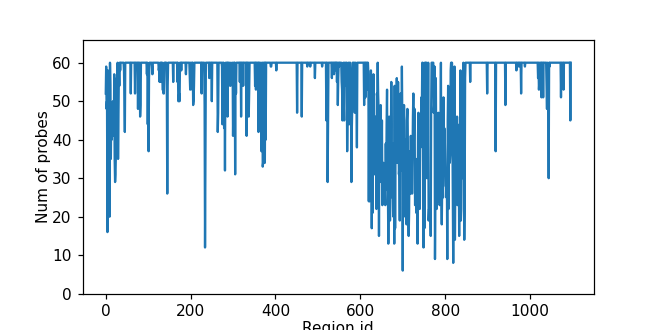

In [247]:
plt.style.use('default')
#plt.style.use('dark_background')

# Plot number of probes per region
plt.figure(figsize=(6,3), dpi=100)
plt.plot(list(reg_size_dic.values()))
#plt.plot(np.ones(len(pb_nums))*20)
plt.ylabel(f"Num of probes", labelpad=1)
plt.xlabel(f"Region id", labelpad=1)
plt.ylim([0, np.max(list(reg_size_dic.values()))*1.1])
plt.savefig(os.path.join(report_folder, 'afterblast_nProbes_per_region.png'),
            transparent=True, dpi=300)
plt.show()

# Create count table

In [278]:
from ImageAnalysis3 import library_tools
from tqdm import tqdm
overwrite_table = False
# library
library_table_file = os.path.join(reference_folder, 'ctp14-mouse-5kb_library_17w.npy')

if not os.path.exists(library_table_file) or overwrite_table:
    # library
    _library_filenames = [os.path.join(library_folder, 'blast_full_probes.fasta')]
    print(len(_library_filenames))
    
    ct = library_tools.design.countTable(word=17,save_file=library_table_file, 
                       sparse=False)
    ct.verbose=True

    ct.read(_library_filenames) # read sequences from fasta files

    ct.consume_loaded(num_threads=44) # convert sequences into integers

    ct.complete(verbose=True)

    ct.save()
    
    # clear RAM if contructed countable 
    del(ct)
else:
    print(f"reference table: {library_table_file} already exist, skip.")

1
- Start multi-processing comsume 58492 sequences 44 threads, finish in 57.421s
- Total sequences loaded: 8539832
Time to compute unique and clip: 2.3927886486053467
Time to update matrix: 6.848090410232544
- start saving to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\mouse\GRCm38_ensembl\ctp14-mouse-5kb_library_17w.npy


# Design corresponding sequential as validation

In [344]:
## load DNA-MERFISH count-table to select probes
library_table_file = os.path.join(reference_folder, 'ctp14-mouse-5kb_library_17w.npy')
lib_table = library_tools.design.countTable(save_file=library_table_file, word=17)
lib_table.load()

0

## select based on groups:

In [248]:
region_2_group_id = pickle.load(open(os.path.join(library_folder, 'region_2_group_id.pkl'), 'rb'))

In [350]:
# split blasted probes into genes
gene_2_probes = check.split_probe_by_gene(blasted_records,)

sel_sequential_pb_dict = {}
kept_group_th = 0.54 # percentage of regions that could be sequentially labeled
_library_hit_th = 14
_sequential_probe_num_th = 12

# for each group, check pb_dict
for _g, _region_names in group_2_regions.items():
    _sel_regions = []
    for _rname in _region_names:
        if _rname not in pb_dict:
            print(f"{_rname} doesn't exist.")
            continue
        # final probe num
        _final_probe_num = len(gene_2_probes[_rname])
        _design_probe_num = len(pb_dict[_rname].kept_probes)
        if _design_probe_num - _final_probe_num > 12:
            #print(_rname, _design_probe_num, _final_probe_num)
            _sel_regions.append(_rname)
    # check if all regions in this group have extra probes:
    if len(_sel_regions) >= len(_region_names) * kept_group_th:
        print(_g, len(_sel_regions), len(_region_names))
        # for probes in these regions, add to sel_sequential_pb_dict
        
        for _rname in _sel_regions:
            # collect used
            _used_pb_pos = [int(_r.id.split('pos_')[1].split('_')[0]) for _r in gene_2_probes[_rname]]
            # re-assemble kept_pbs for each region
            _kept_pbs = {}
            for _seq, _info in pb_dict[_rname].kept_probes.items():
                # map with multiplexed library
                _library_hits = lib_table.get(_seq)
                if _library_hits > _library_hit_th:
                    #print(_library_hits, '*')
                    continue
                if _info['pb_index'] not in _used_pb_pos:
                    _new_info = {_k:_v for _k,_v in _info.items()}
                    # add sequential tag
                    _new_info['reg_name'] = _new_info['reg_name'].replace('Chr7-6Mb-seg', 'Chr7-6Mb-sequential-seg')
                    # store group info_
                    _new_info['reg_name'] += f'_group_{_g}'
                    _new_info['group_id'] = _g
                    # map library
                    _new_info['map_library'] = _library_hits
                    # append
                    _kept_pbs[_seq] = _new_info
            if len(_kept_pbs) < _sequential_probe_num_th:
                continue
            #print(len(_kept_pbs))
            _splitted_pbde = library_tools.design.pb_reports_class()
            _splitted_pbde.kept_probes = _kept_pbs
            
            sel_sequential_pb_dict[_rname] = _splitted_pbde
            
print(len(sel_sequential_pb_dict))

0 31 55
7 30 55
8 31 55
92


## add sequential tag

In [351]:
num_readout_per_probe

4

In [352]:
sequential_region_2_readout_dict = {}
for _i, _reg in enumerate(sel_sequential_pb_dict):
    sequential_region_2_readout_dict[_reg] = [f"u{_i}"] * num_readout_per_probe
print(sequential_region_2_readout_dict)

{'Chr7-6Mb-seg-65': ['u0', 'u0', 'u0', 'u0'], 'Chr7-6Mb-seg-75': ['u1', 'u1', 'u1', 'u1'], 'Chr7-6Mb-seg-85': ['u2', 'u2', 'u2', 'u2'], 'Chr7-6Mb-seg-95': ['u3', 'u3', 'u3', 'u3'], 'Chr7-6Mb-seg-105': ['u4', 'u4', 'u4', 'u4'], 'Chr7-6Mb-seg-135': ['u5', 'u5', 'u5', 'u5'], 'Chr7-6Mb-seg-166': ['u6', 'u6', 'u6', 'u6'], 'Chr7-6Mb-seg-176': ['u7', 'u7', 'u7', 'u7'], 'Chr7-6Mb-seg-196': ['u8', 'u8', 'u8', 'u8'], 'Chr7-6Mb-seg-206': ['u9', 'u9', 'u9', 'u9'], 'Chr7-6Mb-seg-216': ['u10', 'u10', 'u10', 'u10'], 'Chr7-6Mb-seg-226': ['u11', 'u11', 'u11', 'u11'], 'Chr7-6Mb-seg-236': ['u12', 'u12', 'u12', 'u12'], 'Chr7-6Mb-seg-286': ['u13', 'u13', 'u13', 'u13'], 'Chr7-6Mb-seg-326': ['u14', 'u14', 'u14', 'u14'], 'Chr7-6Mb-seg-336': ['u15', 'u15', 'u15', 'u15'], 'Chr7-6Mb-seg-346': ['u16', 'u16', 'u16', 'u16'], 'Chr7-6Mb-seg-366': ['u17', 'u17', 'u17', 'u17'], 'Chr7-6Mb-seg-396': ['u18', 'u18', 'u18', 'u18'], 'Chr7-6Mb-seg-416': ['u19', 'u19', 'u19', 'u19'], 'Chr7-6Mb-seg-426': ['u20', 'u20', 'u20', '

## loading components

### primers doesn't change

### readouts

In [353]:
# collect types from region_2_readout_dict
sequential_readout_usage_by_type = {}
for _region, _infos in sequential_region_2_readout_dict.items():
    for _info in _infos:
        if _info[0] not in sequential_readout_usage_by_type:
            sequential_readout_usage_by_type[_info[0]] = []
        if int(_info[1:]) not in sequential_readout_usage_by_type[_info[0]]:
            sequential_readout_usage_by_type[_info[0]].append(int(_info[1:]))

readout_usage_dict = {_type:len(_v) for _type,_v in sequential_readout_usage_by_type.items()}

# collect types from region_2_readout_dict
sequential_readout_usage_dict = {}
for _region, _infos in sequential_region_2_readout_dict.items():
    for _info in _infos:
        if _info[0] not in sequential_readout_usage_by_type:
            sequential_readout_usage_by_type[_info[0]] = []
        if int(_info[1:]) not in sequential_readout_usage_by_type[_info[0]]:
            sequential_readout_usage_by_type[_info[0]].append(int(_info[1:]))

sequential_readout_usage_dict = {_type:len(_v) for _type,_v in sequential_readout_usage_by_type.items()}
sequential_readout_usage_dict

{'u': 92}

In [354]:
from ImageAnalysis3.classes import _allowed_kwds
reload(ia.library_tools.assemble)
readout_dict ={}
overwrite_readout_usage = True
readout_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Readouts\selected_NDB_sets'

# combo
readout_type = 'unique'
# 
_type_char = _allowed_kwds[readout_type]
_readout_start = 127
print(_readout_start)
_num_color = 3

readout_dict[_type_char] = library_tools.assemble.load_readouts(
    sequential_readout_usage_dict[_type_char], 
    _type='highest_snr_w_stv', 
    _readout_folder=readout_folder, 
    _num_colors=_num_color, # 750,647,561
    _start_id=_readout_start,
    )

127
\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Readouts\selected_NDB_sets\highest_snr_w_stv_750.fasta 175 127 31
\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Readouts\selected_NDB_sets\highest_snr_w_stv_647.fasta 174 127 31
\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Readouts\selected_NDB_sets\highest_snr_w_stv_561.fasta 180 127 31
[31, 31, 31]


In [355]:
readout_dict

{'u': [SeqRecord(seq=Seq('CACTATACTTATCTGGTCCGGCGAGGTGTG'), id='NDB_823', name='NDB_823', description='NDB_823', dbxrefs=[]),
  SeqRecord(seq=Seq('AGTATGTAGCGTCGGGTCAGCTTAACTCCG'), id='NDB_944', name='NDB_944', description='NDB_944', dbxrefs=[]),
  SeqRecord(seq=Seq('CCGCTATCGTCCTAGTGGCGTGATGGAGTT'), id='NDB_462', name='NDB_462', description='NDB_462', dbxrefs=[]),
  SeqRecord(seq=Seq('CGCGATTATAAGCTAGGTGCGTCAGGCTCT'), id='NDB_1105', name='NDB_1105', description='NDB_1105', dbxrefs=[]),
  SeqRecord(seq=Seq('TGGGAGGCATATTCCAATGCGAACGCTGCA'), id='NDB_419', name='NDB_419', description='NDB_419', dbxrefs=[]),
  SeqRecord(seq=Seq('GATCATTTCCGAGAAGCCTTCGCAATTTCG'), id='NDB_996', name='NDB_996', description='NDB_996', dbxrefs=[]),
  SeqRecord(seq=Seq('CCCGATGCACGTTATGTCGTAAACTTTGGC'), id='NDB_814', name='NDB_814', description='NDB_814', dbxrefs=[]),
  SeqRecord(seq=Seq('GCAGTTGCCTATTCCGAAGCCTGTAATTAA'), id='NDB_911', name='NDB_911', description='NDB_911', dbxrefs=[]),
  SeqRecord(seq=Seq('GCT

In [356]:
# save
sequential_readout_usage_file = os.path.join(library_folder, 'sequential_readout_usage.pkl')
if not os.path.isfile(sequential_readout_usage_file) or overwrite_readout_usage:
    print('save sequential readout usage dict')
    pickle.dump(readout_dict, open(sequential_readout_usage_file, 'wb'))

save sequential readout usage dict


## rerun assemble probes

In [361]:
reload(library_tools.assemble)
from ImageAnalysis3.library_tools.assemble import Assemble_probes

# params
assemble_params = {
    'primer_len':20,
    'num_readout_per_probe':4, 
}
sequential_assemble_folder = os.path.join(library_folder, 'Sequential')

In [362]:
# run assembly

cand_sequential_probes, readout_summary = Assemble_probes(
    library_folder, sel_sequential_pb_dict, 
    sequential_region_2_readout_dict, readout_dict, primers, 
    primer_len=assemble_params['primer_len'], 
    num_readout_per_probe=assemble_params['num_readout_per_probe'], 
    unique_readout_per_probe=True,
    save_folder=sequential_assemble_folder,
    rc_targets=False, overwrite=False)

- Assemble probes by given target sequences, readouts and primers.
-- included readout types: ['u']
--- assemblying 23 probes in region: Chr7-6Mb-seg-65
--- assemblying 16 probes in region: Chr7-6Mb-seg-75
--- assemblying 14 probes in region: Chr7-6Mb-seg-85
--- assemblying 23 probes in region: Chr7-6Mb-seg-95
--- assemblying 15 probes in region: Chr7-6Mb-seg-105
--- assemblying 15 probes in region: Chr7-6Mb-seg-135
--- assemblying 26 probes in region: Chr7-6Mb-seg-166
--- assemblying 19 probes in region: Chr7-6Mb-seg-176
--- assemblying 13 probes in region: Chr7-6Mb-seg-196
--- assemblying 18 probes in region: Chr7-6Mb-seg-206
--- assemblying 19 probes in region: Chr7-6Mb-seg-216
--- assemblying 21 probes in region: Chr7-6Mb-seg-226
--- assemblying 25 probes in region: Chr7-6Mb-seg-236
--- assemblying 13 probes in region: Chr7-6Mb-seg-286
--- assemblying 23 probes in region: Chr7-6Mb-seg-326
--- assemblying 25 probes in region: Chr7-6Mb-seg-336
--- assemblying 18 probes in region: Chr

<IPython.core.display.Javascript object>


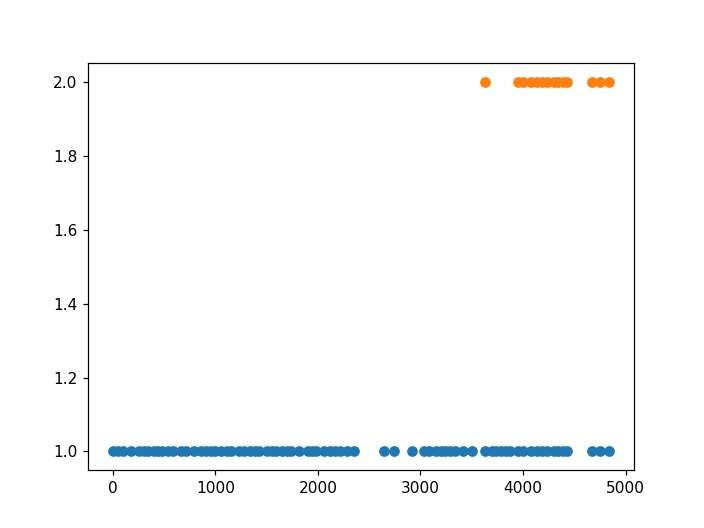

In [369]:
sel_region = 'Chr7-6Mb-seg-85'
plt.figure()
plt.scatter([int(_info['pb_index']) 
             for _info in pb_dict[sel_region].kept_probes.values()],
             np.ones(len(pb_dict[sel_region].kept_probes)))
plt.scatter([int(_info['pb_index']) 
             for _info in sel_sequential_pb_dict[sel_region].kept_probes.values()],
             2*np.ones(len(sel_sequential_pb_dict[sel_region].kept_probes)))

#plt.scatter([int(_p) for _p in genome_name_2_pb_pos['5']], 
#            2*np.ones(len(genome_name_2_pb_pos['5'])) )

In [379]:
reload(check)
reg_size_dic, len_check = check._check_region_size(cand_sequential_probes, 
                                                   species_marker = 'gene_',
                                                   min_size=12)
print(len_check)

gene: Chr7-6Mb-sequential-seg-65 -> 23
gene: Chr7-6Mb-sequential-seg-75 -> 16
gene: Chr7-6Mb-sequential-seg-85 -> 14
gene: Chr7-6Mb-sequential-seg-95 -> 23
gene: Chr7-6Mb-sequential-seg-105 -> 15
gene: Chr7-6Mb-sequential-seg-135 -> 15
gene: Chr7-6Mb-sequential-seg-166 -> 26
gene: Chr7-6Mb-sequential-seg-176 -> 19
gene: Chr7-6Mb-sequential-seg-196 -> 13
gene: Chr7-6Mb-sequential-seg-206 -> 18
gene: Chr7-6Mb-sequential-seg-216 -> 19
gene: Chr7-6Mb-sequential-seg-226 -> 21
gene: Chr7-6Mb-sequential-seg-236 -> 25
gene: Chr7-6Mb-sequential-seg-286 -> 13
gene: Chr7-6Mb-sequential-seg-326 -> 23
gene: Chr7-6Mb-sequential-seg-336 -> 25
gene: Chr7-6Mb-sequential-seg-346 -> 18
gene: Chr7-6Mb-sequential-seg-366 -> 22
gene: Chr7-6Mb-sequential-seg-396 -> 14
gene: Chr7-6Mb-sequential-seg-416 -> 15
gene: Chr7-6Mb-sequential-seg-426 -> 22
gene: Chr7-6Mb-sequential-seg-436 -> 26
gene: Chr7-6Mb-sequential-seg-446 -> 25
gene: Chr7-6Mb-sequential-seg-456 -> 15
gene: Chr7-6Mb-sequential-seg-466 -> 17
gene

In [376]:
# check these probes with int_map

kept_probes = library_tools.quality_check._check_between_probes(cand_sequential_probes, lib_table,
                                                  primer_len=primer_len, 
                                                  target_len=target_len)


-- total probes removed by internal screening: 0


## Blast cand_sequential_probes

In [381]:
blast_database = os.path.join(reference_folder, 'blast_database', 'GRCm38_ensembl')

check.Blast_probes(cand_sequential_probes, library_folder, 
                   blast_subfolder='blast_sequential',
                   num_threads=44, 
                   blast_db=blast_database, blast_evalue=100, overwrite=True)

- Blast probe against \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\mouse\GRCm38_ensembl\blast_database\GRCm38_ensembl
-- number of probes loaded: 1852
-- processing region: Chr7-6Mb-sequential-seg-102 with 22 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast_sequential\probe_gene_Chr7-6Mb-sequential-seg-102.fasta
--- *blasting region: Chr7-6Mb-sequential-seg-102
--- total time for blast Chr7-6Mb-sequential-seg-102: 6.651s.
-- processing region: Chr7-6Mb-sequential-seg-105 with 15 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast_sequential\probe_gene_Chr7-6Mb-sequential-seg-105.fasta
--- *blasting region: Chr7-6Mb-sequential-seg-105
--- total time for blast Chr7-6Mb-sequential-seg-105: 1.490s.
-- processing region: Chr7-6Mb-sequential-seg-122 with 21 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_hum

--- total time for blast Chr7-6Mb-sequential-seg-253: 2.249s.
-- processing region: Chr7-6Mb-sequential-seg-263 with 14 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast_sequential\probe_gene_Chr7-6Mb-sequential-seg-263.fasta
--- *blasting region: Chr7-6Mb-sequential-seg-263
--- total time for blast Chr7-6Mb-sequential-seg-263: 1.640s.
-- processing region: Chr7-6Mb-sequential-seg-273 with 17 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast_sequential\probe_gene_Chr7-6Mb-sequential-seg-273.fasta
--- *blasting region: Chr7-6Mb-sequential-seg-273
--- total time for blast Chr7-6Mb-sequential-seg-273: 1.553s.
-- processing region: Chr7-6Mb-sequential-seg-274 with 27 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast_sequential\probe_gene_Chr7-6Mb-sequential-seg-274.fasta
--- *blasting regi

--- total time for blast Chr7-6Mb-sequential-seg-416: 1.620s.
-- processing region: Chr7-6Mb-sequential-seg-423 with 24 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast_sequential\probe_gene_Chr7-6Mb-sequential-seg-423.fasta
--- *blasting region: Chr7-6Mb-sequential-seg-423
--- total time for blast Chr7-6Mb-sequential-seg-423: 2.009s.
-- processing region: Chr7-6Mb-sequential-seg-424 with 32 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast_sequential\probe_gene_Chr7-6Mb-sequential-seg-424.fasta
--- *blasting region: Chr7-6Mb-sequential-seg-424
--- total time for blast Chr7-6Mb-sequential-seg-424: 4.982s.
-- processing region: Chr7-6Mb-sequential-seg-426 with 22 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast_sequential\probe_gene_Chr7-6Mb-sequential-seg-426.fasta
--- *blasting regi

--- total time for blast Chr7-6Mb-sequential-seg-496: 2.064s.
-- processing region: Chr7-6Mb-sequential-seg-504 with 13 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast_sequential\probe_gene_Chr7-6Mb-sequential-seg-504.fasta
--- *blasting region: Chr7-6Mb-sequential-seg-504
--- total time for blast Chr7-6Mb-sequential-seg-504: 1.176s.
-- processing region: Chr7-6Mb-sequential-seg-506 with 13 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast_sequential\probe_gene_Chr7-6Mb-sequential-seg-506.fasta
--- *blasting region: Chr7-6Mb-sequential-seg-506
--- total time for blast Chr7-6Mb-sequential-seg-506: 1.678s.
-- processing region: Chr7-6Mb-sequential-seg-513 with 16 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb\blast_sequential\probe_gene_Chr7-6Mb-sequential-seg-513.fasta
--- *blasting regi

In [386]:
# screen
import ImageAnalysis3.library_tools.quality_check as qc
reload(check)
num_probes_per_region = 25
kept_pbs, blast_keep_dic, hard_count_list, soft_count_list = qc.Screening_Probes_by_Blast(
    sequential_assemble_folder, 
    num_probes_per_region,
    probe_filename='candidate_probes.fasta',
    blast_subfolder='blast_sequential',
    keep_mode='end',
    hard_thres=target_len,
    soft_count_th=50,
    save_filename='blast_sequential_full_probes.fasta',
    )

- Number of probes loaded: 1852
- Number of regions in this library: 92
-- checking probes in region: Chr7-6Mb-sequential-seg-65
--- gene=Chr7-6Mb-sequential-seg-65, id=0 removed by soft count = 404
--- gene=Chr7-6Mb-sequential-seg-65, id=3 removed by soft count = 195
--- gene=Chr7-6Mb-sequential-seg-65, id=4 removed by soft count = 82
--- number of probes: 23 , kept by blast: 20 , if remove dups: 20
--- remove duplicated probes
-- number of probes kept for this region: 20
-- checking probes in region: Chr7-6Mb-sequential-seg-75
--- gene=Chr7-6Mb-sequential-seg-75, id=0 removed by soft count = 91
--- gene=Chr7-6Mb-sequential-seg-75, id=2 removed by soft count = 245
--- gene=Chr7-6Mb-sequential-seg-75, id=3 removed by soft count = 108
--- gene=Chr7-6Mb-sequential-seg-75, id=4 removed by soft count = 66
--- gene=Chr7-6Mb-sequential-seg-75, id=5 removed by soft count = 95
--- gene=Chr7-6Mb-sequential-seg-75, id=6 removed by soft count = 157
--- number of probes: 16 , kept by blast: 10 , i

--- number of probes: 13 , kept by blast: 12 , if remove dups: 12
-- number of probes kept for this region: 12
-- checking probes in region: Chr7-6Mb-sequential-seg-52
--- number of probes: 19 , kept by blast: 19 , if remove dups: 19
--- remove duplicated probes
-- number of probes kept for this region: 19
-- checking probes in region: Chr7-6Mb-sequential-seg-62
--- number of probes: 28 , kept by blast: 28 , if remove dups: 28
--- remove duplicated probes
--- keep probes in the end
-- number of probes kept for this region: 25
-- checking probes in region: Chr7-6Mb-sequential-seg-72
--- gene=Chr7-6Mb-sequential-seg-72, id=0 removed by soft count = 2502
--- number of probes: 14 , kept by blast: 13 , if remove dups: 13
-- number of probes kept for this region: 13
-- checking probes in region: Chr7-6Mb-sequential-seg-82
--- gene=Chr7-6Mb-sequential-seg-82, id=11 removed by soft count = 220
--- number of probes: 17 , kept by blast: 16 , if remove dups: 16
-- number of probes kept for this r

--- number of probes: 22 , kept by blast: 22 , if remove dups: 22
--- remove duplicated probes
-- number of probes kept for this region: 22
-- checking probes in region: Chr7-6Mb-sequential-seg-174
--- number of probes: 28 , kept by blast: 28 , if remove dups: 28
--- remove duplicated probes
--- keep probes in the end
-- number of probes kept for this region: 25
-- checking probes in region: Chr7-6Mb-sequential-seg-184
--- gene=Chr7-6Mb-sequential-seg-184, id=0 removed by hard count = 5
--- gene=Chr7-6Mb-sequential-seg-184, id=12 removed by soft count = 61
--- gene=Chr7-6Mb-sequential-seg-184, id=14 removed by soft count = 105
--- number of probes: 15 , kept by blast: 12 , if remove dups: 12
-- number of probes kept for this region: 12
-- checking probes in region: Chr7-6Mb-sequential-seg-204
--- number of probes: 20 , kept by blast: 20 , if remove dups: 20
--- remove duplicated probes
-- number of probes kept for this region: 20
-- checking probes in region: Chr7-6Mb-sequential-seg-23

<IPython.core.display.Javascript object>


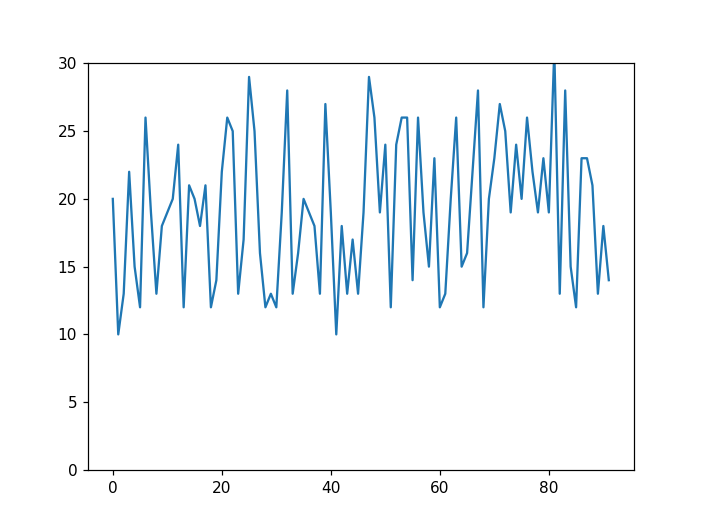

In [391]:
fig, ax = plt.subplots()
ax.plot([np.sum(_flg) for _flg in blast_keep_dic.values()])
ax.set_ylim([0,30])
fig.show()